In [193]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import PIL
from PIL import Image
import os
import torchvision
from torchvision import transforms as tvt
import torch
from torch.nn import parallel
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import random
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import pathlib
import random
import skimage
import cv2
from torchvision import ops

In [2]:
print(os.getcwd())
class_list = ['bus', 'cat', 'pizza']
root = "/Users/alim/Documents/ECE60146/hw4/"
os.chdir(root)
dataType='train2014'
annFile= root + 'annotations/instances_{}.json'.format(dataType)

### Mapping from COCO label to Class indices ###
coco_labels_inverse = {}
coco = COCO(annFile)


/Users/alim/Documents/ECE60146/hw5
loading annotations into memory...
Done (t=7.58s)
creating index...
index created!


In [3]:
### PREPROCESSING TO GENERATE IMAGE UNIQUE IDS ###
catIds = coco.getCatIds(catNms = class_list)
imgIds = coco.getImgIds(catIds = catIds)
imgIds_list = []
for catId in catIds:
    imgIds_list.append(coco.getImgIds(catIds = catId))
concatenated_list = []
for x in imgIds_list:
    for y in x:
        concatenated_list.append(y)

np_li = np.array(concatenated_list)
unique_imgIds = np.unique(np_li) #make the list unique - there might be duplicate image ids

unique_imgIds = list(unique_imgIds) #convert numpy array back to list

for n, i in enumerate(unique_imgIds):
    unique_imgIds[n] = int(i) #convert each element of list to integer, so it can easily be interpretted by 
    #coco api



[6, 17, 59]
7811
7799
[{'license': 5, 'file_name': 'COCO_train2014_000000000194.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000000194.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-21 03:06:25', 'flickr_url': 'http://farm8.staticflickr.com/7022/6573689001_e005ebf7d1_z.jpg', 'id': 194}]


downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
download

downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
download

d is ['COCO_train2014_000000460005.jpg', 'COCO_train2014_000000012102.jpg', 'COCO_train2014_000000492293.jpg', 'COCO_train2014_000000448951.jpg', 'COCO_train2014_000000491942.jpg', 'COCO_train2014_000000529377.jpg', 'COCO_train2014_000000010073.jpg', 'COCO_train2014_000000370059.jpg', 'COCO_train2014_000000100506.jpg', 'COCO_train2014_000000265454.jpg', 'COCO_train2014_000000568459.jpg', 'COCO_train2014_000000206871.jpg', 'COCO_train2014_000000019725.jpg', 'COCO_train2014_000000164094.jpg', 'COCO_train2014_000000318483.jpg', 'COCO_train2014_000000198561.jpg', 'COCO_train2014_000000137382.jpg', 'COCO_train2014_000000272100.jpg', 'COCO_train2014_000000199119.jpg', 'COCO_train2014_000000103033.jpg', 'COCO_train2014_000000579568.jpg', 'COCO_train2014_000000437613.jpg', 'COCO_train2014_000000003999.jpg', 'COCO_train2014_000000201844.jpg', 'COCO_train2014_000000512322.jpg', 'COCO_train2014_000000387360.jpg', 'COCO_train2014_000000163738.jpg', 'COCO_train2014_000000536280.jpg', 'COCO_train201

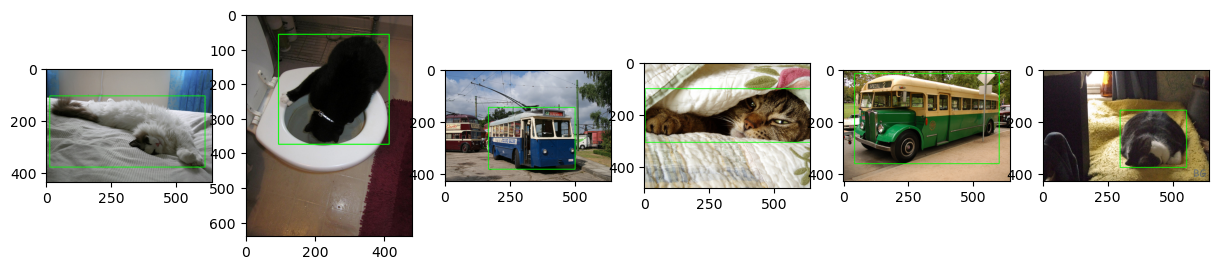

In [4]:
### CODE TO DOWNLOAD THE CORRECT IMAGES AND GET THE CORRECT ANNOTATIONS (I.E THE DOMINANT OBJECT)
count = 0
count_true = 0
data_dict = {}
os.chdir("/Users/alim/Documents/ECE60146/hw5/")
for n, imgId in enumerate(unique_imgIds):
        count += 1
        annId = coco.getAnnIds(imgId, catIds=catIds, iscrowd=False)
        #now that we have the annotation id, we want to check if there is a dominant object. In order to get 
        #the details of that annotation id, we need to load the annotation using that id:
        annId_metadata = coco.loadAnns(annId)
        temp_max_bbox_area = 0 #need a variable to figure out which bbox is the largest, as there can be
        #multiple bboxes per imgId even in a given category! 
        max_bbox_area = 0
        found_valid_bbox = False
        key = -1 #temp value for key that doesn't exist
        for ann in annId_metadata:
            len_ann = len(annId_metadata)
            
            #print(ann['bbox'], "is the bbox for img_id", ann['image_id'])
            [x, y, w, h] = ann['bbox']
            if ((w * h) <= 40000):
                continue #do not consider looking at annotation details for that annId
            else: 
                #figure out which annotation for that image id is the largest:
                temp_max_bbox_area = w * h
                if temp_max_bbox_area > max_bbox_area: #if w*h is GT than the current largest bbox area, then
                    #make max_bbox_area the w*h that was just computed. Store the metadata of that ann in 
                    #dictionary.
                    found_valid_bbox = True
                    max_bbox_area = temp_max_bbox_area
                    #print("imgId being loaded", imgId)
                    #print(type(imgId))
                    imgId_metadata = coco.loadImgs(imgId)
                    #print("imgId_metadata", imgId_metadata, "for imgId", imgId)
                    #print(imgId_metadata)
                    ###ORGANIZATION OF data_dict:
                    #key is file_name
                    #value is a list of elements.
                    #element 0: annotation id
                    #element 1: bbox
                    #element 2: category id
                    #element 3: img_id coco_url
                    #element 4: img_id
                    #element 5: img height
                    #element 6: img width
                    #print("imgId", imgId)
                    key = imgId_metadata[0]['file_name']
                    data_dict[key] = [ann['id'], ann['bbox'], ann['category_id'], imgId_metadata[0]['coco_url'],
                                       imgId_metadata[0]['id'], imgId_metadata[0]['height'], 
                                     imgId_metadata[0]['width']]

        if (key != -1):
            coco.download(tarDir = 'train_orig/', imgIds = [data_dict[key][4]])
        if (found_valid_bbox == True): #check if we found all the expected images
            count_true += 1


            
print(count) # checked 7799 images
print(count_true) # 4856 valid bboxes found
print(len(data_dict), "is the len") #4856 image id keys in dictionary
fig, ax = plt.subplots(1, 6, figsize = (15, 15))
d = os.listdir('train_orig/') #create list of files in the created directory. This list has 1500 
print("d is", d, "length is", len(d))
d.remove(".DS_Store")
print("updated list d", d)
for num, i in enumerate(d[:6]):
    
    if i[-3:] == "jpg":
        PIL_img = Image.open('train_orig/' + i)
        np_img = np.array(PIL_img)
        np_img = np.uint8(np_img)
        [x, y, w, h] = (data_dict[i][1])
        #[x, y, w, h] = data_dict[i]
        np_img = cv2.rectangle(np_img, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
        ax[num].imshow(np_img)
### Confirmed that dictionary is working properly and we can retrieve images and annotations from it! 
    
    

In [5]:
### PREPROCESSING FOR VAL DATA
### PREPROCESSING TO GENERATE IMAGE IDS ###
### GET VAL DATA ####
print(os.getcwd())
class_list = ['bus', 'cat', 'pizza']
root = "/Users/alim/Documents/ECE60146/hw4/"
os.chdir(root)
dataType='val2014'
annFile= root + 'annotations/instances_{}.json'.format(dataType)

### Mapping from COCO label to Class indices ###
coco_labels_inverse = {}
coco = COCO(annFile)
catIds = coco.getCatIds(catNms = class_list)
print(catIds)
imgIds = coco.getImgIds(catIds = catIds)
imgIds_list = []
for catId in catIds:
    imgIds_list.append(coco.getImgIds(catIds = catId))
concatenated_list = []
for x in imgIds_list:
    for y in x:
        concatenated_list.append(y)
print(len(concatenated_list))

np_li = np.array(concatenated_list)
unique_imgIds = np.unique(np_li) #make the list unique - there might be duplicate image ids

unique_imgIds = list(unique_imgIds) #convert numpy array back to list

for n, i in enumerate(unique_imgIds):
    unique_imgIds[n] = int(i) #convert each element of list to integer, so it can easily be interpretted by coco api
print(len(unique_imgIds))

/Users/alim/Documents/ECE60146/hw5
loading annotations into memory...
Done (t=3.23s)
creating index...
index created!
[6, 17, 59]
3947
3940


downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
downloaded 0/1 images (t=0.0s)
download

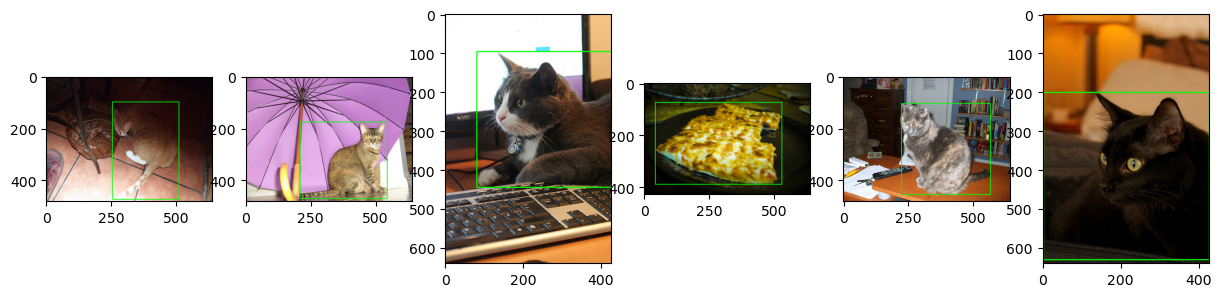

In [6]:
### CREATE DICTIONARY FOR VALIDATION DATA AND DOWNLOAD TO DISK ###
count = 0
count_true = 0
data_dict_val = {}
os.chdir("/Users/alim/Documents/ECE60146/hw5/")
for n, imgId in enumerate(unique_imgIds):
        count += 1
        annId = coco.getAnnIds(imgId, catIds=catIds, iscrowd=False)
        #now that we have the annotation id, we want to check if there is a dominant object. In order to get 
        #the details of that annotation id, we need to load the annotation using that id:
        annId_metadata = coco.loadAnns(annId)
        temp_max_bbox_area = 0 #need a variable to figure out which bbox is the largest, as there can be
        #multiple bboxes per imgId even in a given category! 
        max_bbox_area = 0
        found_valid_bbox = False
        key = -1 #temp value for key that doesn't exist
        for ann in annId_metadata:
            len_ann = len(annId_metadata)
            
            #print(ann['bbox'], "is the bbox for img_id", ann['image_id'])
            [x, y, w, h] = ann['bbox']
            if ((w * h) <= 40000):
                continue #do not consider looking at annotation details for that annId
            else: 
                #figure out which annotation for that image id is the largest:
                temp_max_bbox_area = w * h
                if temp_max_bbox_area > max_bbox_area: #if w*h is GT than the current largest bbox area, then
                    #make max_bbox_area the w*h that was just computed. Store the metadata of that ann in 
                    #dictionary.
                    found_valid_bbox = True
                    max_bbox_area = temp_max_bbox_area
                    #print("imgId being loaded", imgId)
                    #print(type(imgId))
                    imgId_metadata = coco.loadImgs(imgId)
                    #print("imgId_metadata", imgId_metadata, "for imgId", imgId)
                    #print(imgId_metadata)
                    ###ORGANIZATION OF data_dict:
                    #key is file_name
                    #value is a list of elements.
                    #element 0: annotation id
                    #element 1: bbox (x coord, y coord), (x+w coord, y+h coord)
                    #element 2: category id
                    #element 3: img_id coco_url
                    #element 4: img_id
                    #element 5: img height
                    #element 6: img width
                    #print("imgId", imgId)
                    key = imgId_metadata[0]['file_name']
                    data_dict_val[key] = [ann['id'], ann['bbox'], ann['category_id'], imgId_metadata[0]['coco_url'],
                                       imgId_metadata[0]['id'], imgId_metadata[0]['height'], 
                                          imgId_metadata[0]['width']]

        #once we have figured out the annId with the largest bbox for that specific image id, download the 
        #image!
        
        #download using that metadata
        pathlib.Path('val_orig/').mkdir(parents=True, exist_ok=True) #create a path to store 
#         print(imgId)
#         print(type(imgId))
        if (key != -1):
            coco.download(tarDir = 'val_orig/', imgIds = [data_dict_val[key][4]])
        #  training data for the current category
        
        #print("Did we find a valid bbox for image Id", imgId, "?", found_valid_bbox)
        if (found_valid_bbox == True):
            count_true += 1
            #print("the data dict entry for ", imgId, "is ", data_dict[imgId])
            #print("imgId_metadata for imgId", imgId, imgId_metadata)

            
print(count) # checked 7799 images
print(count_true) # 4856 valid bboxes found
print(len(data_dict_val), "is the len") #4856 image id keys in dictionary
fig, ax = plt.subplots(1, 6, figsize = (15, 15))
d = os.listdir('val_orig/') #create list of files in the created directory. This list has 1500 
print("d is", d, "length is", len(d))
for i in d:
    if (i == "DS_Store"):
        d.remove(".DS_Store")
#print("updated list d", d)
for num, i in enumerate(d[:6]):
    
    if i[-3:] == "jpg":
        PIL_img = Image.open('val_orig/' + i)
        np_img = np.array(PIL_img)
        np_img = np.uint8(np_img)
        [x, y, w, h] = (data_dict_val[i][1])
        #[x, y, w, h] = data_dict[i]
        np_img = cv2.rectangle(np_img, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
        ax[num].imshow(np_img)
### Confirmed that dictionary is working properly and we can retrieve images and annotations from it!

4856


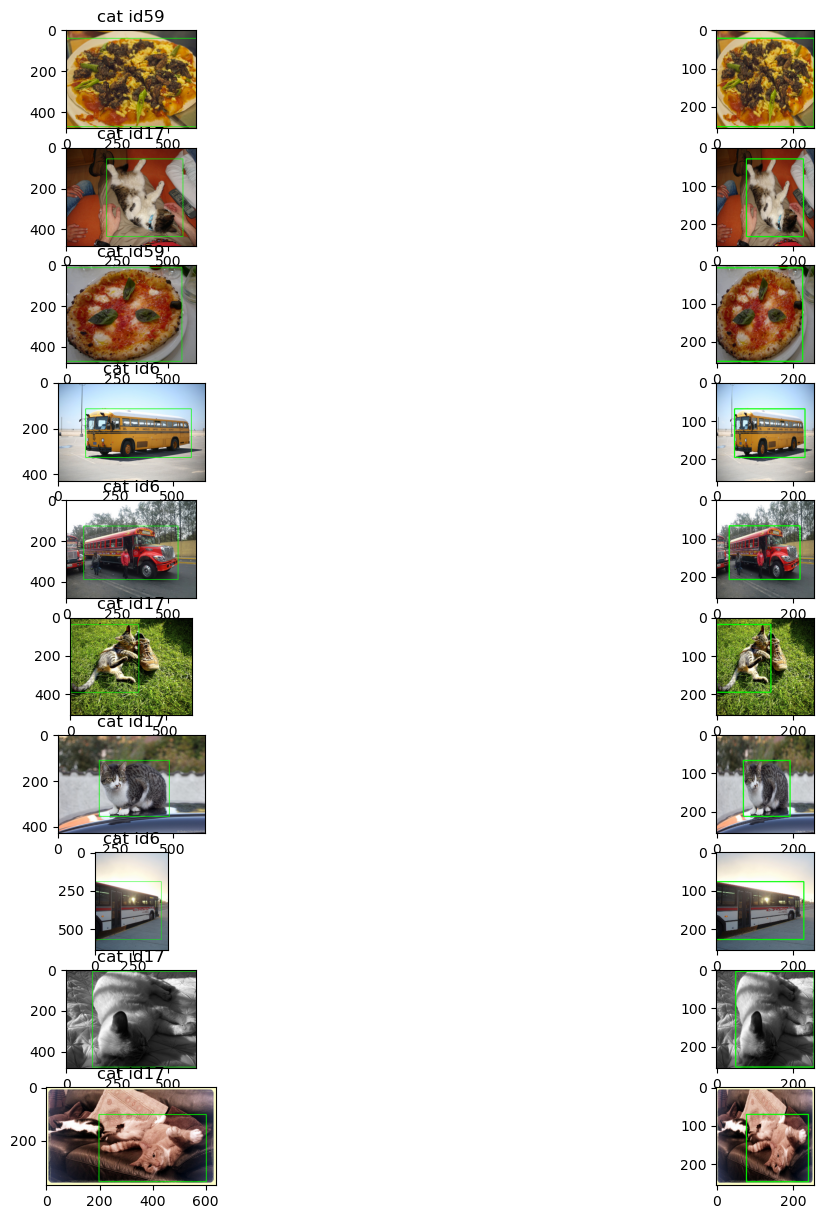

In [7]:
#print out images and annotations for above to make sure images and annotations pass a sanity check
#also, apply rescaling to ensure that the images and rescaled bbox look accurate! 
length_data = len(data_dict)
print(length_data)
fig, ax = plt.subplots(10, 2, figsize=(15,15))
count = 0
for idx, img in enumerate(data_dict):
    count += 1
    #print("img", img)
    #print("data_dict[img]", data_dict[img])

    I = io.imread(data_dict[img][3]) #this is a np array

    image_orig = np.uint8(I)
    image_resized = cv2.resize(image_orig, (256,256) )
    
    label = data_dict[img][2]
    [x, y, w, h] = data_dict[img][1]
#     print("x", x, "y", y, "w" , w, "h", h)
#     print("if the above is the origial coords for the bbox, then, we need to apply the scaling factor\n",
#     "to each parameter that defines the bbox!")
#     print("original image shape:", image_orig.shape)
#     print("shape[0] is the H of image, i.e, the y axis while shape[1] is the W of image, i.e the x-axis!")
    scaling_factor_x =  256.0 / image_orig.shape[1] 
    scaling_factor_y =  256.0 / image_orig.shape[0]
    #print("scaling_factor_x:", scaling_factor_x, "scaling_factor_y:", scaling_factor_y)
    
    
    image_orig = cv2.rectangle(image_orig, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
    image_resized = cv2.rectangle(image_resized, (int(x * scaling_factor_x), int(y*scaling_factor_y)), 
                                (int((x+w)*scaling_factor_x), int((y+h)*scaling_factor_y)), (0,255,0), 2)
    ax[idx,1].imshow(image_resized)
    ax[idx,0].imshow(image_orig)
    ax[idx,0].set_title("cat id" + str(label))
    if count == 10:
        break

        
#Images and rescaled version look good! 
    

In [513]:
#Resize images on disk. We are able to compute the adjusted bounding box on the fly, so, no need to save it
#to a dict.
print(os.getcwd())
count = 0
root = '/Users/alim/Documents/ECE60146/hw5/'
folders = ['train_resized/', 'val_resized/']
for folder in folders:
    print('folder:', folder)
    imgs = os.listdir(folder) #create list of files in the created directory. 
    #print("imgs is", imgs, "length is", len(imgs))
    for img in imgs:
        if (img == ".DS_Store"):
            imgs.remove(".DS_Store")
            print('removed .DS_Store')
            continue
        temp_img = Image.open(root + folder + img) #open image
        temp_img = temp_img.resize((256,256)) #resize
        temp_img.save(fp = folder + img) #overwrite image with the 64 x 64 version
        count += 1
print(count)   

/Users/alim/Documents/ECE60146/hw5
folder: train_resized/
folder: val_resized/
7371


640
640
640


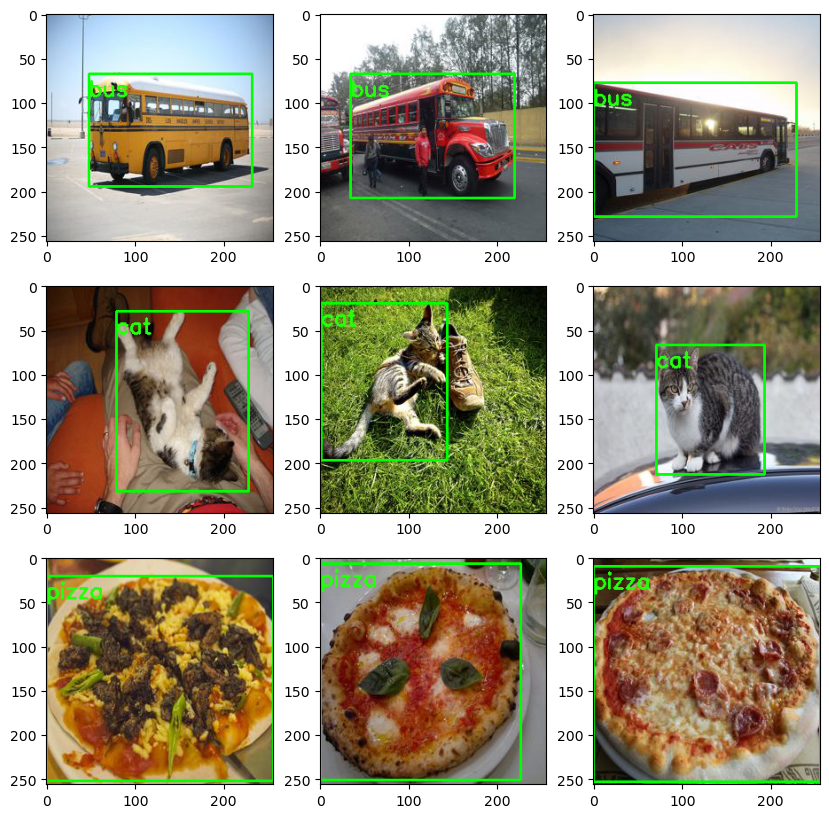

In [533]:
# Make a figure of a selection of images from dataset. 3 images from each of the classes, with annotation of 
#dominant object. 
fig, ax = plt.subplots(3,3 ,figsize = (10,10))
count_bus = 0
count_cat = 0
count_pizza = 0
root = '/Users/alim/Documents/ECE60146/hw5/'

for n, i in enumerate(data_dict):
        cat = data_dict[i][2]
        #print('cat is', cat)
        if (cat == 6) and (count_bus < 3):
            PIL_img = Image.open(root + 'train_resized/' + str(i))
            np_img = np.uint8(PIL_img)
            scaling_factor_x =  256.0 / data_dict[i][6] 
            scaling_factor_y =  256.0 / data_dict[i][5]
            [x, y, w, h] = data_dict[i][1]
            np_img = cv2.rectangle(np_img, (int(x * scaling_factor_x), int(y*scaling_factor_y)), 
                                (int((x+w)*scaling_factor_x), int((y+h)*scaling_factor_y)), (0,255,0), 2)
            np_img = cv2.putText(np_img, "bus", (int(x * scaling_factor_x), int(y * scaling_factor_y + 25)), 
                                 cv2.FONT_HERSHEY_SIMPLEX, 0.8, (36,255, 12),2)
            ax[0, count_bus].imshow(np_img)            
            

            count_bus = count_bus + 1

        if (cat == 17) and (count_cat < 3):
            PIL_img = Image.open(root + 'train_resized/' + str(i))
            np_img = np.uint8(PIL_img)
            scaling_factor_x =  256.0 / data_dict[i][6] 
            print(data_dict[i][6] )
            scaling_factor_y =  256.0 / data_dict[i][5]
            [x, y, w, h] = data_dict[i][1]
            
            np_img = cv2.rectangle(np_img, (int(x * scaling_factor_x), int(y*scaling_factor_y)), 
                                (int((x+w)*scaling_factor_x), int((y+h)*scaling_factor_y)), (0,255,0), 2)
            np_img = cv2.putText(np_img, "cat", (int(x * scaling_factor_x), int(y * scaling_factor_y + 25)), 
                                 cv2.FONT_HERSHEY_SIMPLEX, 0.8, (36,255, 12),2)
            ax[1, count_cat].imshow(np_img)
            count_cat += 1

        if (cat == 59) and (count_pizza < 3):
            PIL_img = Image.open(root + 'train_resized/' + str(i))
            np_img = np.uint8(PIL_img)
            
            scaling_factor_x =  256.0 / data_dict[i][6] 
            scaling_factor_y =  256.0 / data_dict[i][5]
            [x, y, w, h] = data_dict[i][1]
            np_img = cv2.rectangle(np_img, (int(x * scaling_factor_x), int(y*scaling_factor_y)), 
                                (int((x+w)*scaling_factor_x), int((y+h)*scaling_factor_y)), (0,255,0), 2)
            np_img = cv2.putText(np_img, "pizza", (int(x * scaling_factor_x), int(y * scaling_factor_y + 25)), 
                                 cv2.FONT_HERSHEY_SIMPLEX, 0.8, (36,255, 12),2)
            ax[2, count_pizza].imshow(np_img)
            count_pizza += 1
        if ((count_pizza == 3) and (count_bus == 3) and (count_cat == 3)):
            break

       

In [588]:
#Find non-color images, make them color images so that all tensor shapes are the same in the dataset! #
# Will be important when computing loss and so that the dataloader outputs what one expects #
# Also, important so that the network can process the images properly ##
root = '/Users/alim/Documents/ECE60146/hw5/'
folders = ['train_resized/', 'val_resized/']
imgs = os.listdir(folders[1])
for i in imgs:
    temp_arr = np.array(Image.open(root + folders[1] + i))
    if (temp_arr.shape != (256, 256, 3)):
        print("bad shape in", i)
        print(temp_arr.shape)
        color_image = skimage.color.gray2rgb(temp_arr)
        print(type(test))
        print(test.shape)
        print(str(folders[1] + i))
        color_image = Image.fromarray(color_image)
        color_image.save(fp = folders[1] + i) #save reshaped image to disk

#after running this code with folders[0] and folders[1] as the directories that are looped through, there
#shouldn't be anymore images that have a shape not 256,256,3! 

In [514]:
## Create dataloader that returns image, label (i.e, either bus, cat, pizza), and bbox params
## bbox should be in the format [x1, y1, x2, y2], where x1, y1 are the top left corner of bbox
## and x2, y2 are the bottom right corner of the bbox. 
## Note that the coordinate values should reside in the range (0,1). So, we should rescale the values of the 
## bbox coords (i.e, normalize them)

root = '/Users/alim/Documents/ECE60146/hw5/'
folders = ['train_resized/', 'val_resized/']

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, root, folder):
        super(MyDataset).__init__()
        self.root = root
        self.folder = folder
        if (folder == 'train_resized/'):
            self.data_dict = data_dict
        if (folder == 'val_resized/'):
            self.data_dict = data_dict_val
        
        self.mapping = {6: 0, 17: 1, 59: 2}
        self.images = os.listdir(folder) #create list of files in the train or val directory. We will use
        # this list to get bbox params, read image files, etc. 
        for img in self.images:
            if (img == "DS_Store"):
                self.images.remove(".DS_Store") #handle case when image isn't an image. Just remove it from the 
                #image list. 
        
        self.to_Tensor_and_Norm = tvt.Compose([tvt.ToTensor(), tvt.Normalize([0], [1])])

    def __len__(self):
        return len(self.data_dict)
    
    def __getitem__(self, index):
        #prepare image:
        PIL_img = Image.open(self.root + self.folder + self.images[index])
        torch_img = self.to_Tensor_and_Norm(PIL_img)
        
        #prepare class label
        class_label = self.data_dict[self.images[index]][2]
        class_label = self.mapping[class_label]
        class_label = torch.tensor(class_label)
        
        #prepare bounding box
        bbox = self.data_dict[self.images[index]][1] #not rescaled. has original values from coco.
        [x, y, w, h] = bbox #bbox is still in terms of original image dims. 
        bbox = np.array(bbox)
        img_orig_H = self.data_dict[self.images[index]][5] #H or y
        img_orig_W = self.data_dict[self.images[index]][6] #W or x
        #rescaling bbox so the input is [x1, y1, x2, y2]
        scale_factor_x = 256.0 / img_orig_W
        scale_factor_y = 256.0 / img_orig_H
        bbox[0] = x * scale_factor_x
        bbox[2] = w * scale_factor_x
        bbox[1] = y * scale_factor_y
        bbox[3] = h * scale_factor_y
        bbox[2] = bbox[2] + bbox[0]
        bbox[3] = bbox[3] + bbox[1]

        #normalize bbox to between 0 and 1:
        bbox = bbox / 256.0
        bbox = torch.tensor(bbox) #convert to tensor so it can be used in pytorch for computing loss. 

        return torch_img, class_label, bbox
        
my_train_dataset = MyDataset(root = root, folder = folders[0])
index = random.randint(0,200)
print(my_train_dataset[index][0].shape, my_train_dataset[index][1], my_train_dataset[index][2])

my_val_dataset = MyDataset(root = root, folder = folders[1])


my_train_dataloader = torch.utils.data.DataLoader(my_train_dataset, batch_size=20, num_workers = 0, drop_last=False)

my_val_dataloader = torch.utils.data.DataLoader(my_val_dataset, batch_size=20, num_workers = 0, drop_last=False)



torch.Size([3, 256, 256]) tensor(2) tensor([0.0826, 0.4674, 0.5629, 0.9708], dtype=torch.float64)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

In [534]:
## NETWORK ##

class ResBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(SkipBlock, self).__init__() #make sure inherited classes are instantiated
        self.in_ch = in_ch 
        self.out_ch = out_ch 
        self.convo1 = nn.Conv2d(in_ch, out_ch, kernel_size = 3, stride = 1, padding = 1) #creates instance of
        #Conv2d that preserves shape of input!
        self.convo2 = nn.Conv2d(in_ch, out_ch, kernel_size = 3, stride = 1, padding = 1) #preserve shape
        self.convo3 = nn.Conv2d(in_ch, out_ch, kernel_size = 3, stride = 1, padding = 1) #preserve shape
        self.bn1 = nn.BatchNorm2d(out_ch) #batch norm to improve performance
        self.bn2 = nn.BatchNorm2d(out_ch) #batch norm to improve performance
        self.bn3 = nn.BatchNorm2d(out_ch) #batch norm to improve performance
        
    def forward(self, x):
        identity = x #save input so we can add it to the output
        #run three convolutions that preserve the shape, does BN, and applies an activation function
        out = F.relu(self.bn1(self.convo1(x))) 
        out = F.relu(self.bn2(self.convo2(x)))
        out = F.relu(self.bn3(self.convo3(x)))
        # add input to output to give the network more of the original signal
        out = out + identity
        return out
    


class HW5Net(nn.Module):
    def __init__(self, input_nc, output_nc, ngf=8, n_blocks = 4): #ngf = num of conv filters in first convo layer
    #n_blocks is number of ResNet blocks
        assert(n_blocks >=0)
        super(HW5Net, self).__init__()
        # first conv layer
        model = [nn.ReflectionPad2d(3), 
                 nn.Conv2d(input_nc, ngf, kernel_size = 7, padding = 0),
                nn.BatchNorm2d(ngf),
                nn.ReLU(True)]
        #add downsampling layers
        n_downsampling = 4
        for i in range(n_downsampling):
            mult = 2 ** i
            model = model + [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size = 3, stride = 2, padding = 1),
                            nn.BatchNorm2d(ngf * mult * 2),
                            nn.ReLU(True)]
        #add own Skip blocks
        mult = 2 ** n_downsampling
        for i in range(n_blocks):
            model = model + [ResBlock(64, 64)] # do 4 skip connections with 64 in_ch and 64 out_ch
        self.model = nn.Sequential(*model) 
        ### Classification head ###
        
        class_head = [nn.Linear(16384, 3)] #classification task just takes the skip connection's output and 
        #applies linear function
        self.class_head = nn.Sequential(*class_head)
        ### bounding box regression 

        bbox_head_conv = [nn.Conv2d(64, 64, kernel_size = 3, padding = 1), nn.BatchNorm2d(64),
                          nn.ReLU(inplace = True), nn.Conv2d(64, 64, 3 , 1), 
                          nn.BatchNorm2d(64), nn.ReLU(inplace = True)]
        self.bbox_head_conv = nn.Sequential(*bbox_head_conv)
        bbox_head_fc = [nn.Linear(12544, 1024), nn.ReLU(inplace = True), nn.Linear(1024,512),
                        nn.ReLU(inplace = True),
                       nn.Linear(512,4), nn.Sigmoid()] #sigmoid at the end to keep values between 0-1
        self.bbox_head_fc = nn.Sequential(*bbox_head_fc)
#         for i in range(n_blocks):
    def forward(self, x):
        #skip blocks:
        ft = self.model(x)
        #classification task:
        ft_r = ft.view(ft.shape[0], -1) #reshape output of skipblock to vector, then convert it to 
        # a vector (from original shape)
        cls = self.class_head(ft_r) #run classification task, return the 3 node output
        #bbox regression task
        bbox_temp = self.bbox_head_conv(ft)
        bbox_temp = bbox_temp.view(bbox_temp.shape[0], -1)
        bbox = self.bbox_head_fc(bbox_temp) #return the bounding box. 
        return cls, bbox.double()
        

        

In [517]:
#TRAINING LOOP FOR MSE LOSS
test_net = HW5Net(input_nc = 3, output_nc = 3, ngf = 4, n_blocks=4)
loss_test_net = []
loss_test_net_MSE = []
criterion_CE = nn.CrossEntropyLoss()
criterion_MSE = nn.MSELoss()
optimizer = torch.optim.Adam(test_net.parameters(), lr = 1e-3, betas = (0.9, 0.99))
epochs = 4
num_layers = len(list(test_net.parameters()))

print(num_layers)
for epoch in range(epochs):
    running_loss_CE = 0.0
    running_loss_MSE = 0.0
    for i, data in enumerate(my_train_dataloader):
        print("in train dataloader iteration", i)
        inputs, class_label, bbox_label = data
        bbox_label = ops.box_convert(bbox_label, in_fmt = 'xyxy', out_fmt = 'cxcywh')
        optimizer.zero_grad() #Sets gradients of all model parameters to zero. We want to compute fresh gradients
        #based on the new forward run. 
        outputs = test_net(inputs) #output[0] is cls and output[1] is bbox
        bbox_outputs_converted = ops.box_convert(outputs[1], in_fmt = 'cxcywh', out_fmt = 'xyxy')
        bbox_label = ops.box_convert(bbox_label, in_fmt = 'cxcywh', out_fmt = 'xyxy')
        #print("shape of cls:", outputs[0].shape, "shape of bbox:", outputs[1].shape)
        loss_CE = criterion_CE(outputs[0], class_label) #compute cross-entropy loss
        #print("For computing CE loss, outputs[0] is", outputs[0], "and class_label is", class_label)
        loss_CE.backward(retain_graph = True)
        loss_MSE = criterion_MSE(bbox_outputs_converted, bbox_label)
        #print("bbox output from network:", outputs[1], "label:" ,bbox_label)

        loss_MSE.backward()
        #loss.backward() #compute derivative of loss wrt each gradient. 
        optimizer.step() #takes a step on hyperplane based on derivatives
        running_loss_CE += loss_CE.item()
        running_loss_MSE += loss_MSE.item()
        if (i+1) % 10 == 0:
            print("[epoch: %d, batch: %5d] loss: %3f" % (epoch + 1, i + 1, running_loss_CE + running_loss_MSE / 10))
            loss_test_net.append(running_loss_CE + running_loss_MSE/10)
            loss_test_net_MSE.append(running_loss_MSE/10)
            print('running_loss_MSE', running_loss_MSE/10)
            running_loss_CE = 0.0
            running_loss_MSE = 0.0


84
in train dataloader iteration 0
in train dataloader iteration 1
in train dataloader iteration 2
in train dataloader iteration 3
in train dataloader iteration 4
in train dataloader iteration 5
in train dataloader iteration 6
in train dataloader iteration 7
in train dataloader iteration 8
in train dataloader iteration 9
[epoch: 1, batch:    10] loss: 151.952252
running_loss_MSE 0.21622400914632908
in train dataloader iteration 10
in train dataloader iteration 11
in train dataloader iteration 12
in train dataloader iteration 13
in train dataloader iteration 14
in train dataloader iteration 15
in train dataloader iteration 16
in train dataloader iteration 17
in train dataloader iteration 18
in train dataloader iteration 19
[epoch: 1, batch:    20] loss: 87.059247
running_loss_MSE 0.16991646437907196
in train dataloader iteration 20
in train dataloader iteration 21
in train dataloader iteration 22
in train dataloader iteration 23
in train dataloader iteration 24
in train dataloader itera

in train dataloader iteration 201
in train dataloader iteration 202
in train dataloader iteration 203
in train dataloader iteration 204
in train dataloader iteration 205
in train dataloader iteration 206
in train dataloader iteration 207
in train dataloader iteration 208
in train dataloader iteration 209
[epoch: 1, batch:   210] loss: 32.267545
running_loss_MSE 0.025005830820736076
in train dataloader iteration 210
in train dataloader iteration 211
in train dataloader iteration 212
in train dataloader iteration 213
in train dataloader iteration 214
in train dataloader iteration 215
in train dataloader iteration 216
in train dataloader iteration 217
in train dataloader iteration 218
in train dataloader iteration 219
[epoch: 1, batch:   220] loss: 29.021406
running_loss_MSE 0.0236142364425248
in train dataloader iteration 220
in train dataloader iteration 221
in train dataloader iteration 222
in train dataloader iteration 223
in train dataloader iteration 224
in train dataloader iteratio

in train dataloader iteration 159
[epoch: 2, batch:   160] loss: 15.412473
running_loss_MSE 0.023630245160678763
in train dataloader iteration 160
in train dataloader iteration 161
in train dataloader iteration 162
in train dataloader iteration 163
in train dataloader iteration 164
in train dataloader iteration 165
in train dataloader iteration 166
in train dataloader iteration 167
in train dataloader iteration 168
in train dataloader iteration 169
[epoch: 2, batch:   170] loss: 17.652644
running_loss_MSE 0.024632755192606038
in train dataloader iteration 170
in train dataloader iteration 171
in train dataloader iteration 172
in train dataloader iteration 173
in train dataloader iteration 174
in train dataloader iteration 175
in train dataloader iteration 176
in train dataloader iteration 177
in train dataloader iteration 178
in train dataloader iteration 179
[epoch: 2, batch:   180] loss: 16.542330
running_loss_MSE 0.0239472542738863
in train dataloader iteration 180
in train dataload

in train dataloader iteration 114
in train dataloader iteration 115
in train dataloader iteration 116
in train dataloader iteration 117
in train dataloader iteration 118
in train dataloader iteration 119
[epoch: 3, batch:   120] loss: 11.288189
running_loss_MSE 0.021546197632309735
in train dataloader iteration 120
in train dataloader iteration 121
in train dataloader iteration 122
in train dataloader iteration 123
in train dataloader iteration 124
in train dataloader iteration 125
in train dataloader iteration 126
in train dataloader iteration 127
in train dataloader iteration 128
in train dataloader iteration 129
[epoch: 3, batch:   130] loss: 5.714474
running_loss_MSE 0.021114221901622515
in train dataloader iteration 130
in train dataloader iteration 131
in train dataloader iteration 132
in train dataloader iteration 133
in train dataloader iteration 134
in train dataloader iteration 135
in train dataloader iteration 136
in train dataloader iteration 137
in train dataloader iterati

in train dataloader iteration 71
in train dataloader iteration 72
in train dataloader iteration 73
in train dataloader iteration 74
in train dataloader iteration 75
in train dataloader iteration 76
in train dataloader iteration 77
in train dataloader iteration 78
in train dataloader iteration 79
[epoch: 4, batch:    80] loss: 6.305346
running_loss_MSE 0.02362579820562592
in train dataloader iteration 80
in train dataloader iteration 81
in train dataloader iteration 82
in train dataloader iteration 83
in train dataloader iteration 84
in train dataloader iteration 85
in train dataloader iteration 86
in train dataloader iteration 87
in train dataloader iteration 88
in train dataloader iteration 89
[epoch: 4, batch:    90] loss: 3.264729
running_loss_MSE 0.020204802753169486
in train dataloader iteration 90
in train dataloader iteration 91
in train dataloader iteration 92
in train dataloader iteration 93
in train dataloader iteration 94
in train dataloader iteration 95
in train dataloader 

In [518]:
#EVALUATION LOOP FOR OBJECT DETECTION MODEL TRAINED WITH MSE LOSS
correct = 0
total = 0
y_true = []
y_pred = []
mapping = { 0: 'bus',
            1: 'cat',
            2: 'pizza'}
iou_holder = torch.tensor(0)
with torch.no_grad():
    for n, data in enumerate(my_val_dataloader):
        print("in val dataloader iteration", n)
        #print("STARTING EVAL CODE")
        images, class_labels, bbox_label = data
        bbox_label = ops.box_convert(bbox_label, in_fmt = 'xyxy', out_fmt = 'cxcywh')
        cls_prediction, bbox_prediction = test_net(images)
        bbox_prediction = ops.box_convert(bbox_prediction, in_fmt = 'cxcywh', out_fmt = 'xyxy')
        bbox_label = ops.box_convert(bbox_label, in_fmt = 'cxcywh', out_fmt = 'xyxy')
        
        _, predicted = torch.max(cls_prediction.data, 1) # this returns max (_) and max index (predicted)

        total += class_labels.size(0) #add to total's total. This is the denominator for the prediction acc.
        for k, i in enumerate(class_labels): #compute number of correct predictions
            temp = np.array(i) #temp holds the one hot encoded label
            y_true.append(mapping[int(i)])
            y_pred.append(mapping[int(predicted[k])])
            #print("i is ", i)
            idx = np.argmax(temp) #get the argmax of the encoded label - will be a value between 0 and 4.
            if temp == np.array(predicted[k]): #if the predicted value and label match
                correct = correct + 1 #add to correct total
        #do IOU for entire batch:
        IOU = ops.box_iou(bbox_label, bbox_prediction)
        IOU = np.sum(np.diag(IOU))
        iou_holder = iou_holder + IOU



print('Accuracy of the network on the val images: %d %%' % (
    100 * correct / total))
print('mean IOU is ', iou_holder/total)

in val dataloader iteration 0
in val dataloader iteration 1
in val dataloader iteration 2
in val dataloader iteration 3
in val dataloader iteration 4
in val dataloader iteration 5
in val dataloader iteration 6
in val dataloader iteration 7
in val dataloader iteration 8
in val dataloader iteration 9
in val dataloader iteration 10
in val dataloader iteration 11
in val dataloader iteration 12
in val dataloader iteration 13
in val dataloader iteration 14
in val dataloader iteration 15
in val dataloader iteration 16
in val dataloader iteration 17
in val dataloader iteration 18
in val dataloader iteration 19
in val dataloader iteration 20
in val dataloader iteration 21
in val dataloader iteration 22
in val dataloader iteration 23
in val dataloader iteration 24
in val dataloader iteration 25
in val dataloader iteration 26
in val dataloader iteration 27
in val dataloader iteration 28
in val dataloader iteration 29
in val dataloader iteration 30
in val dataloader iteration 31
in val dataloader 

In [541]:
model_total_params = sum(p.numel() for p in test_net.parameters() if p.requires_grad)
print("Total Parameters:" ,model_total_params)
num_layers = len(list(test_net.parameters()))
print("Total Layers:", num_layers)

Total Parameters: 13966311
Total Layers: 84


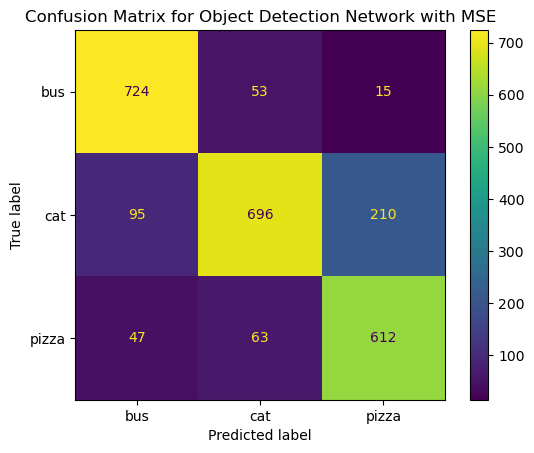

In [519]:
#CREATE CONFUSION MATRIX FOR OBJECT DETECTION MODEL USING MSE LOSS
from sklearn.metrics import confusion_matrix

y_true = y_true
y_pred = y_pred
confusion_matrix=confusion_matrix(y_true, y_pred, labels = [ "bus", "cat", "pizza"])
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels = [  "bus", "cat", "pizza"])
disp.plot()
disp.ax_.set_title("Confusion Matrix for Object Detection Network with MSE")
plt.show()

In [520]:
#TRAINING LOOP FOR MODEL USING COMPLETE IOU_LOSS LOSS
test_net_ciou = HW5Net(input_nc = 3, output_nc = 3, ngf = 4, n_blocks=4)
total_loss_test_net_using_ciou_loss = []
loss_test_net_ciou = []
criterion_CE = nn.CrossEntropyLoss()
#criterion_MSE = nn.MSELoss()
optimizer = torch.optim.Adam(test_net_ciou.parameters(), lr = 1e-3, betas = (0.9, 0.99))
epochs = 4
num_layers = len(list(test_net_ciou.parameters()))

print(num_layers)
for epoch in range(epochs):
    running_loss_CE = 0.0
    running_loss_CIOU = 0.0
    for i, data in enumerate(my_train_dataloader):
        print("in train dataloader iteration", i)
        inputs, class_label, bbox_label = data
        bbox_label = ops.box_convert(bbox_label, in_fmt = 'xyxy', out_fmt = 'cxcywh') #(boxes: Tensor, in_fmt: str, out_fmt: str)
        """
        ‘xyxy’: boxes are represented via corners, x1, y1 being top left and x2, y2 being bottom right. This is the format that torchvision utilities expect.
        ‘xywh’ : boxes are represented via corner, width and height, x1, y2 being top left, w, h being width and height.
        ‘cxcywh’ : boxes are represented via centre, width and height, cx, cy being center of box, w, h being width and height.
        """
        optimizer.zero_grad() #Sets gradients of all model parameters to zero. We want to compute fresh gradients
        #based on the new forward run. 
        outputs = test_net_ciou(inputs) #output[0] is cls and output[1] is bbox
        #print("shape of cls:", outputs[0].shape, "shape of bbox:", outputs[1].shape)
        
        loss_CE = criterion_CE(outputs[0], class_label) #compute cross-entropy loss
        #print("For computing CE loss, outputs[0] is", outputs[0], "and class_label is", class_label)
        loss_CE.backward(retain_graph = True)

        outputs_converted = ops.box_convert(outputs[1], in_fmt = 'cxcywh', out_fmt = 'xyxy')
        bbox_label = ops.box_convert(bbox_label, in_fmt = 'cxcywh', out_fmt = 'xyxy')

        loss_CIOU = ops.complete_box_iou_loss(boxes1 = outputs_converted, boxes2 = bbox_label, reduction = 'mean')

        loss_CIOU.backward()
        #loss.backward() #compute derivative of loss wrt each gradient. 
        optimizer.step() #takes a step on hyperplane based on derivatives
        running_loss_CE += loss_CE.item()
        running_loss_CIOU += loss_CIOU.item()
        if (i+1) % 10 == 0:
            print("[epoch: %d, batch: %5d] loss: %3f" % (epoch + 1, i + 1, running_loss_CE + running_loss_CIOU / 10))
            total_loss_test_net_using_ciou_loss.append(running_loss_CE + running_loss_CIOU/10)
            loss_test_net_ciou.append(running_loss_CIOU/10)
            print('running_loss_ciou', running_loss_CIOU/10)
            running_loss_CE = 0.0
            running_loss_CIOU = 0.0
            

84
in train dataloader iteration 0
predictions: tensor([[0.2410, 0.2540, 0.7257, 0.7505],
        [0.2469, 0.2488, 0.7224, 0.7591],
        [0.2421, 0.2825, 0.7327, 0.7737],
        [0.2288, 0.2473, 0.7217, 0.7545],
        [0.2159, 0.2666, 0.6995, 0.7526],
        [0.2352, 0.2551, 0.7270, 0.7549],
        [0.2434, 0.2436, 0.7278, 0.7470],
        [0.2516, 0.2570, 0.7349, 0.7576],
        [0.2230, 0.2656, 0.7169, 0.7680],
        [0.2066, 0.2787, 0.7033, 0.7679],
        [0.1946, 0.2498, 0.7049, 0.7565],
        [0.2221, 0.2566, 0.7170, 0.7485],
        [0.2350, 0.2795, 0.7129, 0.7683],
        [0.2407, 0.2764, 0.7262, 0.7627],
        [0.2306, 0.2607, 0.7144, 0.7421],
        [0.2232, 0.2481, 0.7170, 0.7497],
        [0.2145, 0.2781, 0.7158, 0.7654],
        [0.2151, 0.2639, 0.7067, 0.7403],
        [0.2394, 0.2456, 0.7228, 0.7474],
        [0.2305, 0.2494, 0.7362, 0.7509]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0219, 0.2387, 0.9516, 0.8667],
        [0.

in train dataloader iteration 5
predictions: tensor([[-0.4921, -0.4994,  0.5079,  0.5005],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.2603, -0.3467,  0.6719,  0.5744],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.2170, -0.3050,  0.6900,  0.5896],
        [-0.4999, -0.5000,  0.5001,  0.5000],
        [-0.4968, -0.4999,  0.5032,  0.5001],
        [-0.2195, -0.3087,  0.6894,  0.5880],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.2123, -0.3012,  0.6921,  0.5904],
        [-0.3692, -0.4404,  0.6100,  0.5339],
        [-0.4131, -0.4756,  0.5797,  0.5143],
        [-0.4526, -0.4883,  0.5447,  0.5080]], dtype=torch.float64,
       grad_f

[epoch: 1, batch:    10] loss: 104.804435
running_loss_ciou 0.955702585475229
in train dataloader iteration 10
predictions: tensor([[ 0.1595,  0.2113,  0.7491,  0.7968],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.4997, -0.4689,  0.5003,  0.5311],
        [ 0.1545,  0.2080,  0.7486,  0.7980],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.4979, -0.4189,  0.5021,  0.5810],
        [-0.2476, -0.0702,  0.6540,  0.8277],
        [-0.4999, -0.4818,  0.5001,  0.5182],
        [ 0.1484,  0.2050,  0.7486,  0.8013],
        [ 0.1599,  0.2116,  0.7491,  0.7966],
        [ 0.1378,  0.1984,  0.7470,  0.8034],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.4998, -0.4761,  0.5002,  0.5239],
        [-0.5000, -0.4991,  0.5000,  0.5009],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.1595,  0.2113,  0.7491,  0.7968],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.2629, -0.0705,  0.6476,  0.8368],
  

in train dataloader iteration 14
predictions: tensor([[-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.4991,  0.5000,  0.5009],
        [-0.5000, -0.4994,  0.5000,  0.5006],
        [ 0.0829,  0.1873,  0.7921,  0.8878],
        [ 0.0822,  0.1870,  0.7923,  0.8884],
        [ 0.0817,  0.1869,  0.7924,  0.8888],
        [ 0.0605,  0.1735,  0.7908,  0.8949],
        [ 0.0856,  0.1882,  0.7916,  0.8857],
        [ 0.0825,  0.1871,  0.7922,  0.8882],
        [ 0.0854,  0.1883,  0.7915,  0.8858],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.0837,  0.1875,  0.7918,  0.8870],
        [ 0.0816,  0.1868,  0.7924,  0.8889],
        [ 0.0823,  0.1871,  0.7922,  0.8883],
        [ 0.0850,  0.1880,  0.7915,  0.8860],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.0293,  0.1185,  0.7794,  0.9177],
        [-0.5000, -0.4999,  0.5000,  0.5001]], dtype=torch.float64,
       grad_

in train dataloader iteration 18
predictions: tensor([[-5.0000e-01, -5.0000e-01,  5.0000e-01,  5.0000e-01],
        [-3.0856e-03,  4.4540e-02,  8.9991e-01,  9.3847e-01],
        [ 2.5182e-03,  4.9032e-02,  8.9792e-01,  9.3505e-01],
        [-1.7033e-03,  4.5614e-02,  8.9948e-01,  9.3767e-01],
        [ 3.4498e-03,  4.9805e-02,  8.9731e-01,  9.3419e-01],
        [-5.0000e-01, -5.0000e-01,  5.0000e-01,  5.0000e-01],
        [-3.2075e-03,  4.4457e-02,  8.9994e-01,  9.3854e-01],
        [-5.0000e-01, -5.0000e-01,  5.0000e-01,  5.0000e-01],
        [-5.0000e-01, -5.0000e-01,  5.0000e-01,  5.0000e-01],
        [-1.5358e-02,  2.9327e-02,  8.9195e-01,  9.2836e-01],
        [-6.4737e-04,  4.6492e-02,  8.9908e-01,  9.3704e-01],
        [-2.9915e-01, -2.3779e-01,  6.9765e-01,  7.5815e-01],
        [-5.0000e-01, -5.0000e-01,  5.0000e-01,  5.0000e-01],
        [-2.4430e-03,  4.5072e-02,  8.9970e-01,  9.3810e-01],
        [-4.9982e-01, -4.9961e-01,  5.0018e-01,  5.0039e-01],
        [-5.0000e-01, -5

in train dataloader iteration 22
predictions: tensor([[ 0.1176,  0.0222,  1.0570,  0.9527],
        [-0.4983, -0.5000,  0.5017,  0.5000],
        [ 0.1170,  0.0215,  1.0566,  0.9522],
        [ 0.1148,  0.0095,  1.0670,  0.9539],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.1161,  0.0106,  1.0683,  0.9550],
        [ 0.1161,  0.0160,  1.0620,  0.9535],
        [ 0.1162,  0.0299,  1.0422,  0.9460],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.4546, -0.4993,  0.5454,  0.5007],
        [ 0.1129,  0.0108,  1.0616,  0.9515],
        [ 0.1164,  0.0274,  1.0460,  0.9473],
        [-0.4998, -0.5000,  0.5002,  0.5000],
        [ 0.1163,  0.0123,  1.0668,  0.9549],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.1165,  0.0279,  1.0462,  0.9478],
        [ 0.1178,  0.0160,  1.0654,  0.9555],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.0684, -0.0541,  1.0448,  0.9171]], dtype=torch.float64,
       grad_

in train dataloader iteration 26
predictions: tensor([[-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.0742, -0.0769,  1.0646,  0.9074],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.0507, -0.4949,  0.9493,  0.5051],
        [-0.3267, -0.4996,  0.6733,  0.5004],
        [ 0.0071, -0.4780,  1.0071,  0.5220],
        [ 0.1253,  0.0789,  1.0619,  0.9950],
        [ 0.1432,  0.0704,  1.1046,  1.0158],
        [-0.3504, -0.4998,  0.6496,  0.5002],
        [ 0.1162,  0.0358,  1.0750,  0.9793],
        [ 0.1282,  0.0732,  1.0809,  1.0083],
        [-0.3578, -0.5000,  0.6422,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.1251,  0.0779,  1.0626,  0.9953],
        [ 0.1254,  0.0778,  1.0641,  0.9964],
        [-0.4952, -0.5000,  0.5048,  0.5000],
        [ 0.1274,  0.0738,  1.0778,  1.0062],
        [-0.4838, -0.5000,  0.5162,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000]], dtype=torch.float64,
       grad_

in train dataloader iteration 31
predictions: tensor([[-0.4606, -0.5000,  0.5394,  0.5000],
        [ 0.0289,  0.1028,  0.9886,  1.0255],
        [ 0.0166,  0.0134,  0.9641,  0.9241],
        [ 0.0400,  0.1479,  0.9377,  0.9894],
        [-0.4999, -0.5000,  0.5001,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.0644,  0.1592,  0.9159,  0.9514],
        [-0.2145, -0.5000,  0.7855,  0.5000],
        [-0.4190, -0.5000,  0.5810,  0.5000],
        [-0.5000, -0.5000,  0.5000,  0.5000],
        [ 0.0547,  0.1562,  0.9260,  0.9693],
        [-0.3376, -0.5000,  0.6624,  0.5000],
        [-0.4924, -0.5000,  0.5076,  0.5000],
        [ 0.0418,  0.1494,  0.9364,  0.9875],
        [-0.0367, -0.3818,  0.9633,  0.6181],
        [ 0.0320,  0.0827,  0.9928,  1.0082],
        [ 0.0435,  0.1319,  0.9498,  0.9861],
        [ 0.0555,  0.1552,  0.9247,  0.9659],
        [ 0.0349,  0.1465,  0.9429,  0.9999],
        [-0.4096, -0.5000,  0.5904,  0.5000]], dtype=torch.float64,
       grad_

in train dataloader iteration 35
predictions: tensor([[ 0.2912, -0.5000,  1.2912,  0.5000],
        [-0.0021,  0.0899,  0.9218,  0.9675],
        [ 0.0319,  0.1438,  0.8938,  0.9480],
        [ 0.0230,  0.1361,  0.8979,  0.9538],
        [ 0.0293,  0.1443,  0.8928,  0.9501],
        [ 0.0583, -0.5000,  1.0583,  0.5000],
        [ 0.0284,  0.1422,  0.8936,  0.9497],
        [ 0.0322,  0.1451,  0.8920,  0.9470],
        [-0.2522, -0.4985,  0.7478,  0.5015],
        [-0.4759, -0.5000,  0.5241,  0.5000],
        [ 0.0336,  0.1468,  0.8898,  0.9452],
        [ 0.0349,  0.1473,  0.8889,  0.9434],
        [ 0.0272,  0.1409,  0.8956,  0.9517],
        [-0.0321,  0.2106,  0.9679,  1.2106],
        [ 0.0175,  0.1271,  0.9052,  0.9586],
        [ 0.0342,  0.1470,  0.8900,  0.9450],
        [ 0.0263,  0.1293,  0.9004,  0.9472],
        [ 0.0380,  0.1487,  0.8873,  0.9400],
        [-0.4965, -0.5000,  0.5035,  0.5000],
        [-0.0253, -0.4667,  0.9747,  0.5333]], dtype=torch.float64,
       grad_

[epoch: 1, batch:    40] loss: 30.891599
running_loss_ciou 0.6870383152838556
in train dataloader iteration 40
predictions: tensor([[ 0.1083,  0.0046,  1.1078,  1.0015],
        [ 0.4949, -0.4897,  1.4949,  0.5103],
        [ 0.5000, -0.5000,  1.5000,  0.5000],
        [ 0.4184, -0.0794,  1.4184,  0.9206],
        [ 0.4976, -0.4998,  1.4976,  0.5002],
        [ 0.5000, -0.5000,  1.5000,  0.5000],
        [ 0.1753,  0.0623,  1.1753,  1.0623],
        [ 0.0934,  0.0370,  1.0925,  1.0325],
        [ 0.5000,  0.2460,  1.5000,  1.2460],
        [ 0.4998, -0.4992,  1.4998,  0.5008],
        [ 0.0350,  0.1573,  0.9868,  1.0631],
        [ 0.0268,  0.0826,  0.9876,  1.0047],
        [ 0.1394, -0.0730,  1.1393,  0.9261],
        [ 0.4953, -0.4940,  1.4953,  0.5060],
        [ 0.0492,  0.1375,  0.9321,  0.9609],
        [ 0.4986,  0.2324,  1.4986,  1.2324],
        [ 0.0311,  0.1282,  0.9323,  0.9734],
        [ 0.4450, -0.0437,  1.4450,  0.9563],
        [ 0.0895,  0.1103,  1.0882,  1.1038],
  

in train dataloader iteration 45
predictions: tensor([[-4.5426e-01,  3.7586e-01,  5.4574e-01,  1.3759e+00],
        [ 7.1059e-02,  2.6758e-01,  1.0711e+00,  1.2676e+00],
        [ 1.0720e-03,  9.7580e-02,  9.2527e-01,  9.6627e-01],
        [-1.0924e-01, -4.6105e-01,  8.9076e-01,  5.3895e-01],
        [-5.0387e-04,  9.7386e-02,  9.2517e-01,  9.6793e-01],
        [ 2.0930e-01, -4.9992e-01,  1.2093e+00,  5.0008e-01],
        [ 1.0992e-01, -3.9839e-01,  1.1099e+00,  6.0161e-01],
        [ 1.9307e-03,  9.8555e-02,  9.2379e-01,  9.6449e-01],
        [ 3.6134e-02,  1.5324e-01,  1.0361e+00,  1.1532e+00],
        [-3.6405e-02,  7.1638e-02,  9.4299e-01,  1.0229e+00],
        [ 1.0407e-02,  1.1003e-01,  9.1987e-01,  9.6010e-01],
        [-4.6628e-01, -7.2579e-02,  5.3372e-01,  9.2742e-01],
        [-2.4722e-01,  1.1464e-01,  7.5278e-01,  1.1146e+00],
        [ 1.8975e-01, -4.9729e-01,  1.1897e+00,  5.0271e-01],
        [-2.6683e-02,  1.0739e-01,  9.2922e-01,  1.0181e+00],
        [-3.6312e-01,  2

in train dataloader iteration 49
predictions: tensor([[ 0.0937,  0.1398,  0.9197,  0.8837],
        [ 0.0846,  0.1201,  0.9076,  0.8653],
        [-0.0107,  0.0270,  0.9829,  0.9992],
        [ 0.0822,  0.1173,  0.9097,  0.8667],
        [ 0.0464, -0.2372,  1.0464,  0.7628],
        [-0.1248, -0.4295,  0.8752,  0.5705],
        [ 0.0851,  0.1204,  0.9068,  0.8645],
        [ 0.0869,  0.1226,  0.9053,  0.8634],
        [ 0.0813,  0.1163,  0.9106,  0.8676],
        [ 0.0951,  0.1307,  0.8989,  0.8583],
        [ 0.4999, -0.4993,  1.4999,  0.5007],
        [ 0.0846,  0.1201,  0.9076,  0.8651],
        [ 0.0849,  0.1200,  0.9070,  0.8645],
        [ 0.0796,  0.1145,  0.9122,  0.8688],
        [ 0.0919,  0.1276,  0.9004,  0.8592],
        [ 0.4049, -0.2404,  1.4049,  0.7596],
        [ 0.0445,  0.0086,  0.9965,  0.9036],
        [ 0.0958,  0.1311,  0.8990,  0.8591],
        [ 0.0876,  0.1230,  0.9046,  0.8627],
        [ 0.0855,  0.1209,  0.9067,  0.8644]], dtype=torch.float64,
       grad_

in train dataloader iteration 53
predictions: tensor([[ 0.0627,  0.3316,  1.0626,  1.3289],
        [ 0.2048,  0.4703,  1.2048,  1.4703],
        [-0.3441,  0.4951,  0.6559,  1.4951],
        [-0.0062,  0.1542,  0.9577,  1.0549],
        [-0.3122,  0.5000,  0.6878,  1.5000],
        [ 0.0732,  0.1500,  0.9097,  0.9035],
        [ 0.0740,  0.2023,  0.8978,  0.9358],
        [ 0.0770,  0.1547,  0.9113,  0.9042],
        [ 0.3610,  0.4963,  1.3610,  1.4963],
        [ 0.1188,  0.2041,  0.8698,  0.8801],
        [ 0.0760,  0.1581,  0.9094,  0.9069],
        [ 0.0584,  0.1549,  0.9325,  0.9422],
        [-0.0235,  0.1344,  0.9765,  1.1338],
        [-0.2786,  0.5000,  0.7214,  1.5000],
        [ 0.1547,  0.5000,  1.1547,  1.5000],
        [ 0.2341,  0.5000,  1.2341,  1.5000],
        [ 0.1980,  0.5000,  1.1980,  1.5000],
        [ 0.0128,  0.1455,  0.9795,  1.0489],
        [ 0.0033,  0.2041,  0.9866,  1.1393],
        [ 0.0160,  0.1434,  0.9485,  0.9935]], dtype=torch.float64,
       grad_

in train dataloader iteration 57
predictions: tensor([[0.2502, 0.4654, 1.2502, 1.4651],
        [0.1123, 0.1715, 0.8908, 0.8726],
        [0.0137, 0.2745, 1.0074, 1.2422],
        [0.1371, 0.2359, 0.9190, 0.9253],
        [0.1118, 0.1706, 0.8913, 0.8727],
        [0.0244, 0.3222, 1.0237, 1.3150],
        [0.3962, 0.4816, 1.3962, 1.4816],
        [0.0938, 0.1581, 0.9114, 0.8932],
        [0.1479, 0.2014, 0.8760, 0.8582],
        [0.4985, 0.5000, 1.4985, 1.5000],
        [0.1359, 0.1876, 0.8656, 0.8489],
        [0.1541, 0.2085, 0.8615, 0.8509],
        [0.1011, 0.1634, 0.9032, 0.8847],
        [0.0925, 0.1572, 0.9128, 0.8946],
        [0.1110, 0.1705, 0.8924, 0.8740],
        [0.0929, 0.1576, 0.9121, 0.8940],
        [0.5000, 0.5000, 1.5000, 1.5000],
        [0.0953, 0.1593, 0.9096, 0.8914],
        [0.1842, 0.1935, 0.8373, 0.7977],
        [0.3042, 0.4736, 1.3042, 1.4736]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.1191, 0.3088, 0.6992],
        [0.14

in train dataloader iteration 62
predictions: tensor([[0.1502, 0.2052, 0.8616, 0.8575],
        [0.1334, 0.2350, 0.9106, 0.9293],
        [0.0637, 0.2084, 0.9709, 1.0265],
        [0.0938, 0.1709, 0.9082, 0.9095],
        [0.0484, 0.1459, 0.9774, 1.0037],
        [0.0988, 0.1691, 0.9052, 0.9022],
        [0.0451, 0.1454, 0.9694, 0.9983],
        [0.0184, 0.0199, 0.9978, 0.9569],
        [0.0570, 0.1559, 0.9576, 0.9805],
        [0.0536, 0.1451, 0.9590, 0.9747],
        [0.0450, 0.1503, 0.9770, 1.0130],
        [0.0527, 0.2380, 1.0496, 1.2175],
        [0.4992, 0.3337, 1.4992, 1.3337],
        [0.0633, 0.1578, 0.9432, 0.9601],
        [0.4828, 0.4903, 1.4828, 1.4903],
        [0.0534, 0.1477, 0.9706, 0.9916],
        [0.0748, 0.1622, 0.9317, 0.9419],
        [0.0944, 0.1716, 0.9008, 0.9056],
        [0.4995, 0.4997, 1.4995, 1.4997],
        [0.1110, 0.1438, 0.9424, 0.8892]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0022, 0.8410, 0.9865],
        [0.00

in train dataloader iteration 67
predictions: tensor([[-0.1327,  0.1559,  0.8660,  1.1466],
        [ 0.0618,  0.1459,  0.9057,  0.9212],
        [-0.4395, -0.5000,  0.5605,  0.5000],
        [-0.4087, -0.2331,  0.5913,  0.7669],
        [-0.3584, -0.0118,  0.6416,  0.9882],
        [-0.1446, -0.4613,  0.8554,  0.5387],
        [ 0.0454,  0.1332,  0.9194,  0.9378],
        [ 0.1275,  0.1852,  0.8483,  0.8483],
        [ 0.0814,  0.1569,  0.8672,  0.8752],
        [ 0.1016,  0.1677,  0.8769,  0.8804],
        [-0.3926,  0.1864,  0.6074,  1.1864],
        [ 0.0694,  0.1499,  0.9012,  0.9127],
        [ 0.0705,  0.1507,  0.8990,  0.9109],
        [ 0.0510,  0.1375,  0.9136,  0.9302],
        [ 0.0678,  0.1485,  0.9015,  0.9136],
        [-0.0724, -0.0224,  0.9134,  0.9259],
        [ 0.0270,  0.1204,  0.9340,  0.9615],
        [ 0.1156,  0.1041,  0.8756,  0.8061],
        [ 0.0736,  0.1527,  0.8968,  0.9080],
        [-0.0812,  0.0982,  0.9112,  1.0690]], dtype=torch.float64,
       grad_

in train dataloader iteration 71
predictions: tensor([[-0.0752, -0.5000,  0.9248,  0.5000],
        [ 0.0910,  0.1568,  0.9194,  0.9196],
        [ 0.0487,  0.1337,  0.9588,  0.9824],
        [ 0.1139,  0.1621,  0.8882,  0.8748],
        [ 0.0931,  0.1505,  0.9207,  0.9093],
        [-0.0122,  0.1094,  0.9726,  1.0617],
        [ 0.0435, -0.0606,  0.9575,  0.7949],
        [ 0.0514,  0.1337,  0.9568,  0.9782],
        [ 0.0531,  0.1302,  0.9610,  0.9762],
        [-0.0478,  0.1168,  0.9494,  1.1002],
        [ 0.1023,  0.1623,  0.9028,  0.8978],
        [ 0.0205, -0.3366,  1.0199,  0.6601],
        [ 0.0735,  0.1515,  0.9316,  0.9445],
        [ 0.0483,  0.1290,  0.9637,  0.9826],
        [-0.0125,  0.1300,  0.9761,  1.0877],
        [-0.0161, -0.2868,  0.9839,  0.7132],
        [ 0.0358, -0.4417,  1.0357,  0.5580],
        [ 0.0561,  0.1304,  0.9588,  0.9692],
        [ 0.0805,  0.1499,  0.9322,  0.9346],
        [ 0.0365,  0.1294,  0.9677,  1.0047]], dtype=torch.float64,
       grad_

in train dataloader iteration 75
predictions: tensor([[ 0.4462,  0.1956,  1.4462,  1.1956],
        [ 0.0675,  0.2883,  1.0668,  1.2819],
        [ 0.0193,  0.2337,  1.0190,  1.2294],
        [ 0.0814,  0.1747,  0.9485,  0.9737],
        [ 0.1014,  0.1856,  0.9280,  0.9431],
        [ 0.1462,  0.2049,  0.8821,  0.8828],
        [ 0.2732, -0.2990,  1.2732,  0.7010],
        [ 0.0791,  0.1752,  0.9473,  0.9751],
        [ 0.1396,  0.2052,  0.8832,  0.8892],
        [ 0.2076,  0.2391,  0.7996,  0.8063],
        [ 0.1902,  0.4323,  1.1902,  1.4323],
        [ 0.1244,  0.1971,  0.9009,  0.9102],
        [ 0.1526,  0.1896,  0.8618,  0.8449],
        [ 0.0890,  0.1803,  0.9411,  0.9632],
        [ 0.0666,  0.1699,  0.9625,  0.9995],
        [ 0.1470,  0.2103,  0.8766,  0.8813],
        [ 0.1224,  0.1959,  0.9031,  0.9117],
        [ 0.0835,  0.1764,  0.9434,  0.9684],
        [ 0.1073,  0.1880,  0.9195,  0.9329],
        [ 0.0927,  0.1814,  0.9319,  0.9522]], dtype=torch.float64,
       grad_

[epoch: 1, batch:    80] loss: 23.052139
running_loss_ciou 0.6183852927508193
in train dataloader iteration 80
predictions: tensor([[ 0.0927,  0.1849,  0.9352,  0.9462],
        [ 0.1331,  0.2234,  0.8682,  0.8867],
        [ 0.0831,  0.1798,  0.9486,  0.9638],
        [ 0.1211,  0.1989,  0.8959,  0.8995],
        [-0.1130,  0.4999,  0.8870,  1.4999],
        [ 0.0731,  0.1750,  0.9614,  0.9834],
        [ 0.1190,  0.1992,  0.9052,  0.9086],
        [-0.3593,  0.4608,  0.6407,  1.4608],
        [-0.4297,  0.5000,  0.5703,  1.5000],
        [ 0.0232,  0.2494,  0.9353,  1.0519],
        [ 0.0861,  0.2146,  0.8937,  0.9227],
        [ 0.1398,  0.2172,  0.8584,  0.8654],
        [ 0.1214,  0.1992,  0.9042,  0.9068],
        [ 0.0653,  0.1712,  0.9730,  1.0015],
        [ 0.0999,  0.1892,  0.9288,  0.9370],
        [ 0.1266,  0.1986,  0.8864,  0.8892],
        [ 0.1485,  0.2165,  0.8585,  0.8626],
        [ 0.0889,  0.2433,  0.8988,  0.9563],
        [ 0.1742,  0.2292,  0.8260,  0.8347],
  

in train dataloader iteration 85
predictions: tensor([[ 0.0752,  0.1401,  0.9396,  0.8867],
        [ 0.1368,  0.1937,  0.8722,  0.8272],
        [ 0.1075,  0.0154,  1.0201,  0.8414],
        [ 0.2016,  0.2336,  0.7919,  0.7791],
        [ 0.0698, -0.1796,  1.0672,  0.7955],
        [ 0.0828,  0.1499,  0.9310,  0.8828],
        [ 0.0726,  0.1398,  0.9435,  0.8935],
        [ 0.1088,  0.1680,  0.9029,  0.8549],
        [ 0.0734,  0.1391,  0.9436,  0.8913],
        [ 0.1405,  0.1935,  0.8679,  0.8227],
        [ 0.0891,  0.1564,  0.9188,  0.8755],
        [ 0.0330,  0.1192,  0.9639,  0.9231],
        [ 0.0577,  0.1265,  0.9601,  0.9134],
        [ 0.1012,  0.1617,  0.9165,  0.8592],
        [ 0.1447,  0.1957,  0.8582,  0.8139],
        [ 0.1374,  0.1994,  0.8666,  0.8252],
        [ 0.1437,  0.2077,  0.8610,  0.8259],
        [-0.0764,  0.4440,  0.9236,  1.4440],
        [ 0.2447, -0.3355,  1.2447,  0.6645],
        [ 0.0463, -0.0851,  1.0336,  0.8502]], dtype=torch.float64,
       grad_

in train dataloader iteration 89
predictions: tensor([[ 0.1116,  0.1770,  0.8771,  0.8295],
        [ 0.0505,  0.1281,  0.9357,  0.8776],
        [ 0.0152,  0.0864,  0.9662,  0.9183],
        [ 0.0293,  0.1054,  0.9541,  0.9000],
        [ 0.0066,  0.0950,  0.9631,  0.8881],
        [ 0.0646,  0.1417,  0.9230,  0.8648],
        [ 0.0276,  0.1031,  0.9561,  0.9017],
        [ 0.0165,  0.0879,  0.9656,  0.9164],
        [ 0.0346,  0.1521,  0.9326,  0.8603],
        [ 0.1593,  0.2079,  0.8207,  0.7811],
        [ 0.1765,  0.2184,  0.8068,  0.7754],
        [ 0.0534,  0.1317,  0.8968,  0.8297],
        [ 0.0288,  0.1047,  0.9552,  0.9011],
        [ 0.0897,  0.1617,  0.9001,  0.8432],
        [-0.0034,  0.0856,  0.9689,  0.9033],
        [ 0.1757,  0.2277,  0.8124,  0.7971],
        [-0.1391, -0.3168,  0.8609,  0.6832],
        [ 0.0537,  0.1310,  0.9322,  0.8740],
        [ 0.0626,  0.1395,  0.9243,  0.8670],
        [ 0.0858,  0.1580,  0.8971,  0.8441]], dtype=torch.float64,
       grad_

in train dataloader iteration 93
predictions: tensor([[-0.1156, -0.1831,  0.8844,  0.8145],
        [ 0.0576,  0.1682,  0.9418,  0.9050],
        [ 0.0233,  0.2046,  0.9182,  0.9399],
        [ 0.1073,  0.1976,  0.8890,  0.8506],
        [ 0.0350,  0.1498,  0.9649,  0.9390],
        [ 0.0228,  0.1957,  0.9426,  0.8932],
        [ 0.0438,  0.1600,  0.9559,  0.9221],
        [ 0.0113,  0.1279,  0.9888,  1.0014],
        [ 0.0266,  0.1428,  0.9733,  0.9546],
        [ 0.0477,  0.1653,  0.9538,  0.9182],
        [ 0.0095,  0.1240,  0.9928,  1.0143],
        [ 0.2212,  0.3254,  1.2212,  1.3240],
        [ 0.1606,  0.2271,  0.8287,  0.8032],
        [-0.1084,  0.3089,  0.8916,  1.3029],
        [ 0.0252,  0.1414,  0.9796,  0.9655],
        [ 0.0154,  0.1323,  0.9871,  0.9905],
        [ 0.0985,  0.1936,  0.9003,  0.8616],
        [ 0.0357,  0.1520,  0.9630,  0.9366],
        [-0.0331,  0.0675,  0.9552,  0.8473],
        [-0.0557, -0.0264,  0.9407,  0.8379]], dtype=torch.float64,
       grad_

in train dataloader iteration 97
predictions: tensor([[ 1.4264e-03,  1.4345e-01,  9.5443e-01,  9.5132e-01],
        [ 5.5807e-02,  1.8093e-01,  9.0436e-01,  8.6942e-01],
        [-7.4276e-02,  1.8990e-01,  8.8442e-01,  8.5943e-01],
        [ 1.9665e-02,  2.2994e-01,  8.6628e-01,  8.5728e-01],
        [ 3.9673e-02,  1.7245e-01,  9.1071e-01,  8.8058e-01],
        [-2.5886e-01,  4.4292e-01,  7.4102e-01,  1.1977e+00],
        [-1.6108e-02,  1.2655e-01,  9.6409e-01,  9.9555e-01],
        [-7.0297e-03,  1.3742e-01,  9.5809e-01,  9.6682e-01],
        [-1.4377e-02,  1.2800e-01,  9.6370e-01,  9.9343e-01],
        [ 1.0643e-01,  2.0806e-01,  8.5085e-01,  8.1972e-01],
        [-4.0280e-03,  1.3688e-01,  9.5861e-01,  9.6478e-01],
        [-2.3408e-03,  1.4754e-01,  9.5068e-01,  9.4899e-01],
        [-9.9379e-04,  1.4214e-01,  9.5515e-01,  9.5350e-01],
        [ 7.4490e-03,  1.4596e-01,  9.5204e-01,  9.4638e-01],
        [ 8.9052e-04,  1.4440e-01,  9.5314e-01,  9.5050e-01],
        [ 8.9438e-03,  1

in train dataloader iteration 101
predictions: tensor([[ 0.0819,  0.1841,  0.9354,  0.8591],
        [ 0.3350,  0.2388,  1.3350,  1.1909],
        [ 0.0705,  0.1784,  0.9498,  0.8699],
        [ 0.0225,  0.1473,  0.9909,  0.9344],
        [ 0.1406, -0.1670,  1.1173,  0.6440],
        [ 0.1208,  0.0746,  0.9867,  0.7007],
        [ 0.0683,  0.1774,  0.9571,  0.8793],
        [ 0.0589,  0.1674,  0.9679,  0.8895],
        [ 0.1403, -0.0632,  1.1403,  0.8682],
        [ 0.1204,  0.0909,  0.9019,  0.7150],
        [ 0.0667,  0.1652,  0.9642,  0.8875],
        [ 0.0537,  0.1797,  0.9475,  0.8615],
        [ 0.0498,  0.1485,  0.9841,  0.9113],
        [ 0.0630,  0.1683,  0.9639,  0.8856],
        [ 0.0559,  0.1603,  0.9641,  0.8865],
        [ 0.0638,  0.1645,  0.9632,  0.8881],
        [ 0.0533,  0.1580,  0.9769,  0.9037],
        [ 0.0759,  0.1536,  0.9796,  0.7438],
        [ 0.0620,  0.1651,  0.9694,  0.8908],
        [ 0.1011,  0.1986,  0.9131,  0.8468]], dtype=torch.float64,
       grad

in train dataloader iteration 105
predictions: tensor([[ 0.0812,  0.1446,  0.9704,  0.8570],
        [ 0.0421,  0.1763,  1.0145,  0.9939],
        [ 0.0622,  0.2085,  0.9554,  0.9064],
        [ 0.0179,  0.1793,  1.0151,  0.9630],
        [ 0.0944,  0.2297,  0.8698,  0.8232],
        [ 0.0746,  0.2054,  0.9232,  0.8636],
        [ 0.0711,  0.1209,  1.0617,  1.0197],
        [ 0.0656,  0.1862,  0.9763,  0.9328],
        [ 0.0561,  0.2069,  0.9500,  0.8987],
        [ 0.0842,  0.1990,  0.9614,  0.8960],
        [ 0.0125,  0.1847,  1.0120,  1.0943],
        [ 0.0689,  0.1780,  0.9958,  0.9420],
        [ 0.0498,  0.1665,  0.9849,  0.9514],
        [ 0.0479,  0.1890,  0.9924,  0.9546],
        [ 0.1136,  0.2368,  0.8683,  0.8278],
        [ 0.0068,  0.1889,  0.9658,  0.9085],
        [ 0.1217,  0.2230,  0.8562,  0.8004],
        [ 0.0522,  0.2172,  0.9344,  0.8645],
        [ 0.1163,  0.2302,  0.8765,  0.8384],
        [-0.0151,  0.0843,  0.9746,  0.9802]], dtype=torch.float64,
       grad

predictions: tensor([[ 0.0054,  0.1754,  0.9320,  0.9679],
        [ 0.0983,  0.2058,  0.8581,  0.8525],
        [-0.0288, -0.0062,  0.9663,  0.8955],
        [ 0.1121,  0.1678,  0.9263,  0.8874],
        [ 0.1399,  0.2060,  0.8488,  0.8114],
        [-0.0427,  0.1338,  0.9102,  0.9390],
        [ 0.0722,  0.1782,  0.9009,  0.9228],
        [ 0.0694,  0.1821,  0.8919,  0.8782],
        [ 0.1248,  0.2333,  0.8509,  0.8669],
        [ 0.0345,  0.1642,  0.9228,  0.9115],
        [ 0.0420,  0.1097,  0.9941,  0.9362],
        [ 0.0275,  0.1827,  0.9325,  0.9720],
        [-0.0751,  0.1937,  0.8917,  1.0094],
        [ 0.0872,  0.1886,  0.8338,  0.8236],
        [ 0.0418,  0.1549,  0.9329,  0.8929],
        [ 0.0449,  0.0699,  1.0401,  1.0074],
        [ 0.0908,  0.2103,  0.9087,  0.9061],
        [ 0.0896,  0.2180,  0.8627,  0.8687],
        [ 0.0193,  0.1286,  0.9540,  0.9099],
        [ 0.0932,  0.1796,  0.8988,  0.8719]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([

in train dataloader iteration 113
predictions: tensor([[ 0.0367,  0.0886,  0.9516,  0.9242],
        [ 0.0496,  0.1240,  0.9072,  1.0017],
        [ 0.0460,  0.1235,  0.9039,  0.9303],
        [ 0.0028,  0.0419,  0.9549,  0.9058],
        [ 0.0549,  0.0993,  0.9698,  0.9586],
        [ 0.0030,  0.1016,  0.9821,  1.0711],
        [-0.0107,  0.0385,  0.9372,  0.8834],
        [-0.0111,  0.0996,  0.9598,  1.0538],
        [ 0.0864,  0.1257,  0.8971,  0.8788],
        [ 0.0080, -0.0069,  1.0019,  0.9476],
        [ 0.0281,  0.1039,  0.9212,  0.9599],
        [ 0.0755,  0.1210,  0.9374,  0.9713],
        [ 0.0267,  0.0418,  1.0020,  0.9781],
        [ 0.1513,  0.1886,  0.8421,  0.8283],
        [ 0.0445,  0.0922,  0.9503,  0.9683],
        [ 0.0382,  0.1065,  0.9713,  1.0215],
        [ 0.0343,  0.0825,  0.9730,  0.9820],
        [ 0.1055,  0.1634,  0.8731,  0.8481],
        [ 0.1364,  0.1846,  0.8259,  0.8660],
        [ 0.0258,  0.1796,  0.8734,  1.0132]], dtype=torch.float64,
       grad

in train dataloader iteration 117
predictions: tensor([[ 6.6180e-02,  1.8458e-02,  1.0455e+00,  9.9122e-01],
        [ 4.2768e-02,  3.1111e-02,  1.0305e+00,  1.0197e+00],
        [-3.3206e-04,  2.0470e-02,  9.6631e-01,  9.3079e-01],
        [ 4.7971e-02,  1.8370e-02,  1.0297e+00,  1.0034e+00],
        [ 1.5151e-02,  7.3148e-03,  1.0120e+00,  9.9738e-01],
        [ 8.4521e-02,  7.9498e-02,  9.3554e-01,  9.5693e-01],
        [ 1.7944e-01,  2.0288e-01,  8.3571e-01,  8.1663e-01],
        [ 4.8215e-02,  7.6248e-03,  1.0348e+00,  9.8836e-01],
        [ 4.8178e-02,  1.3096e-02,  9.9025e-01,  9.7914e-01],
        [ 4.0646e-02,  3.3328e-02,  1.0161e+00,  9.9364e-01],
        [ 2.3213e-01,  1.9628e-01,  8.1562e-01,  8.0738e-01],
        [ 4.5775e-02,  1.7171e-02,  1.0186e+00,  9.7103e-01],
        [ 7.8997e-02, -2.1726e-02,  1.0472e+00,  9.6028e-01],
        [ 1.4012e-01,  1.3344e-01,  8.9382e-01,  8.8836e-01],
        [ 4.7614e-02,  8.9746e-03,  1.0447e+00,  1.0021e+00],
        [ 3.2003e-02,  

in train dataloader iteration 121
predictions: tensor([[0.1618, 0.1774, 0.8184, 0.8248],
        [0.1477, 0.1626, 0.9174, 0.9059],
        [0.1393, 0.1341, 0.8322, 0.9561],
        [0.2020, 0.2277, 0.7901, 0.7789],
        [0.0224, 0.0541, 0.9779, 0.9784],
        [0.1845, 0.1474, 0.7980, 0.8781],
        [0.0680, 0.1422, 0.8692, 0.9665],
        [0.1276, 0.1385, 0.8133, 0.9050],
        [0.1507, 0.1554, 0.7721, 0.8762],
        [0.1023, 0.1511, 0.8884, 0.8778],
        [0.1769, 0.1675, 0.8099, 0.8812],
        [0.1120, 0.1233, 0.8285, 0.9643],
        [0.2220, 0.2179, 0.7785, 0.7920],
        [0.0521, 0.0705, 0.9177, 0.9677],
        [0.1776, 0.1525, 0.8358, 0.8886],
        [0.0603, 0.0373, 0.9668, 0.9737],
        [0.0973, 0.0824, 0.8879, 0.9487],
        [0.1621, 0.1354, 0.8006, 0.9548],
        [0.1400, 0.1125, 0.8456, 0.9037],
        [0.1781, 0.1682, 0.8055, 0.8851]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1787, 0.1348, 0.9219, 0.9303],
        [0.0

in train dataloader iteration 125
predictions: tensor([[ 0.0932,  0.1314,  0.9811,  0.9212],
        [ 0.1082,  0.1494,  0.9266,  0.8999],
        [ 0.0828,  0.1019,  0.9129,  0.9321],
        [-0.0012,  0.1026,  0.9084,  0.8855],
        [ 0.1326,  0.1873,  0.8895,  0.8450],
        [ 0.0860,  0.1288,  0.9484,  0.9651],
        [ 0.0938,  0.1180,  0.9460,  0.9429],
        [ 0.1295,  0.1793,  0.8757,  0.8269],
        [ 0.1244,  0.1526,  0.9425,  0.9483],
        [ 0.1437,  0.1757,  0.9074,  0.9054],
        [ 0.1055,  0.1348,  0.9471,  0.9523],
        [ 0.1283,  0.1526,  0.9066,  0.9173],
        [-0.0215,  0.1428,  0.9533,  1.0913],
        [ 0.1206,  0.1421,  0.9203,  0.9194],
        [ 0.1208,  0.1417,  0.8631,  0.8734],
        [ 0.0950,  0.1152,  0.9334,  0.9588],
        [ 0.0692,  0.1567,  0.9143,  0.8797],
        [ 0.0938,  0.1204,  0.9226,  0.9487],
        [ 0.0780,  0.1340,  0.9029,  0.8358],
        [ 0.1555,  0.1819,  0.8527,  0.8202]], dtype=torch.float64,
       grad

in train dataloader iteration 129
predictions: tensor([[0.0368, 0.1428, 0.9626, 0.9503],
        [0.0169, 0.0258, 0.9923, 0.8910],
        [0.0464, 0.1013, 0.9765, 0.8946],
        [0.0252, 0.1613, 0.9490, 0.9813],
        [0.0551, 0.1287, 0.9852, 0.9713],
        [0.0647, 0.1587, 0.9686, 0.9619],
        [0.1545, 0.1836, 0.8583, 0.8002],
        [0.0579, 0.1506, 0.9486, 0.9323],
        [0.0226, 0.1499, 0.9654, 1.0002],
        [0.0253, 0.1506, 0.9522, 0.9981],
        [0.1514, 0.1946, 0.8753, 0.8091],
        [0.0612, 0.1511, 0.9652, 0.9456],
        [0.0259, 0.1437, 0.9529, 0.9864],
        [0.0764, 0.1676, 0.9118, 0.9023],
        [0.0248, 0.0626, 0.9612, 0.8590],
        [0.0995, 0.1666, 0.9441, 0.8670],
        [0.0540, 0.1448, 0.9676, 0.9115],
        [0.0916, 0.1671, 0.9462, 0.9137],
        [0.0393, 0.1775, 0.9395, 0.9596],
        [0.1097, 0.0844, 0.9798, 0.8566]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0065, 0.0968, 0.8150, 0.8409],
        [0.0

in train dataloader iteration 134
predictions: tensor([[0.0266, 0.1508, 0.9161, 0.9300],
        [0.0647, 0.1512, 0.9126, 0.9143],
        [0.0914, 0.1329, 0.9590, 0.8712],
        [0.1197, 0.1524, 1.0066, 0.9408],
        [0.0606, 0.1562, 0.9306, 0.9096],
        [0.0779, 0.1481, 0.9630, 0.9060],
        [0.0470, 0.1685, 0.8910, 0.9084],
        [0.1134, 0.1088, 1.0339, 0.9508],
        [0.1246, 0.1786, 0.9153, 0.8454],
        [0.0599, 0.1144, 0.9734, 0.9164],
        [0.1348, 0.2051, 0.8690, 0.8403],
        [0.1319, 0.1715, 0.8835, 0.8380],
        [0.1168, 0.1742, 0.9148, 0.8575],
        [0.0809, 0.1193, 0.9832, 0.8991],
        [0.1192, 0.2109, 0.8798, 0.8924],
        [0.0410, 0.1472, 0.9265, 0.9284],
        [0.0883, 0.1364, 0.9183, 0.8628],
        [0.1388, 0.1754, 0.9369, 0.8723],
        [0.0702, 0.1233, 0.9553, 0.9024],
        [0.0808, 0.1460, 0.9387, 0.8857]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0015, 0.1326, 0.9109, 1.0000],
        [0.1

in train dataloader iteration 139
predictions: tensor([[0.1497, 0.1925, 0.8265, 0.8194],
        [0.0619, 0.1563, 1.0287, 1.0221],
        [0.1668, 0.1814, 0.8282, 0.7911],
        [0.1284, 0.2016, 0.8725, 0.8239],
        [0.1756, 0.1976, 0.8336, 0.7942],
        [0.1590, 0.1956, 0.8224, 0.7967],
        [0.1899, 0.2201, 0.8063, 0.7673],
        [0.1715, 0.2026, 0.8159, 0.7680],
        [0.1045, 0.1630, 0.9001, 0.8746],
        [0.1346, 0.1871, 0.8489, 0.8376],
        [0.1276, 0.1948, 0.8610, 0.8492],
        [0.1904, 0.2295, 0.8082, 0.7841],
        [0.1927, 0.2213, 0.8062, 0.7879],
        [0.1606, 0.2026, 0.8317, 0.7979],
        [0.0830, 0.1351, 0.8938, 0.8695],
        [0.1601, 0.2059, 0.8617, 0.8163],
        [0.1450, 0.1714, 0.8367, 0.8047],
        [0.0985, 0.1892, 0.8930, 0.8895],
        [0.1151, 0.1825, 0.8856, 0.8741],
        [0.1017, 0.1818, 0.8914, 0.8875]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1306, 0.0043, 0.7145, 0.8043],
        [0.1

in train dataloader iteration 143
predictions: tensor([[0.1285, 0.1667, 0.8963, 0.8904],
        [0.0679, 0.1013, 0.9438, 0.8900],
        [0.0735, 0.1243, 1.0360, 1.0363],
        [0.0515, 0.0836, 1.0242, 1.0203],
        [0.0779, 0.1307, 0.9241, 0.9297],
        [0.1144, 0.1351, 1.0408, 0.9692],
        [0.0844, 0.0995, 1.0594, 1.0362],
        [0.1229, 0.1494, 0.9091, 0.8930],
        [0.1352, 0.1443, 0.8937, 0.8821],
        [0.0743, 0.1444, 0.9581, 0.9617],
        [0.1235, 0.1719, 0.9478, 0.9057],
        [0.0900, 0.1464, 0.9457, 0.8972],
        [0.1074, 0.1240, 1.0624, 1.0187],
        [0.0474, 0.0840, 0.9535, 0.9488],
        [0.1040, 0.1522, 0.9147, 0.8610],
        [0.0800, 0.1136, 1.0002, 0.9685],
        [0.1001, 0.1313, 1.0480, 1.0070],
        [0.0628, 0.0911, 0.9466, 0.8809],
        [0.1412, 0.1998, 0.9120, 0.8940],
        [0.0946, 0.1390, 0.9282, 0.9049]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0068, 0.3084, 0.6955, 0.9219],
        [0.3

in train dataloader iteration 147
predictions: tensor([[-0.0406,  0.0351,  0.9449,  0.9879],
        [-0.0598,  0.0339,  0.8912,  0.9155],
        [ 0.0358,  0.0548,  0.9203,  0.8685],
        [-0.0328,  0.0814,  0.9121,  0.9321],
        [-0.0163,  0.0694,  0.9586,  0.9898],
        [ 0.0430,  0.1046,  0.9142,  0.8705],
        [-0.0122,  0.0481,  0.9671,  0.9753],
        [ 0.1595,  0.2117,  0.8003,  0.7969],
        [-0.0697,  0.0183,  0.9080,  0.9481],
        [ 0.0182,  0.1077,  0.9480,  0.9505],
        [-0.0191,  0.0573,  0.9343,  0.9504],
        [-0.0105,  0.0453,  0.9084,  0.8973],
        [-0.0710, -0.0464,  0.9269,  0.9453],
        [-0.0363, -0.0274,  0.9580,  0.9468],
        [ 0.1340,  0.2052,  0.8566,  0.8782],
        [ 0.0290,  0.1409,  0.8914,  0.8428],
        [-0.0283,  0.0898,  0.9222,  0.9442],
        [-0.0427, -0.0465,  0.9482,  0.9285],
        [ 0.0082,  0.0687,  0.9399,  0.9283],
        [ 0.0805,  0.1685,  0.8745,  0.8220]], dtype=torch.float64,
       grad

predictions: tensor([[0.0629, 0.1532, 0.9777, 0.9714],
        [0.1728, 0.2504, 0.8457, 0.8029],
        [0.0829, 0.1461, 0.9861, 0.9666],
        [0.1695, 0.2532, 0.8551, 0.8205],
        [0.0471, 0.1618, 0.9652, 0.9544],
        [0.1161, 0.1464, 0.9740, 0.9271],
        [0.0946, 0.1882, 0.9316, 0.9079],
        [0.0304, 0.1221, 0.9686, 1.0097],
        [0.0802, 0.1873, 0.9803, 0.9699],
        [0.0818, 0.1170, 1.0247, 1.0066],
        [0.0799, 0.1785, 0.9897, 0.9729],
        [0.0719, 0.2170, 0.9722, 0.9604],
        [0.1435, 0.2183, 0.8550, 0.8406],
        [0.1443, 0.2464, 0.8851, 0.7965],
        [0.0908, 0.1925, 1.0272, 0.9946],
        [0.0798, 0.1658, 1.0089, 0.9853],
        [0.1616, 0.2216, 0.8791, 0.7859],
        [0.1565, 0.2007, 0.8594, 0.8518],
        [0.1583, 0.2412, 0.8740, 0.8151],
        [0.0660, 0.1790, 0.9823, 0.9809]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2065, 0.5269, 0.8887, 1.0000],
        [0.2730, 0.0225, 0.9489, 0.8045],
    

in train dataloader iteration 156
predictions: tensor([[0.1027, 0.2063, 0.8734, 0.8884],
        [0.0956, 0.1613, 0.9203, 0.9131],
        [0.1242, 0.1611, 0.8740, 0.8523],
        [0.1046, 0.1757, 0.8796, 0.9097],
        [0.0764, 0.1619, 0.9155, 0.9447],
        [0.1181, 0.2140, 0.8028, 0.8478],
        [0.0514, 0.1777, 0.8741, 0.8918],
        [0.1383, 0.2229, 0.8685, 0.8725],
        [0.0807, 0.1618, 0.9271, 0.9497],
        [0.0883, 0.2240, 0.9326, 0.9622],
        [0.1274, 0.1816, 0.8638, 0.8802],
        [0.1394, 0.2439, 0.8821, 0.8526],
        [0.1112, 0.1972, 0.8583, 0.8819],
        [0.0911, 0.1615, 0.9525, 0.9504],
        [0.1729, 0.2265, 0.8081, 0.8272],
        [0.0987, 0.1896, 0.9195, 0.9127],
        [0.0906, 0.1591, 0.8802, 0.8810],
        [0.0932, 0.1680, 0.8981, 0.9137],
        [0.0833, 0.1623, 0.9165, 0.9109],
        [0.1248, 0.2522, 0.8461, 0.8907]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0970, 0.2845, 0.8412, 0.7565],
        [0.3

in train dataloader iteration 161
predictions: tensor([[ 0.1669,  0.2059,  0.8215,  0.8131],
        [ 0.0244,  0.0898,  0.9042,  0.9303],
        [ 0.0917,  0.1484,  0.9027,  0.8945],
        [-0.0158,  0.0781,  0.9229,  0.9876],
        [ 0.1356,  0.0691,  0.8861,  0.8235],
        [ 0.1274,  0.1452,  0.8649,  0.8445],
        [ 0.1248,  0.1237,  0.8650,  0.8600],
        [ 0.1407,  0.1503,  0.8501,  0.8275],
        [ 0.0511,  0.0410,  0.9268,  0.8887],
        [-0.0172,  0.0597,  0.9266,  0.9763],
        [ 0.1346,  0.1245,  0.8754,  0.8358],
        [ 0.1220,  0.1262,  0.8934,  0.8529],
        [-0.0126,  0.0594,  0.9211,  0.9705],
        [ 0.0475,  0.1583,  0.9185,  0.9752],
        [ 0.1201,  0.1494,  0.8787,  0.8582],
        [ 0.1371,  0.0925,  0.8683,  0.8129],
        [ 0.0882,  0.1731,  0.9125,  0.8911],
        [ 0.1800,  0.2340,  0.8167,  0.8245],
        [ 0.0184,  0.0310,  0.9339,  0.9182],
        [ 0.0344,  0.1261,  0.9295,  0.9718]], dtype=torch.float64,
       grad

in train dataloader iteration 166
predictions: tensor([[0.1261, 0.1390, 0.9338, 0.9260],
        [0.1174, 0.1851, 0.8880, 0.8997],
        [0.1644, 0.2221, 0.8544, 0.8529],
        [0.1524, 0.2290, 0.8800, 0.8560],
        [0.1545, 0.1915, 0.8571, 0.8293],
        [0.1597, 0.1426, 0.8929, 0.8661],
        [0.1426, 0.1780, 0.9098, 0.9018],
        [0.1400, 0.1922, 0.8976, 0.8911],
        [0.1055, 0.1991, 0.9455, 0.9696],
        [0.1634, 0.1723, 0.8766, 0.8470],
        [0.1438, 0.1529, 0.9066, 0.8818],
        [0.1389, 0.1619, 0.9070, 0.8970],
        [0.1556, 0.2130, 0.8842, 0.8733],
        [0.0732, 0.1691, 0.9691, 1.0218],
        [0.1569, 0.1567, 0.8733, 0.8835],
        [0.1294, 0.1568, 0.9164, 0.9056],
        [0.1674, 0.2334, 0.8774, 0.9013],
        [0.1285, 0.1179, 0.9273, 0.8997],
        [0.1332, 0.1302, 0.9153, 0.8981],
        [0.1278, 0.1688, 0.8937, 0.8927]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1998, 0.0000, 1.0000, 0.8230],
        [0.2

in train dataloader iteration 171
predictions: tensor([[0.0810, 0.0481, 0.9873, 0.9155],
        [0.1557, 0.1950, 0.8728, 0.8461],
        [0.1577, 0.2099, 0.8415, 0.8299],
        [0.1529, 0.2192, 0.8408, 0.8473],
        [0.1710, 0.1763, 0.8889, 0.8653],
        [0.1278, 0.2613, 0.8655, 0.8946],
        [0.1562, 0.1744, 0.8964, 0.8686],
        [0.1625, 0.1736, 0.8665, 0.8485],
        [0.1866, 0.1917, 0.8336, 0.8170],
        [0.1443, 0.1328, 0.9102, 0.8685],
        [0.1631, 0.1354, 0.9128, 0.8733],
        [0.1940, 0.2261, 0.8018, 0.8091],
        [0.1176, 0.1346, 0.9166, 0.8898],
        [0.1568, 0.1623, 0.8781, 0.8778],
        [0.1731, 0.1684, 0.8769, 0.8476],
        [0.1455, 0.1339, 0.9136, 0.8739],
        [0.1354, 0.2022, 0.8727, 0.8332],
        [0.1650, 0.2156, 0.8677, 0.8401],
        [0.1571, 0.1885, 0.8792, 0.8453],
        [0.1075, 0.1048, 0.9324, 0.8888]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0541, 0.9449, 0.9835],
        [0.0

in train dataloader iteration 176
predictions: tensor([[-0.0128,  0.0695,  0.9409,  0.9729],
        [ 0.0224,  0.1333,  0.9170,  0.9433],
        [ 0.1161,  0.2139,  0.8464,  0.8472],
        [ 0.0409,  0.1638,  0.9040,  0.9148],
        [ 0.1040,  0.1719,  0.8766,  0.8800],
        [ 0.0719,  0.1902,  0.8738,  0.8727],
        [ 0.1108,  0.1503,  0.8952,  0.8990],
        [-0.0036,  0.0827,  0.9355,  0.9629],
        [ 0.0201,  0.1407,  0.9174,  0.9518],
        [ 0.0545,  0.1696,  0.9160,  0.9110],
        [ 0.0259,  0.1459,  0.9336,  0.9629],
        [ 0.0421,  0.1280,  0.9494,  0.9534],
        [ 0.0384,  0.1114,  0.9316,  0.9351],
        [ 0.0418,  0.1161,  0.9173,  0.9315],
        [ 0.0701,  0.1532,  0.9071,  0.9024],
        [ 0.0898,  0.1825,  0.8863,  0.8796],
        [-0.1186,  0.2177,  0.8123,  1.1185],
        [ 0.0669,  0.1279,  0.9275,  0.9243],
        [ 0.0451,  0.1241,  0.9467,  0.9450],
        [ 0.0066,  0.1140,  0.9392,  0.9818]], dtype=torch.float64,
       grad

predictions: tensor([[ 0.1936,  0.2113,  0.7985,  0.8084],
        [ 0.0488,  0.1102,  0.9420,  0.9439],
        [ 0.0665,  0.1453,  0.9312,  0.9224],
        [ 0.0740,  0.1009,  0.9720,  0.9260],
        [ 0.0749,  0.1478,  0.9468,  0.9230],
        [ 0.0724,  0.1744,  0.8542,  0.9099],
        [ 0.0436,  0.0814,  0.9985,  0.9582],
        [ 0.0657,  0.0881,  0.9966,  0.9590],
        [ 0.0481,  0.0923,  0.9379,  0.9308],
        [ 0.0456,  0.1121,  0.9688,  0.9283],
        [ 0.0423,  0.1056,  0.9533,  0.9500],
        [-0.0168,  0.1167,  0.9516,  1.0132],
        [ 0.0593,  0.1520,  0.9388,  0.9312],
        [ 0.1095,  0.1448,  0.8988,  0.8739],
        [ 0.0811,  0.1311,  0.9163,  0.9001],
        [ 0.0361,  0.1263,  0.9555,  0.9691],
        [ 0.0522,  0.0897,  0.9895,  0.9414],
        [ 0.1006,  0.1751,  0.9181,  0.9076],
        [ 0.0829,  0.1081,  0.9768,  0.9237],
        [ 0.0544,  0.1205,  0.9466,  0.9284]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([

in train dataloader iteration 185
predictions: tensor([[0.0778, 0.1298, 0.9966, 0.9409],
        [0.0822, 0.1477, 0.9788, 0.9228],
        [0.1497, 0.2408, 0.8189, 0.8261],
        [0.0970, 0.1594, 0.9554, 0.9052],
        [0.0795, 0.1171, 1.0010, 0.9446],
        [0.0698, 0.1799, 1.0263, 1.0343],
        [0.1069, 0.1734, 0.9160, 0.9115],
        [0.1114, 0.1651, 0.9288, 0.8935],
        [0.1403, 0.1865, 0.8865, 0.8674],
        [0.0832, 0.1695, 0.9694, 0.9705],
        [0.1062, 0.1184, 0.9269, 0.9002],
        [0.0655, 0.1417, 0.9408, 0.9418],
        [0.1487, 0.2090, 0.8579, 0.8596],
        [0.0939, 0.1798, 0.9523, 0.9468],
        [0.1398, 0.2025, 0.8720, 0.8572],
        [0.0750, 0.1168, 1.0088, 0.9521],
        [0.0633, 0.1297, 0.9768, 0.9749],
        [0.0824, 0.1077, 0.9990, 0.9384],
        [0.0505, 0.1188, 0.9850, 0.9911],
        [0.1182, 0.2198, 0.8740, 0.8716]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3487, 0.1570, 0.8451, 0.9936],
        [0.0

[epoch: 1, batch:   190] loss: 30.798820
running_loss_ciou 0.5213845016924442
in train dataloader iteration 190
predictions: tensor([[ 0.0945,  0.2398,  0.8856,  0.9251],
        [ 0.1199,  0.1878,  0.8812,  0.8855],
        [ 0.1122,  0.2156,  0.8780,  0.9015],
        [ 0.0535,  0.1727,  0.9224,  0.9747],
        [ 0.0773,  0.1926,  0.9251,  0.9351],
        [ 0.0301,  0.1291,  0.9337,  0.9791],
        [ 0.1402,  0.2081,  0.8525,  0.8675],
        [-0.0116,  0.2084,  0.7925,  0.9713],
        [ 0.0936,  0.2170,  0.8922,  0.9331],
        [ 0.0956,  0.1446,  0.9016,  0.9095],
        [ 0.0890,  0.1522,  0.8877,  0.9109],
        [ 0.1514,  0.2476,  0.9192,  0.9004],
        [ 0.0989,  0.2286,  0.8995,  0.9199],
        [ 0.1779,  0.2231,  0.8172,  0.8334],
        [ 0.0542,  0.1512,  0.9152,  0.9603],
        [ 0.0816,  0.2505,  0.9247,  0.9770],
        [ 0.1312,  0.1905,  0.8728,  0.8713],
        [ 0.1503,  0.1969,  0.8279,  0.8415],
        [ 0.1308,  0.2522,  0.8617,  0.8771],
 

in train dataloader iteration 195
predictions: tensor([[ 0.1550,  0.2298,  0.8381,  0.8459],
        [ 0.1398,  0.1888,  0.8419,  0.8535],
        [ 0.0928,  0.1897,  0.9228,  0.9150],
        [ 0.0605,  0.0836,  0.9290,  0.9086],
        [ 0.0544,  0.1646,  0.9168,  0.9289],
        [ 0.1420,  0.2313,  0.8483,  0.8534],
        [ 0.1280,  0.1782,  0.8645,  0.8539],
        [ 0.1363,  0.2267,  0.8074,  0.8528],
        [ 0.0825,  0.1491,  0.9054,  0.8935],
        [ 0.0897,  0.1744,  0.9230,  0.9170],
        [ 0.0531,  0.1333,  0.9116,  0.9108],
        [ 0.0810,  0.1724,  0.9314,  0.9270],
        [ 0.0613,  0.1303,  0.9130,  0.9071],
        [-0.0108,  0.0630,  0.9373,  0.9581],
        [ 0.0859,  0.1942,  0.9186,  0.9052],
        [ 0.0498,  0.1508,  0.9197,  0.9329],
        [ 0.0394,  0.0991,  0.9179,  0.9118],
        [ 0.0917,  0.2501,  0.8475,  0.9092],
        [ 0.1305,  0.2373,  0.8780,  0.8873],
        [ 0.1228,  0.1639,  0.8634,  0.8580]], dtype=torch.float64,
       grad

in train dataloader iteration 199
predictions: tensor([[0.1300, 0.1855, 0.8774, 0.8523],
        [0.0288, 0.0808, 0.9799, 0.9590],
        [0.0794, 0.1770, 1.0142, 0.9434],
        [0.1208, 0.1501, 0.9201, 0.8768],
        [0.0259, 0.0815, 0.9861, 0.9718],
        [0.0579, 0.1134, 0.9367, 0.9071],
        [0.0751, 0.0778, 0.9534, 0.9109],
        [0.0205, 0.0652, 0.9809, 0.9612],
        [0.0993, 0.1295, 0.9429, 0.8742],
        [0.1040, 0.1687, 0.9437, 0.9036],
        [0.1590, 0.2151, 0.8294, 0.8318],
        [0.0891, 0.1250, 0.9282, 0.8857],
        [0.1459, 0.1979, 0.8769, 0.8491],
        [0.0845, 0.1079, 0.9401, 0.8882],
        [0.0373, 0.0945, 0.9664, 0.9455],
        [0.0304, 0.0331, 0.9726, 0.9158],
        [0.1077, 0.1509, 0.8722, 0.8677],
        [0.0822, 0.1569, 0.8944, 0.8884],
        [0.1716, 0.2034, 0.8582, 0.8251],
        [0.1075, 0.1683, 0.8375, 0.8633]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[1.2473e-01, 1.2584e-01, 8.4006e-01, 7.9325e-0

in train dataloader iteration 204
predictions: tensor([[0.0954, 0.0913, 0.9668, 0.8993],
        [0.1051, 0.1440, 0.9547, 0.9004],
        [0.0494, 0.1047, 1.0241, 1.0225],
        [0.0577, 0.0398, 0.9847, 0.9280],
        [0.0786, 0.0548, 1.0085, 0.9077],
        [0.0904, 0.1366, 0.9249, 0.8926],
        [0.0913, 0.1304, 0.9778, 0.9234],
        [0.1160, 0.1251, 0.9604, 0.8663],
        [0.0823, 0.1573, 1.0098, 0.9862],
        [0.0797, 0.0882, 0.9816, 0.8998],
        [0.1074, 0.1087, 0.9824, 0.8982],
        [0.0566, 0.1027, 0.9863, 0.9566],
        [0.1289, 0.1461, 0.9084, 0.8535],
        [0.1389, 0.2014, 0.9133, 0.8679],
        [0.0810, 0.1383, 0.9444, 0.9215],
        [0.1306, 0.1886, 1.0178, 0.9283],
        [0.0617, 0.1231, 0.9334, 0.9217],
        [0.0872, 0.1912, 0.9244, 0.8930],
        [0.1106, 0.1080, 0.9247, 0.8809],
        [0.0562, 0.0844, 1.0117, 0.9788]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0014, 0.0129, 0.9713, 1.0000],
        [0.0

in train dataloader iteration 209
predictions: tensor([[ 0.0475,  0.1538,  0.8836,  0.7848],
        [ 0.0735,  0.1502,  0.8861,  0.9027],
        [ 0.0509,  0.2035,  0.9357,  0.9556],
        [ 0.0267,  0.1531,  0.9245,  0.9587],
        [ 0.0200,  0.1471,  0.9487,  0.9838],
        [ 0.0428,  0.1806,  0.8977,  0.9426],
        [ 0.0512,  0.1441,  0.8863,  0.9223],
        [ 0.1221,  0.1986,  0.8525,  0.8422],
        [ 0.0273,  0.1628,  0.9260,  0.9616],
        [-0.0501,  0.1071,  0.9116,  1.0296],
        [ 0.0143,  0.1312,  0.9011,  0.9603],
        [ 0.1173,  0.2133,  0.8791,  0.8638],
        [ 0.0483,  0.2121,  0.9222,  0.9457],
        [ 0.0746,  0.1552,  0.8832,  0.8972],
        [ 0.0203,  0.1322,  0.9539,  0.9808],
        [ 0.0277,  0.1326,  0.9017,  0.9407],
        [ 0.0563,  0.1736,  0.9026,  0.9261],
        [-0.0136,  0.0870,  0.9360,  0.9927],
        [ 0.1057,  0.1663,  0.8713,  0.8568],
        [ 0.0415,  0.1577,  0.9253,  0.9451]], dtype=torch.float64,
       grad

in train dataloader iteration 214
predictions: tensor([[0.1722, 0.1476, 0.8704, 0.8326],
        [0.1050, 0.1202, 0.9095, 0.8875],
        [0.1365, 0.1568, 0.8899, 0.8550],
        [0.1512, 0.1838, 0.8802, 0.8140],
        [0.0992, 0.1851, 0.8848, 0.8696],
        [0.1489, 0.2244, 0.8682, 0.8243],
        [0.1491, 0.1725, 0.8466, 0.8414],
        [0.1490, 0.1611, 0.8932, 0.8335],
        [0.0405, 0.1057, 0.9727, 0.9420],
        [0.1610, 0.1946, 0.8635, 0.7915],
        [0.0433, 0.1329, 0.9648, 0.9416],
        [0.1028, 0.1169, 0.9273, 0.8922],
        [0.0369, 0.1185, 0.9626, 0.9397],
        [0.1129, 0.1635, 0.8821, 0.8711],
        [0.1310, 0.1712, 0.8775, 0.8603],
        [0.0946, 0.1810, 0.8991, 0.8867],
        [0.0853, 0.1830, 0.9187, 0.8986],
        [0.1164, 0.1640, 0.9186, 0.8089],
        [0.0841, 0.1762, 0.9071, 0.8801],
        [0.1243, 0.1713, 0.8739, 0.8604]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0343, 0.2404, 0.9733, 0.9034],
        [0.1

in train dataloader iteration 219
predictions: tensor([[0.1696, 0.1384, 0.9307, 0.8760],
        [0.1423, 0.1716, 0.9372, 0.8434],
        [0.1830, 0.1758, 0.8725, 0.8392],
        [0.1221, 0.2272, 0.9052, 0.8752],
        [0.1800, 0.1930, 0.8822, 0.8179],
        [0.1460, 0.2173, 0.8691, 0.8573],
        [0.1427, 0.2055, 0.8685, 0.8662],
        [0.1880, 0.1925, 0.8516, 0.8280],
        [0.0794, 0.1462, 0.9230, 0.8800],
        [0.1517, 0.1722, 0.9077, 0.8748],
        [0.1251, 0.2189, 0.8951, 0.8686],
        [0.1291, 0.1588, 0.8900, 0.8668],
        [0.1458, 0.1992, 0.8798, 0.8427],
        [0.1685, 0.1854, 0.8678, 0.8447],
        [0.0670, 0.1269, 0.9476, 0.8959],
        [0.1794, 0.1535, 0.9096, 0.8574],
        [0.1647, 0.2177, 0.8705, 0.8667],
        [0.1650, 0.1745, 0.9046, 0.8729],
        [0.1740, 0.1784, 0.8708, 0.8528],
        [0.0624, 0.1250, 0.9598, 0.9100]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1097, 0.1118, 0.5210, 0.6495],
        [0.1

in train dataloader iteration 224
predictions: tensor([[0.1228, 0.2370, 0.9174, 0.9182],
        [0.1419, 0.2186, 0.8912, 0.9232],
        [0.1318, 0.1356, 0.9873, 0.9692],
        [0.1177, 0.2066, 0.9494, 0.9712],
        [0.0719, 0.2086, 0.9681, 0.9425],
        [0.0933, 0.2502, 0.9177, 0.9449],
        [0.0153, 0.0623, 0.9847, 0.9737],
        [0.0169, 0.0498, 0.9813, 0.9564],
        [0.1621, 0.1875, 0.8817, 0.8851],
        [0.1072, 0.2084, 0.9499, 0.9219],
        [0.1633, 0.1885, 0.8713, 0.8628],
        [0.0272, 0.1018, 0.9705, 0.9615],
        [0.1163, 0.1748, 0.9618, 0.9790],
        [0.1639, 0.1728, 0.9094, 0.8854],
        [0.1112, 0.1568, 0.9676, 0.9735],
        [0.1245, 0.2033, 0.8770, 0.8692],
        [0.1645, 0.1929, 0.8784, 0.8367],
        [0.1409, 0.2034, 0.8870, 0.8637],
        [0.1388, 0.1992, 0.8997, 0.9202],
        [0.1490, 0.2322, 0.8701, 0.8841]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0023, 0.3753, 1.0000, 0.9820],
        [0.6

in train dataloader iteration 229
predictions: tensor([[ 0.0918,  0.1571,  0.9386,  0.9667],
        [-0.0226,  0.0182,  0.9678,  0.9829],
        [ 0.0703,  0.1513,  0.9919,  1.0313],
        [-0.0180,  0.0242,  0.9610,  0.9637],
        [ 0.0483,  0.1801,  0.9288,  0.9733],
        [ 0.0706,  0.1383,  1.0009,  1.0288],
        [ 0.0901,  0.2051,  0.9173,  0.9674],
        [ 0.1267,  0.2018,  0.9126,  0.8895],
        [ 0.0119,  0.1135,  0.9470,  0.9665],
        [ 0.0788,  0.1788,  0.9527,  0.9883],
        [-0.0238,  0.0694,  0.9601,  1.0092],
        [ 0.1398,  0.2005,  0.8577,  0.8487],
        [ 0.0958,  0.1979,  0.9198,  0.9654],
        [-0.0119,  0.0445,  0.9550,  0.9607],
        [ 0.0665,  0.1898,  0.9189,  0.9566],
        [ 0.0862,  0.1767,  0.9399,  0.9783],
        [ 0.0892,  0.1537,  0.9563,  0.9716],
        [ 0.0896,  0.2193,  0.9197,  0.9375],
        [ 0.0130,  0.1296,  0.9507,  0.9892],
        [-0.0183,  0.0629,  0.9651,  1.0047]], dtype=torch.float64,
       grad

in train dataloader iteration 233
predictions: tensor([[0.1689, 0.2004, 0.8215, 0.8180],
        [0.1035, 0.2081, 0.9051, 0.8879],
        [0.0949, 0.1334, 0.8948, 0.8567],
        [0.0873, 0.1974, 0.9029, 0.8994],
        [0.0856, 0.1582, 0.9159, 0.9000],
        [0.0967, 0.1258, 0.9181, 0.9131],
        [0.1367, 0.1760, 0.8852, 0.8597],
        [0.1682, 0.1975, 0.8400, 0.8309],
        [0.1168, 0.1529, 0.8861, 0.8598],
        [0.0986, 0.1627, 0.8949, 0.8970],
        [0.0963, 0.1008, 0.9159, 0.8589],
        [0.1572, 0.1851, 0.8388, 0.8232],
        [0.0714, 0.1219, 0.9317, 0.8944],
        [0.1419, 0.1746, 0.8450, 0.8313],
        [0.0989, 0.2479, 0.9046, 0.9131],
        [0.0547, 0.0647, 0.9584, 0.8940],
        [0.1152, 0.2416, 0.8765, 0.8920],
        [0.0965, 0.1662, 0.8962, 0.8979],
        [0.1011, 0.1933, 0.8964, 0.8891],
        [0.1128, 0.1681, 0.8810, 0.8858]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2487, 0.3361, 0.7947, 0.7409],
        [0.1

in train dataloader iteration 238
predictions: tensor([[0.1157, 0.1837, 0.8571, 0.8576],
        [0.0673, 0.0962, 0.9200, 0.8882],
        [0.0883, 0.1449, 0.8879, 0.8755],
        [0.0655, 0.0960, 0.9331, 0.8991],
        [0.0842, 0.1281, 0.8826, 0.8693],
        [0.1106, 0.2073, 0.8362, 0.8618],
        [0.1157, 0.1692, 0.8637, 0.8595],
        [0.0811, 0.1083, 0.9022, 0.8816],
        [0.1038, 0.1166, 0.8726, 0.8515],
        [0.0933, 0.1267, 0.8880, 0.8677],
        [0.1003, 0.1404, 0.8621, 0.8701],
        [0.0873, 0.1104, 0.8782, 0.8752],
        [0.1563, 0.1759, 0.8269, 0.8145],
        [0.1351, 0.1853, 0.8424, 0.8439],
        [0.1591, 0.1782, 0.8251, 0.8132],
        [0.0998, 0.1210, 0.9005, 0.8745],
        [0.0701, 0.2196, 0.8933, 0.9298],
        [0.0933, 0.1926, 0.8670, 0.8878],
        [0.1305, 0.1857, 0.8365, 0.8376],
        [0.1258, 0.1645, 0.8587, 0.8481]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[1.1817e-01, 1.2599e-01, 8.9897e-01, 8.5408e-0

predictions: tensor([[0.0909, 0.1644, 0.8693, 0.9027],
        [0.1025, 0.1670, 0.8507, 0.8612],
        [0.0261, 0.1441, 0.9399, 0.9879],
        [0.0788, 0.0967, 0.8842, 0.8718],
        [0.0811, 0.1269, 0.8627, 0.8624],
        [0.1370, 0.2025, 0.8524, 0.8743],
        [0.0688, 0.1739, 0.8766, 0.9100],
        [0.0777, 0.1319, 0.8762, 0.8801],
        [0.0925, 0.1406, 0.8709, 0.9006],
        [0.0342, 0.1618, 0.9373, 0.9910],
        [0.1018, 0.1141, 0.8733, 0.8573],
        [0.0607, 0.1306, 0.9052, 0.9191],
        [0.1324, 0.1680, 0.8349, 0.8319],
        [0.0767, 0.0863, 0.8900, 0.8756],
        [0.0674, 0.1115, 0.9007, 0.8958],
        [0.1067, 0.1594, 0.8648, 0.8702]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0051, 0.1162, 0.9725, 0.8712],
        [0.4011, 0.3885, 0.8258, 0.7121],
        [0.0490, 0.1644, 0.5355, 0.8716],
        [0.4921, 0.3079, 0.9573, 0.8876],
        [0.3288, 0.3546, 0.7526, 0.7982],
        [0.0674, 0.3124, 0.7837, 0.8989],
    

in train dataloader iteration 4
predictions: tensor([[ 0.0986,  0.1222,  0.8978,  0.8721],
        [ 0.0400,  0.0088,  0.9658,  0.9100],
        [ 0.0695,  0.1219,  0.9362,  0.9360],
        [ 0.0843,  0.0676,  0.9034,  0.8656],
        [ 0.0637,  0.1247,  0.9236,  0.9267],
        [ 0.1471,  0.1682,  0.8498,  0.8394],
        [ 0.0468,  0.0040,  0.9488,  0.8866],
        [ 0.0873,  0.1243,  0.8958,  0.8906],
        [ 0.1208,  0.1331,  0.8725,  0.8497],
        [ 0.0687,  0.0872,  0.9181,  0.9376],
        [ 0.0561,  0.0240,  0.9520,  0.8929],
        [ 0.0273,  0.1094,  0.9959,  1.0451],
        [ 0.0821,  0.1505,  0.9087,  0.9208],
        [ 0.0356,  0.1063,  0.9714,  0.9991],
        [ 0.0727,  0.1213,  0.9481,  0.9502],
        [ 0.0666,  0.0953,  0.9453,  0.9335],
        [ 0.1162,  0.1652,  0.8943,  0.9007],
        [ 0.0545,  0.0142,  0.9584,  0.8832],
        [ 0.0285,  0.0714,  0.9621,  0.9645],
        [ 0.0332, -0.0297,  0.9783,  0.8895]], dtype=torch.float64,
       grad_f

in train dataloader iteration 8
predictions: tensor([[0.0790, 0.1234, 0.9175, 0.9094],
        [0.0957, 0.0743, 0.9355, 0.8716],
        [0.1149, 0.1553, 0.8892, 0.8778],
        [0.0446, 0.0846, 0.9664, 0.9553],
        [0.1724, 0.1852, 0.8220, 0.8108],
        [0.1207, 0.1099, 0.8967, 0.8518],
        [0.0667, 0.0885, 0.9480, 0.9213],
        [0.0585, 0.1113, 0.9421, 0.9371],
        [0.1530, 0.1527, 0.8567, 0.8257],
        [0.1063, 0.0952, 0.8982, 0.8677],
        [0.1265, 0.1570, 0.8545, 0.8462],
        [0.0727, 0.1079, 0.9444, 0.9305],
        [0.0539, 0.0851, 0.9547, 0.9325],
        [0.0911, 0.1393, 0.9180, 0.9080],
        [0.0276, 0.0985, 0.9620, 0.9749],
        [0.0852, 0.0727, 0.9400, 0.8941],
        [0.0807, 0.1239, 0.9154, 0.9008],
        [0.1069, 0.1261, 0.9033, 0.8761],
        [0.1733, 0.1200, 0.8736, 0.8844],
        [0.0817, 0.1156, 0.9394, 0.9232]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2727, 0.2607, 0.7041, 0.7393],
        [0.030

in train dataloader iteration 13
predictions: tensor([[0.1448, 0.1640, 0.8696, 0.8474],
        [0.1347, 0.2077, 0.8645, 0.8609],
        [0.0461, 0.1061, 0.9307, 0.9144],
        [0.0714, 0.1806, 0.9256, 0.9453],
        [0.1855, 0.2139, 0.8269, 0.8162],
        [0.1077, 0.1206, 0.9193, 0.8881],
        [0.0839, 0.1279, 0.9249, 0.9124],
        [0.1777, 0.2348, 0.8269, 0.8251],
        [0.0817, 0.1507, 0.9089, 0.8998],
        [0.0806, 0.1441, 0.9160, 0.9038],
        [0.0395, 0.1207, 0.9391, 0.9416],
        [0.0819, 0.1667, 0.9195, 0.9285],
        [0.0969, 0.1917, 0.8924, 0.9155],
        [0.1244, 0.1951, 0.8712, 0.8724],
        [0.1231, 0.1827, 0.8812, 0.8779],
        [0.0893, 0.1331, 0.9105, 0.9017],
        [0.1408, 0.1613, 0.8710, 0.8522],
        [0.1273, 0.1429, 0.8790, 0.8594],
        [0.0721, 0.1644, 0.9155, 0.9242],
        [0.1344, 0.1734, 0.8794, 0.8646]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.3048, 0.5786, 0.8541],
        [0.21

in train dataloader iteration 18
predictions: tensor([[0.0680, 0.1900, 0.9144, 0.9216],
        [0.0579, 0.1267, 0.9312, 0.9250],
        [0.0161, 0.0944, 0.9628, 0.9626],
        [0.1137, 0.1514, 0.8936, 0.8820],
        [0.0945, 0.1603, 0.9130, 0.9042],
        [0.1291, 0.1812, 0.8848, 0.8651],
        [0.1041, 0.1518, 0.9030, 0.8887],
        [0.2021, 0.2320, 0.8191, 0.7975],
        [0.0786, 0.1636, 0.9085, 0.9062],
        [0.0862, 0.1518, 0.9233, 0.9152],
        [0.0370, 0.1820, 0.9457, 0.9773],
        [0.0176, 0.1232, 0.9435, 0.9554],
        [0.1246, 0.2157, 0.8471, 0.8646],
        [0.0179, 0.1273, 0.9441, 0.9590],
        [0.0637, 0.1219, 0.9348, 0.9061],
        [0.0903, 0.1577, 0.9030, 0.8847],
        [0.1161, 0.1714, 0.8731, 0.8687],
        [0.0201, 0.1603, 0.9481, 0.9883],
        [0.0236, 0.1199, 0.9399, 0.9432],
        [0.0937, 0.1587, 0.9088, 0.9015]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1215, 0.1277, 0.8833, 0.7541],
        [0.35

in train dataloader iteration 23
predictions: tensor([[0.0903, 0.1379, 0.9748, 0.9082],
        [0.1049, 0.1562, 0.8873, 0.8814],
        [0.0937, 0.1096, 0.9577, 0.9304],
        [0.1589, 0.2060, 0.8837, 0.8313],
        [0.0771, 0.1455, 1.0037, 0.9668],
        [0.0770, 0.0958, 1.0207, 0.9561],
        [0.1275, 0.1511, 0.9242, 0.8696],
        [0.0901, 0.1327, 0.9857, 0.9235],
        [0.0891, 0.1152, 0.9785, 0.9052],
        [0.1143, 0.1860, 0.8962, 0.8848],
        [0.0939, 0.1293, 0.9783, 0.9176],
        [0.1138, 0.1902, 0.9261, 0.8912],
        [0.1285, 0.1417, 0.9205, 0.8721],
        [0.0993, 0.1561, 0.9754, 0.9324],
        [0.0950, 0.1433, 0.9640, 0.9070],
        [0.0855, 0.1285, 0.9855, 0.9437],
        [0.0860, 0.1528, 0.9972, 0.9455],
        [0.0905, 0.0786, 1.0068, 0.9238],
        [0.1025, 0.1925, 0.9731, 0.8962],
        [0.1147, 0.1549, 0.9351, 0.8936]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0607, 0.1483, 0.9657, 0.8921],
        [0.07

in train dataloader iteration 28
predictions: tensor([[0.0671, 0.1723, 0.8893, 0.9034],
        [0.0631, 0.1530, 0.9550, 0.9465],
        [0.1499, 0.1979, 0.8994, 0.8397],
        [0.0648, 0.2412, 0.9520, 0.9589],
        [0.0507, 0.1936, 0.9528, 0.9566],
        [0.1604, 0.2262, 0.9283, 0.8430],
        [0.0955, 0.1566, 0.9138, 0.9016],
        [0.1836, 0.2346, 0.8516, 0.8081],
        [0.1635, 0.2284, 0.8422, 0.8247],
        [0.1341, 0.1763, 0.8953, 0.8544],
        [0.0925, 0.2010, 0.9241, 0.9075],
        [0.0513, 0.1660, 0.9858, 0.9811],
        [0.1120, 0.1644, 0.9009, 0.8795],
        [0.0988, 0.2117, 0.9168, 0.8920],
        [0.0509, 0.1546, 0.9429, 0.9477],
        [0.0720, 0.1488, 0.9453, 0.9208],
        [0.1317, 0.1934, 0.8809, 0.8490],
        [0.0797, 0.2156, 0.9197, 0.9337],
        [0.1555, 0.2118, 0.8325, 0.8221],
        [0.1003, 0.1768, 0.9167, 0.8719]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1668, 0.0584, 0.7530, 0.8359],
        [0.34

in train dataloader iteration 33
predictions: tensor([[0.1785, 0.2135, 0.8131, 0.8014],
        [0.1101, 0.2213, 1.0054, 0.8903],
        [0.0948, 0.1774, 0.8730, 0.8723],
        [0.1349, 0.1814, 0.8481, 0.8383],
        [0.2026, 0.2391, 0.8124, 0.7906],
        [0.0490, 0.1704, 0.9313, 0.9291],
        [0.1289, 0.2371, 0.8949, 0.8629],
        [0.0355, 0.1444, 0.9605, 0.9530],
        [0.1040, 0.2277, 0.9014, 0.8858],
        [0.1543, 0.1803, 0.8442, 0.8384],
        [0.1138, 0.1586, 0.8795, 0.8469],
        [0.0805, 0.1694, 0.9137, 0.8877],
        [0.1001, 0.1705, 0.8814, 0.8681],
        [0.1724, 0.2176, 0.8267, 0.8089],
        [0.1968, 0.2252, 0.7923, 0.7905],
        [0.1214, 0.2003, 0.8885, 0.8530],
        [0.1455, 0.2165, 0.8692, 0.8277],
        [0.1103, 0.1631, 0.8701, 0.8558],
        [0.0501, 0.1570, 0.9505, 0.9357],
        [0.0999, 0.2175, 0.8915, 0.8827]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0152, 0.2421, 0.9882, 0.7984],
        [0.33

in train dataloader iteration 37
predictions: tensor([[ 0.0815,  0.1419,  0.8813,  0.8771],
        [ 0.0687,  0.1467,  0.9066,  0.8885],
        [ 0.0628,  0.1188,  0.9004,  0.8730],
        [-0.0221,  0.0372,  0.9720,  0.9975],
        [ 0.0267,  0.1266,  0.9356,  0.9296],
        [-0.0204,  0.0555,  0.9497,  0.9579],
        [ 0.0847,  0.1812,  0.9050,  0.8808],
        [ 0.1112,  0.1777,  0.8715,  0.8501],
        [ 0.1139,  0.2028,  0.9511,  0.8602],
        [ 0.0762,  0.1648,  0.8891,  0.8807],
        [-0.0193,  0.0381,  0.9712,  0.9838],
        [ 0.0988,  0.1991,  0.9126,  0.8655],
        [ 0.0937,  0.1463,  0.9040,  0.8695],
        [-0.0033,  0.0696,  0.9462,  0.9411],
        [ 0.0413,  0.1342,  0.9219,  0.9076],
        [ 0.1363,  0.2035,  0.9025,  0.8418],
        [-0.0169,  0.0862,  0.9724,  1.0242],
        [ 0.0696,  0.1061,  0.9005,  0.8512],
        [ 0.0424,  0.0992,  0.9235,  0.8827],
        [ 0.0193,  0.1969,  0.9823,  1.0279]], dtype=torch.float64,
       grad_

in train dataloader iteration 42
predictions: tensor([[ 0.0761,  0.1746,  0.9717,  0.9288],
        [ 0.1198,  0.1694,  0.9349,  0.8690],
        [ 0.1745,  0.2345,  0.8904,  0.8198],
        [ 0.0365,  0.0373,  0.9874,  0.9149],
        [ 0.0601,  0.0824,  1.0295,  0.9626],
        [ 0.0593,  0.1019,  0.9261,  0.8919],
        [ 0.1389,  0.1608,  0.8675,  0.8470],
        [ 0.1167,  0.1420,  0.8738,  0.8541],
        [ 0.1458,  0.2356,  0.9770,  0.8704],
        [ 0.1317,  0.1649,  0.8574,  0.8345],
        [ 0.0634,  0.1079,  1.0376,  0.9899],
        [ 0.0884,  0.1567,  0.9642,  0.9050],
        [ 0.0987,  0.1353,  0.9275,  0.8777],
        [ 0.1566,  0.2287,  0.9072,  0.8194],
        [ 0.0414,  0.0159,  0.9952,  0.8921],
        [ 0.0401, -0.0098,  1.0259,  0.9258],
        [ 0.1144,  0.1362,  0.8863,  0.8388],
        [ 0.0757,  0.1262,  0.9895,  0.9116],
        [ 0.0760,  0.1526,  1.0319,  0.9820],
        [ 0.0514,  0.0317,  1.0351,  0.9535]], dtype=torch.float64,
       grad_

in train dataloader iteration 47
predictions: tensor([[0.0543, 0.1468, 0.9445, 0.9271],
        [0.1718, 0.2472, 0.8618, 0.7863],
        [0.1395, 0.1855, 0.8831, 0.8793],
        [0.0495, 0.1145, 0.9357, 0.9228],
        [0.1349, 0.2049, 0.8511, 0.7948],
        [0.0972, 0.1874, 0.8788, 0.8379],
        [0.0439, 0.1299, 0.9477, 0.9361],
        [0.0909, 0.1569, 0.9047, 0.8752],
        [0.1323, 0.1813, 0.8408, 0.8231],
        [0.0777, 0.1526, 0.9119, 0.8657],
        [0.0546, 0.1826, 0.9207, 0.9182],
        [0.0918, 0.1621, 0.8966, 0.8699],
        [0.1398, 0.1811, 0.8499, 0.8093],
        [0.0572, 0.1542, 0.9260, 0.9140],
        [0.1290, 0.1997, 0.8745, 0.8382],
        [0.1219, 0.1813, 0.8794, 0.8306],
        [0.0288, 0.1221, 0.9685, 0.9547],
        [0.1311, 0.2217, 0.8667, 0.8185],
        [0.0707, 0.1536, 0.9241, 0.8907],
        [0.0270, 0.0886, 0.9379, 0.9178]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2629, 0.0000, 1.0000, 0.7161],
        [0.54

in train dataloader iteration 52
predictions: tensor([[0.0418, 0.1102, 0.9129, 0.9287],
        [0.0824, 0.1509, 0.8750, 0.8672],
        [0.0338, 0.1299, 0.9074, 0.9318],
        [0.0382, 0.1301, 0.9269, 0.9370],
        [0.0731, 0.2153, 0.8828, 0.8944],
        [0.1730, 0.2018, 0.8119, 0.8070],
        [0.0821, 0.1452, 0.8703, 0.8638],
        [0.1140, 0.2361, 0.8725, 0.8774],
        [0.1514, 0.2010, 0.8209, 0.8224],
        [0.1102, 0.1975, 0.8552, 0.8621],
        [0.0080, 0.1123, 0.9261, 0.9692],
        [0.0808, 0.1030, 0.9053, 0.8974],
        [0.0492, 0.2052, 0.9046, 0.9417],
        [0.0375, 0.1398, 0.9146, 0.9550],
        [0.1301, 0.2054, 0.8462, 0.8332],
        [0.1730, 0.2203, 0.8085, 0.7859],
        [0.1143, 0.2047, 0.8556, 0.8514],
        [0.1227, 0.1840, 0.8491, 0.8577],
        [0.0603, 0.2104, 0.9109, 0.9286],
        [0.0566, 0.1791, 0.9115, 0.9243]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.5675, 0.6877, 0.9315, 0.9896],
        [0.25

in train dataloader iteration 57
predictions: tensor([[0.1516, 0.2178, 0.8362, 0.8225],
        [0.0536, 0.1370, 0.9389, 0.9551],
        [0.0807, 0.2055, 0.9145, 0.9119],
        [0.0599, 0.1718, 0.8985, 0.9397],
        [0.0406, 0.1118, 0.9393, 0.9747],
        [0.0834, 0.1592, 0.8887, 0.9164],
        [0.1121, 0.1697, 0.9075, 0.8807],
        [0.0553, 0.1251, 0.9280, 0.9527],
        [0.1473, 0.1777, 0.8490, 0.8510],
        [0.1673, 0.2028, 0.8521, 0.8584],
        [0.0714, 0.1691, 0.8971, 0.9292],
        [0.0356, 0.1435, 0.9163, 0.9486],
        [0.0090, 0.1218, 0.9256, 0.9720],
        [0.0101, 0.1656, 0.9274, 0.9950],
        [0.0329, 0.1098, 0.9431, 0.9850],
        [0.0249, 0.1257, 0.9228, 0.9541],
        [0.1419, 0.1835, 0.8460, 0.8547],
        [0.0289, 0.1390, 0.9184, 0.9510],
        [0.0449, 0.1058, 0.9385, 0.9731],
        [0.1112, 0.2034, 0.8688, 0.8933]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.1191, 0.3088, 0.6992],
        [0.14

in train dataloader iteration 62
predictions: tensor([[0.0912, 0.1634, 0.9041, 0.9295],
        [0.0966, 0.1484, 0.9015, 0.9160],
        [0.1311, 0.1896, 0.8749, 0.8672],
        [0.0413, 0.1203, 0.9672, 0.9963],
        [0.0971, 0.1329, 0.8879, 0.8870],
        [0.0960, 0.1635, 0.8967, 0.9033],
        [0.0391, 0.1592, 0.9280, 0.9770],
        [0.1409, 0.1635, 0.9195, 0.9205],
        [0.1224, 0.2016, 0.8856, 0.8731],
        [0.0538, 0.1329, 0.9362, 0.9692],
        [0.0294, 0.1441, 0.9291, 0.9706],
        [0.0435, 0.1657, 0.9256, 0.9675],
        [0.1369, 0.1454, 0.9212, 0.9061],
        [0.0481, 0.1345, 0.9612, 0.9844],
        [0.0942, 0.1936, 0.8941, 0.9071],
        [0.0948, 0.1457, 0.8857, 0.8861],
        [0.0632, 0.1660, 0.9119, 0.9459],
        [0.1040, 0.1829, 0.8983, 0.8996],
        [0.1361, 0.2008, 0.8916, 0.8570],
        [0.1501, 0.1895, 0.8785, 0.8519]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0022, 0.8410, 0.9865],
        [0.00

in train dataloader iteration 67
predictions: tensor([[0.1658, 0.1844, 0.8308, 0.8334],
        [0.1538, 0.1910, 0.8548, 0.8537],
        [0.1293, 0.1389, 1.0238, 0.9637],
        [0.1730, 0.2353, 0.8435, 0.8073],
        [0.1580, 0.1844, 0.8426, 0.8486],
        [0.1269, 0.2347, 0.8755, 0.8852],
        [0.1069, 0.1793, 0.8857, 0.8874],
        [0.1741, 0.2375, 0.8535, 0.8031],
        [0.1495, 0.2286, 0.8594, 0.8596],
        [0.1319, 0.2488, 0.8838, 0.8757],
        [0.1857, 0.1940, 0.8222, 0.8238],
        [0.1415, 0.1668, 0.8848, 0.8660],
        [0.1856, 0.2085, 0.8192, 0.8149],
        [0.1000, 0.1451, 0.9148, 0.9162],
        [0.1651, 0.2024, 0.8491, 0.8286],
        [0.1415, 0.1682, 0.8660, 0.8687],
        [0.0587, 0.1128, 0.9310, 0.9306],
        [0.0563, 0.1216, 0.9289, 0.9318],
        [0.1292, 0.1618, 0.8854, 0.8783],
        [0.1591, 0.1964, 0.8496, 0.8596]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1247, 0.2764, 0.8882, 0.8247],
        [0.19

in train dataloader iteration 72
predictions: tensor([[0.1313, 0.2161, 0.8921, 0.8796],
        [0.0859, 0.1591, 0.8994, 0.9004],
        [0.1202, 0.2296, 0.8934, 0.9033],
        [0.1298, 0.1781, 0.8910, 0.8770],
        [0.0683, 0.1764, 0.9311, 0.9600],
        [0.1331, 0.2167, 0.8960, 0.8652],
        [0.1500, 0.1808, 0.8632, 0.8585],
        [0.1413, 0.1996, 0.8817, 0.8617],
        [0.1748, 0.1880, 0.8350, 0.8277],
        [0.1756, 0.1932, 0.8271, 0.8283],
        [0.1016, 0.1669, 0.8947, 0.8999],
        [0.1165, 0.2083, 0.9303, 0.8870],
        [0.1248, 0.1991, 0.8888, 0.8980],
        [0.1105, 0.1956, 0.9074, 0.9149],
        [0.1305, 0.1532, 0.8683, 0.8572],
        [0.0698, 0.1461, 0.9534, 0.9847],
        [0.1559, 0.2245, 0.8658, 0.8394],
        [0.1089, 0.1866, 0.9013, 0.9159],
        [0.1290, 0.2250, 0.8796, 0.8806],
        [0.1547, 0.2325, 0.8638, 0.8584]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0034, 0.7613, 0.9820],
        [0.16

in train dataloader iteration 77
predictions: tensor([[0.1205, 0.2341, 0.9263, 0.9172],
        [0.1499, 0.1903, 0.8734, 0.8866],
        [0.1248, 0.2015, 0.9504, 0.8831],
        [0.1135, 0.3297, 0.9622, 0.9573],
        [0.1008, 0.2562, 0.9294, 0.9455],
        [0.1331, 0.1876, 0.9309, 0.8825],
        [0.0643, 0.2652, 0.9832, 1.0409],
        [0.1227, 0.1601, 0.8823, 0.8502],
        [0.1069, 0.1202, 0.9494, 0.9305],
        [0.1216, 0.1842, 0.9436, 0.8982],
        [0.0490, 0.1729, 0.9666, 1.0020],
        [0.0999, 0.1750, 0.9192, 0.9229],
        [0.1487, 0.2121, 0.8967, 0.8696],
        [0.1086, 0.1209, 0.9447, 0.9249],
        [0.0929, 0.1980, 0.9224, 0.9236],
        [0.0788, 0.1349, 1.0062, 0.9634],
        [0.0739, 0.2066, 0.9434, 0.9645],
        [0.1387, 0.1615, 0.9032, 0.8799],
        [0.1302, 0.1687, 0.9351, 0.8884],
        [0.0745, 0.2257, 0.9636, 1.0030]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2098, 0.1067, 0.9943, 0.7123],
        [0.09

in train dataloader iteration 82
predictions: tensor([[0.1189, 0.1018, 1.0082, 0.9126],
        [0.1213, 0.1019, 1.0216, 0.9222],
        [0.0438, 0.1669, 0.9592, 0.9725],
        [0.1677, 0.2021, 0.8990, 0.8469],
        [0.1308, 0.1405, 0.9838, 0.8920],
        [0.1610, 0.1935, 0.8742, 0.8125],
        [0.1105, 0.1353, 1.0153, 0.9457],
        [0.1208, 0.2863, 0.9663, 0.9187],
        [0.0917, 0.0912, 0.9377, 0.8782],
        [0.1275, 0.1703, 0.9116, 0.8488],
        [0.0191, 0.1650, 0.9920, 1.0515],
        [0.0502, 0.1578, 0.9469, 0.9528],
        [0.1451, 0.2075, 0.9216, 0.8545],
        [0.1434, 0.1889, 0.8979, 0.8322],
        [0.1060, 0.1037, 0.9710, 0.9218],
        [0.1137, 0.1705, 0.9296, 0.8706],
        [0.1255, 0.1950, 0.9659, 0.8871],
        [0.0646, 0.2644, 0.9825, 1.0156],
        [0.1316, 0.2674, 0.9512, 0.8946],
        [0.0881, 0.0963, 0.9420, 0.8710]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.4055, 0.2468, 1.0000, 0.9903],
        [0.04

in train dataloader iteration 87
predictions: tensor([[ 0.1251,  0.1746,  0.8889,  0.8411],
        [ 0.0794,  0.1378,  0.9554,  0.8982],
        [ 0.1183,  0.2382,  0.8856,  0.8649],
        [ 0.0672,  0.1325,  0.8939,  0.8598],
        [-0.0258, -0.0056,  0.9450,  0.8945],
        [ 0.1037,  0.1254,  0.9572,  0.8860],
        [ 0.1484,  0.2230,  0.9077,  0.8088],
        [ 0.1555,  0.1924,  0.8915,  0.8205],
        [-0.0456, -0.0484,  0.9420,  0.8945],
        [ 0.1038,  0.1202,  0.9239,  0.8859],
        [ 0.0859,  0.1979,  0.8938,  0.8718],
        [ 0.1280,  0.1438,  0.9317,  0.8616],
        [-0.0430, -0.0501,  0.9424,  0.8878],
        [-0.0164,  0.0365,  0.9435,  0.9097],
        [ 0.1358,  0.2285,  0.9047,  0.8210],
        [ 0.1469,  0.1979,  0.8809,  0.8117],
        [ 0.1175,  0.1570,  0.9805,  0.8622],
        [ 0.0682,  0.2986,  0.9483,  0.9641],
        [ 0.0693,  0.0815,  0.9566,  0.9306],
        [ 0.0773,  0.1078,  1.0014,  0.9214]], dtype=torch.float64,
       grad_

in train dataloader iteration 92
predictions: tensor([[0.1017, 0.2148, 0.9435, 0.8825],
        [0.1031, 0.2028, 0.9294, 0.8684],
        [0.0995, 0.1560, 0.9255, 0.8787],
        [0.0685, 0.1634, 1.0318, 1.0246],
        [0.0812, 0.2306, 0.9734, 0.9583],
        [0.0777, 0.1463, 0.9539, 0.9361],
        [0.0846, 0.2221, 0.9607, 0.9436],
        [0.0982, 0.1711, 0.9254, 0.8523],
        [0.0900, 0.1429, 0.9265, 0.8859],
        [0.0965, 0.1989, 0.9086, 0.9050],
        [0.0907, 0.2661, 0.9395, 0.9343],
        [0.1216, 0.1675, 0.9168, 0.8443],
        [0.0626, 0.1388, 1.0394, 1.0413],
        [0.0940, 0.1722, 0.9338, 0.8780],
        [0.1156, 0.2264, 0.9131, 0.8768],
        [0.1563, 0.2083, 0.8683, 0.7979],
        [0.0992, 0.1827, 0.9409, 0.9111],
        [0.0871, 0.2769, 0.9644, 0.9468],
        [0.1031, 0.2812, 0.9342, 0.9233],
        [0.1352, 0.2137, 0.9146, 0.8173]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0404, 0.4247, 1.0000],
        [0.00

in train dataloader iteration 97
predictions: tensor([[0.0829, 0.1485, 0.8881, 0.9033],
        [0.1380, 0.1598, 0.8686, 0.8320],
        [0.1171, 0.1975, 0.8640, 0.8557],
        [0.0955, 0.1318, 0.8833, 0.8663],
        [0.0974, 0.1573, 0.8886, 0.8867],
        [0.1220, 0.1755, 0.8724, 0.8581],
        [0.0862, 0.2211, 0.9330, 0.9283],
        [0.0926, 0.1374, 0.9396, 0.9024],
        [0.0874, 0.1057, 0.9633, 0.9131],
        [0.1137, 0.1657, 0.8723, 0.8512],
        [0.0830, 0.2455, 0.9002, 0.9192],
        [0.1154, 0.1630, 0.8901, 0.8627],
        [0.0457, 0.1169, 0.9148, 0.9498],
        [0.0741, 0.1506, 0.9525, 0.9319],
        [0.0719, 0.1346, 0.8976, 0.9189],
        [0.1370, 0.1329, 0.8893, 0.8278],
        [0.0995, 0.1312, 0.8987, 0.8816],
        [0.0672, 0.1161, 0.9737, 0.9458],
        [0.0722, 0.2483, 0.9091, 0.9348],
        [0.1340, 0.1987, 0.8581, 0.8401]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0029, 0.1403, 0.4616, 0.7145],
        [0.13

in train dataloader iteration 102
predictions: tensor([[0.0479, 0.1045, 0.8947, 0.9469],
        [0.0515, 0.2125, 0.9205, 0.9434],
        [0.0965, 0.1635, 0.8687, 0.8878],
        [0.0090, 0.0979, 0.9188, 0.9798],
        [0.0301, 0.1118, 0.9091, 0.9517],
        [0.0400, 0.1495, 0.9324, 0.9560],
        [0.0224, 0.1068, 0.9645, 0.9878],
        [0.0330, 0.1178, 0.9052, 0.9468],
        [0.0238, 0.1279, 0.9504, 0.9797],
        [0.0734, 0.1854, 0.9001, 0.9049],
        [0.0302, 0.1487, 0.9412, 0.9748],
        [0.0419, 0.1231, 0.8979, 0.9388],
        [0.0970, 0.1767, 0.8623, 0.8851],
        [0.1122, 0.1666, 0.8552, 0.8610],
        [0.0493, 0.1213, 0.8977, 0.9388],
        [0.0221, 0.1197, 0.9671, 0.9995],
        [0.0955, 0.1591, 0.8859, 0.8762],
        [0.0357, 0.1424, 0.9441, 0.9692],
        [0.0774, 0.1581, 0.9065, 0.9187],
        [0.0896, 0.1797, 0.8775, 0.8750]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000e+00, 2.0833e-04, 3.0202e-01, 8.4585e-0

in train dataloader iteration 107
predictions: tensor([[0.0327, 0.1211, 0.9688, 0.9873],
        [0.0816, 0.1361, 0.8948, 0.9109],
        [0.0682, 0.1215, 0.8929, 0.9189],
        [0.0604, 0.1628, 0.9169, 0.9277],
        [0.0706, 0.1230, 0.8868, 0.8989],
        [0.1020, 0.1657, 0.8690, 0.8820],
        [0.1210, 0.1649, 0.8463, 0.8481],
        [0.1461, 0.1725, 0.8391, 0.8510],
        [0.0750, 0.1395, 0.9063, 0.8967],
        [0.0614, 0.1465, 0.8991, 0.9135],
        [0.0336, 0.1095, 0.9688, 0.9815],
        [0.1391, 0.1795, 0.8344, 0.8362],
        [0.0323, 0.1104, 0.9747, 0.9904],
        [0.0690, 0.1257, 0.8931, 0.9121],
        [0.0720, 0.1449, 0.9123, 0.9217],
        [0.0851, 0.1428, 0.8825, 0.8952],
        [0.0641, 0.1343, 0.8884, 0.9116],
        [0.0343, 0.1103, 0.9638, 0.9739],
        [0.0999, 0.1510, 0.8694, 0.8820],
        [0.1005, 0.1724, 0.8609, 0.8859]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0710, 0.1705, 1.0000, 0.7796],
        [0.0

in train dataloader iteration 112
predictions: tensor([[0.0979, 0.1705, 0.8624, 0.8813],
        [0.0394, 0.1319, 0.9326, 0.9377],
        [0.0883, 0.1413, 0.8819, 0.8754],
        [0.0550, 0.1320, 0.9186, 0.9119],
        [0.0955, 0.1552, 0.8670, 0.8809],
        [0.0599, 0.2185, 0.9037, 0.9170],
        [0.1259, 0.1671, 0.8447, 0.8689],
        [0.0552, 0.1483, 0.9122, 0.9186],
        [0.1149, 0.1667, 0.8581, 0.8446],
        [0.0325, 0.1217, 0.9495, 0.9553],
        [0.1095, 0.1728, 0.8541, 0.8675],
        [0.0664, 0.1480, 0.8949, 0.9094],
        [0.0776, 0.1449, 0.8923, 0.8829],
        [0.0996, 0.1547, 0.8601, 0.8747],
        [0.0602, 0.1796, 0.9155, 0.9226],
        [0.1464, 0.1824, 0.8284, 0.8186],
        [0.0685, 0.1371, 0.8812, 0.9035],
        [0.0939, 0.1883, 0.8755, 0.8789],
        [0.1730, 0.2075, 0.8077, 0.8158],
        [0.0769, 0.1428, 0.8795, 0.8972]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.5033, 0.0220, 0.9060, 0.7308],
        [0.0

in train dataloader iteration 117
predictions: tensor([[4.5853e-02, 9.5431e-02, 9.1263e-01, 9.1778e-01],
        [9.6939e-02, 1.5918e-01, 8.9318e-01, 8.9636e-01],
        [5.6737e-02, 1.3538e-01, 9.1194e-01, 9.0704e-01],
        [1.7018e-02, 1.2075e-01, 9.6251e-01, 9.8040e-01],
        [6.4794e-03, 7.1329e-02, 9.6005e-01, 9.6137e-01],
        [7.2879e-02, 1.7516e-01, 8.9724e-01, 9.1636e-01],
        [1.4059e-01, 1.8060e-01, 8.4170e-01, 8.5099e-01],
        [3.8294e-02, 9.2663e-02, 9.3430e-01, 9.0924e-01],
        [1.9073e-06, 7.0299e-02, 9.6704e-01, 9.8079e-01],
        [1.4037e-01, 1.9140e-01, 8.5095e-01, 8.5650e-01],
        [1.2698e-01, 1.7398e-01, 8.5323e-01, 8.3388e-01],
        [6.0812e-03, 9.3375e-02, 9.2806e-01, 9.4091e-01],
        [6.6486e-02, 1.2925e-01, 9.1735e-01, 9.3332e-01],
        [1.0572e-01, 1.5003e-01, 8.6205e-01, 8.7564e-01],
        [1.5631e-02, 8.5266e-02, 9.5304e-01, 9.5184e-01],
        [5.9168e-02, 1.0302e-01, 9.3416e-01, 9.2814e-01],
        [1.2967e-01, 1.54

predictions: tensor([[0.1275, 0.1774, 0.8446, 0.8499],
        [0.1730, 0.2080, 0.8188, 0.8139],
        [0.0206, 0.0414, 0.9560, 0.9020],
        [0.1255, 0.1558, 0.8487, 0.8459],
        [0.0293, 0.0640, 0.9494, 0.9028],
        [0.0804, 0.1182, 0.8943, 0.8986],
        [0.0210, 0.0513, 0.9546, 0.9114],
        [0.0918, 0.1236, 0.8893, 0.8907],
        [0.0640, 0.0911, 0.9086, 0.8543],
        [0.1060, 0.2129, 0.8744, 0.8695],
        [0.0658, 0.1368, 0.9108, 0.9183],
        [0.0147, 0.0329, 0.9579, 0.9071],
        [0.1231, 0.1496, 0.8588, 0.8035],
        [0.0420, 0.1399, 0.9435, 0.9199],
        [0.0487, 0.1103, 0.9294, 0.8909],
        [0.0067, 0.0247, 0.9642, 0.9177],
        [0.0227, 0.0799, 0.9451, 0.9253],
        [0.0784, 0.1354, 0.9095, 0.8919],
        [0.0671, 0.1145, 0.9062, 0.8787],
        [0.0916, 0.1261, 0.8781, 0.8856]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1787, 0.1348, 0.9219, 0.9303],
        [0.0015, 0.0786, 0.4858, 0.7910],
    

in train dataloader iteration 125
predictions: tensor([[0.0596, 0.1257, 0.9347, 0.9062],
        [0.0990, 0.1559, 0.8784, 0.8849],
        [0.0564, 0.0967, 0.9381, 0.8818],
        [0.1203, 0.1646, 0.8725, 0.8649],
        [0.1039, 0.1439, 0.8835, 0.8664],
        [0.0590, 0.1461, 0.9291, 0.9279],
        [0.0330, 0.0946, 0.9729, 0.9518],
        [0.1268, 0.1563, 0.8666, 0.8468],
        [0.0672, 0.1248, 0.9263, 0.8952],
        [0.0722, 0.1457, 0.9358, 0.9098],
        [0.0366, 0.0981, 0.9614, 0.9343],
        [0.0619, 0.1313, 0.9228, 0.9073],
        [0.1036, 0.1632, 0.8911, 0.8662],
        [0.0537, 0.1273, 0.9326, 0.9630],
        [0.0478, 0.0969, 0.9385, 0.9685],
        [0.0550, 0.1502, 0.9446, 0.9439],
        [0.0819, 0.1207, 0.9054, 0.8554],
        [0.1044, 0.1691, 0.8838, 0.8946],
        [0.1056, 0.1635, 0.8837, 0.8567],
        [0.0810, 0.1273, 0.8961, 0.9184]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1799, 0.0045, 0.5503, 0.8674],
        [0.1

[epoch: 2, batch:   130] loss: 9.798143
running_loss_ciou 0.4945470440234699
in train dataloader iteration 130
predictions: tensor([[0.1274, 0.1764, 0.8937, 0.8637],
        [0.1705, 0.1924, 0.8454, 0.8607],
        [0.0792, 0.1922, 0.9704, 0.9852],
        [0.0815, 0.1931, 0.9605, 0.9716],
        [0.0831, 0.2182, 0.9502, 0.9744],
        [0.1190, 0.2296, 0.9025, 0.9269],
        [0.0642, 0.1337, 0.9706, 1.0227],
        [0.1167, 0.2075, 0.8994, 0.9117],
        [0.1267, 0.1731, 0.8911, 0.9128],
        [0.1067, 0.2020, 0.9167, 0.9204],
        [0.1188, 0.1706, 0.9095, 0.8723],
        [0.0952, 0.2146, 0.9291, 0.9442],
        [0.1011, 0.2397, 0.9010, 0.9523],
        [0.0871, 0.1898, 0.9309, 0.9531],
        [0.1226, 0.1772, 0.8985, 0.8713],
        [0.1167, 0.2019, 0.9165, 0.9138],
        [0.0592, 0.1241, 0.9623, 1.0153],
        [0.1036, 0.1715, 0.9259, 0.9075],
        [0.1270, 0.1583, 0.9064, 0.8434],
        [0.0639, 0.3000, 0.9274, 0.9930]], dtype=torch.float64,
       grad_fn

in train dataloader iteration 135
predictions: tensor([[0.1500, 0.1796, 0.8703, 0.8806],
        [0.0747, 0.1570, 0.9471, 0.9396],
        [0.1334, 0.1735, 0.8907, 0.9037],
        [0.1238, 0.1875, 0.8975, 0.9093],
        [0.0754, 0.1900, 0.9515, 0.9703],
        [0.1235, 0.2328, 0.8875, 0.9166],
        [0.1589, 0.2140, 0.8515, 0.8539],
        [0.0853, 0.2748, 0.9072, 0.9549],
        [0.1147, 0.1704, 0.9111, 0.8838],
        [0.0691, 0.1975, 0.9504, 0.9747],
        [0.1271, 0.1677, 0.9071, 0.8755],
        [0.0612, 0.2453, 0.9372, 0.9940],
        [0.1025, 0.1884, 0.9319, 0.9386],
        [0.0912, 0.2735, 0.8850, 0.9386],
        [0.1048, 0.1524, 0.9401, 0.9072],
        [0.0992, 0.1894, 0.9199, 0.9457],
        [0.1556, 0.1833, 0.8593, 0.8684],
        [0.1546, 0.2283, 0.8465, 0.8720],
        [0.1561, 0.1848, 0.8665, 0.8524],
        [0.0405, 0.1475, 0.9794, 1.0072]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3758, 0.2968, 0.9419, 0.7441],
        [0.2

[epoch: 2, batch:   140] loss: 15.727822
running_loss_ciou 0.5002668199218385
in train dataloader iteration 140
predictions: tensor([[0.1598, 0.2356, 0.8302, 0.8314],
        [0.1622, 0.1805, 0.8553, 0.8352],
        [0.1329, 0.1525, 0.8893, 0.8359],
        [0.0603, 0.0811, 0.9327, 0.8635],
        [0.1092, 0.1420, 0.9050, 0.8760],
        [0.1029, 0.1101, 0.9320, 0.9058],
        [0.0796, 0.0944, 0.9154, 0.8429],
        [0.1573, 0.1594, 0.8672, 0.8567],
        [0.1388, 0.1412, 0.8989, 0.8123],
        [0.1684, 0.1694, 0.8529, 0.8448],
        [0.1374, 0.1518, 0.8853, 0.8260],
        [0.1509, 0.1586, 0.8592, 0.8485],
        [0.1378, 0.1400, 0.8908, 0.8231],
        [0.0374, 0.1798, 0.9151, 0.9329],
        [0.0850, 0.2020, 0.8950, 0.9108],
        [0.1427, 0.1440, 0.8788, 0.8662],
        [0.1293, 0.1445, 0.9036, 0.8201],
        [0.0829, 0.1135, 0.9092, 0.8631],
        [0.1667, 0.1770, 0.8514, 0.8065],
        [0.1680, 0.1609, 0.8625, 0.8528]], dtype=torch.float64,
       grad_f

in train dataloader iteration 144
predictions: tensor([[0.0885, 0.1244, 0.9414, 0.9198],
        [0.1324, 0.1188, 0.8955, 0.8664],
        [0.0349, 0.1173, 0.9059, 0.8905],
        [0.1607, 0.1394, 0.8751, 0.8513],
        [0.0917, 0.1065, 0.9265, 0.8784],
        [0.1173, 0.1003, 0.9003, 0.8514],
        [0.1305, 0.2060, 0.8772, 0.8578],
        [0.0339, 0.0859, 0.9296, 0.9033],
        [0.1205, 0.1211, 0.8987, 0.8615],
        [0.1453, 0.1386, 0.8822, 0.8260],
        [0.1686, 0.1686, 0.8523, 0.8350],
        [0.1354, 0.1222, 0.8876, 0.8583],
        [0.1366, 0.1120, 0.8999, 0.8619],
        [0.1190, 0.1385, 0.8971, 0.8565],
        [0.1379, 0.1326, 0.8775, 0.8516],
        [0.1374, 0.1159, 0.8962, 0.8371],
        [0.1232, 0.1329, 0.8892, 0.8529],
        [0.0635, 0.2117, 0.8974, 0.9136],
        [0.1241, 0.1069, 0.9211, 0.8269],
        [0.1734, 0.1813, 0.8389, 0.8263]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.2218, 0.9063, 0.8705],
        [0.0

in train dataloader iteration 148
predictions: tensor([[ 0.1127,  0.1090,  0.9072,  0.8757],
        [ 0.0527,  0.0433,  0.9582,  0.9166],
        [ 0.1055,  0.1309,  0.8845,  0.8595],
        [ 0.0567,  0.1119,  0.9279,  0.9101],
        [ 0.1074,  0.0885,  0.9342,  0.8944],
        [ 0.1365,  0.1468,  0.8802,  0.8600],
        [ 0.1154,  0.1493,  0.8943,  0.8732],
        [ 0.0481,  0.1062,  0.9370,  0.9112],
        [ 0.0547,  0.1655,  0.9028,  0.9091],
        [ 0.1009,  0.0996,  0.9094,  0.8758],
        [-0.0101,  0.0282,  0.9439,  0.9187],
        [ 0.0960,  0.0971,  0.9137,  0.8810],
        [-0.0430,  0.0361,  0.9278,  0.9369],
        [ 0.0758,  0.0813,  0.9431,  0.8679],
        [ 0.0968,  0.0890,  0.9239,  0.8470],
        [ 0.1108,  0.1119,  0.9143,  0.8237],
        [ 0.0200,  0.0638,  0.9510,  0.9177],
        [ 0.0587,  0.2018,  0.9244,  0.9214],
        [ 0.0579,  0.0602,  0.9455,  0.9105],
        [ 0.1167,  0.1125,  0.9007,  0.8503]], dtype=torch.float64,
       grad

in train dataloader iteration 153
predictions: tensor([[0.0472, 0.2223, 0.9791, 1.0114],
        [0.0747, 0.1197, 0.9476, 0.9423],
        [0.0608, 0.1014, 0.9783, 0.9746],
        [0.0951, 0.1937, 0.9271, 0.9199],
        [0.0709, 0.1172, 0.9568, 0.9499],
        [0.1346, 0.1905, 0.8796, 0.8725],
        [0.0391, 0.0979, 0.9764, 0.9877],
        [0.0674, 0.2039, 0.9493, 0.9663],
        [0.1002, 0.2019, 0.9070, 0.9179],
        [0.1160, 0.1814, 0.9041, 0.8977],
        [0.0385, 0.2234, 1.0063, 1.0725],
        [0.0473, 0.1331, 0.9735, 0.9869],
        [0.0331, 0.2360, 1.0045, 1.0892],
        [0.1300, 0.2116, 0.8883, 0.9091],
        [0.0582, 0.1730, 0.9856, 0.9946],
        [0.0709, 0.1616, 0.9850, 0.9736],
        [0.0506, 0.1614, 1.0002, 1.0075],
        [0.0482, 0.0922, 0.9763, 0.9771],
        [0.0514, 0.1446, 1.0026, 1.0048],
        [0.0441, 0.1796, 0.9992, 1.0324]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.5230, 0.5112, 0.9703, 0.9193],
        [0.0

in train dataloader iteration 158
predictions: tensor([[0.0723, 0.2124, 0.9313, 0.9363],
        [0.1148, 0.1961, 0.8877, 0.8867],
        [0.1747, 0.2184, 0.8306, 0.8188],
        [0.0608, 0.1136, 0.9376, 0.9366],
        [0.0694, 0.1246, 0.9132, 0.9114],
        [0.0536, 0.1088, 0.9258, 0.9259],
        [0.1343, 0.2059, 0.8735, 0.8624],
        [0.1174, 0.1930, 0.8837, 0.8480],
        [0.0528, 0.1932, 0.9468, 0.9627],
        [0.0343, 0.1745, 0.9595, 0.9827],
        [0.0488, 0.1377, 0.9568, 0.9490],
        [0.1055, 0.1511, 0.8884, 0.8830],
        [0.0991, 0.2197, 0.9006, 0.8851],
        [0.0661, 0.2008, 0.9350, 0.9422],
        [0.0953, 0.1545, 0.9038, 0.8963],
        [0.0329, 0.1922, 0.9647, 0.9946],
        [0.0295, 0.0939, 0.9472, 0.9592],
        [0.0621, 0.1234, 0.9066, 0.9062],
        [0.0315, 0.1783, 0.9657, 0.9916],
        [0.1428, 0.1967, 0.8412, 0.8410]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0128, 0.6336, 0.9437, 0.9977],
        [0.1

in train dataloader iteration 163
predictions: tensor([[0.1634, 0.1839, 0.8401, 0.8246],
        [0.0961, 0.1166, 0.8950, 0.8771],
        [0.1093, 0.1306, 0.8945, 0.8717],
        [0.0471, 0.1146, 0.9412, 0.9194],
        [0.0652, 0.1524, 0.9258, 0.9104],
        [0.0626, 0.2011, 0.9224, 0.9200],
        [0.0973, 0.1872, 0.9039, 0.8784],
        [0.0929, 0.1242, 0.8818, 0.8665],
        [0.1136, 0.1286, 0.8927, 0.8723],
        [0.1124, 0.1290, 0.8864, 0.8683],
        [0.1116, 0.1771, 0.8901, 0.8652],
        [0.1179, 0.1424, 0.8820, 0.8620],
        [0.1644, 0.1906, 0.8385, 0.8295],
        [0.1188, 0.1368, 0.8762, 0.8606],
        [0.1753, 0.1990, 0.8230, 0.8152],
        [0.1687, 0.2048, 0.8350, 0.8178],
        [0.0495, 0.2397, 0.9251, 0.9294],
        [0.1251, 0.2174, 0.8915, 0.8774],
        [0.0691, 0.1468, 0.9123, 0.9064],
        [0.1047, 0.2035, 0.8921, 0.8652]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.6944, 0.0191, 1.0000, 0.6520],
        [0.2

in train dataloader iteration 168
predictions: tensor([[0.1525, 0.1595, 0.8622, 0.8449],
        [0.1435, 0.2042, 0.8839, 0.8508],
        [0.1558, 0.1644, 0.8493, 0.8353],
        [0.1485, 0.1756, 0.8524, 0.8436],
        [0.1586, 0.1599, 0.8551, 0.8384],
        [0.0339, 0.0931, 0.9589, 0.9257],
        [0.1486, 0.1522, 0.8618, 0.8451],
        [0.0679, 0.1960, 0.9298, 0.9172],
        [0.1353, 0.1688, 0.8671, 0.8470],
        [0.1320, 0.1472, 0.8723, 0.8531],
        [0.0722, 0.2065, 0.9119, 0.9004],
        [0.1349, 0.1885, 0.8658, 0.8537],
        [0.1486, 0.1666, 0.8584, 0.8423],
        [0.1237, 0.1702, 0.8812, 0.8686],
        [0.1289, 0.1394, 0.8850, 0.8626],
        [0.1423, 0.1878, 0.8751, 0.8417],
        [0.0647, 0.1804, 0.9282, 0.9233],
        [0.1487, 0.1572, 0.8588, 0.8432],
        [0.0566, 0.1674, 0.9321, 0.9134],
        [0.0774, 0.1575, 0.9192, 0.8878]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0521, 0.0015, 0.9941, 0.6122],
        [0.7

in train dataloader iteration 173
predictions: tensor([[0.1648, 0.1708, 0.8567, 0.8380],
        [0.0393, 0.2453, 0.9517, 0.9332],
        [0.1385, 0.1418, 0.8710, 0.8461],
        [0.1777, 0.1869, 0.8337, 0.8203],
        [0.1506, 0.1878, 0.8696, 0.8386],
        [0.0159, 0.0185, 0.9769, 0.9194],
        [0.1148, 0.1444, 0.8984, 0.8643],
        [0.0053, 0.0143, 0.9860, 0.9513],
        [0.1575, 0.1633, 0.8640, 0.8346],
        [0.0960, 0.2745, 0.8771, 0.8558],
        [0.1542, 0.1571, 0.8704, 0.8486],
        [0.0751, 0.2428, 0.9092, 0.8943],
        [0.0298, 0.2535, 0.9480, 0.9466],
        [0.1452, 0.2088, 0.8568, 0.8359],
        [0.0983, 0.2065, 0.9040, 0.8767],
        [0.0299, 0.2437, 0.9529, 0.9475],
        [0.1031, 0.1116, 0.9494, 0.9024],
        [0.0389, 0.2238, 0.9487, 0.9395],
        [0.0399, 0.2214, 0.9433, 0.9270],
        [0.1375, 0.1348, 0.8964, 0.8687]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.1457, 0.4960, 0.7630],
        [0.7

in train dataloader iteration 178
predictions: tensor([[ 0.1218,  0.2049,  0.9000,  0.8473],
        [ 0.0334,  0.1723,  0.9478,  0.9603],
        [ 0.1196,  0.1479,  0.9008,  0.8835],
        [ 0.0537,  0.2193,  0.9385,  0.9194],
        [ 0.1459,  0.1609,  0.8607,  0.8436],
        [ 0.1160,  0.1434,  0.8928,  0.8382],
        [ 0.0023,  0.0439,  0.9748,  0.9672],
        [ 0.1424,  0.1486,  0.8894,  0.8695],
        [ 0.0023,  0.2235,  0.9713,  1.0270],
        [-0.0032,  0.1249,  0.9766,  1.0257],
        [ 0.1202,  0.1340,  0.9057,  0.8691],
        [ 0.1183,  0.1209,  0.9230,  0.8988],
        [ 0.1323,  0.2139,  0.8984,  0.8364],
        [-0.0050,  0.0355,  0.9744,  0.9754],
        [ 0.1173,  0.1235,  0.9175,  0.8951],
        [-0.0133,  0.0855,  0.9771,  1.0387],
        [ 0.1268,  0.1294,  0.9114,  0.8883],
        [ 0.1413,  0.1728,  0.8711,  0.8600],
        [ 0.0828,  0.0807,  0.9473,  0.8540],
        [ 0.1120,  0.1807,  0.9184,  0.8621]], dtype=torch.float64,
       grad

in train dataloader iteration 183
predictions: tensor([[0.0481, 0.0971, 0.9774, 0.9311],
        [0.0645, 0.2210, 0.9442, 0.9327],
        [0.1403, 0.1611, 0.9034, 0.8689],
        [0.1277, 0.1420, 0.9089, 0.8826],
        [0.1118, 0.0995, 0.9545, 0.9204],
        [0.0794, 0.2093, 0.9401, 0.9173],
        [0.0889, 0.1394, 0.9339, 0.9144],
        [0.0468, 0.0675, 0.9795, 0.9347],
        [0.1365, 0.1590, 0.8919, 0.8709],
        [0.0217, 0.0656, 1.0039, 1.0099],
        [0.1317, 0.1924, 0.8878, 0.8501],
        [0.1212, 0.1136, 0.9361, 0.9057],
        [0.1275, 0.2332, 0.8934, 0.8266],
        [0.0189, 0.0696, 0.9990, 1.0070],
        [0.0355, 0.1714, 0.9834, 0.9856],
        [0.0758, 0.2391, 0.9340, 0.9146],
        [0.1432, 0.1485, 0.8898, 0.8624],
        [0.1689, 0.2002, 0.8434, 0.8329],
        [0.0795, 0.2560, 0.9293, 0.8881],
        [0.0807, 0.1686, 0.9356, 0.8945]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0029, 0.0226, 0.8678, 0.6756],
        [0.0

in train dataloader iteration 188
predictions: tensor([[0.1370, 0.2857, 0.8561, 0.8413],
        [0.0899, 0.1215, 0.9259, 0.9363],
        [0.0726, 0.3036, 0.9155, 0.8926],
        [0.1618, 0.2236, 0.8535, 0.8229],
        [0.1582, 0.2242, 0.8716, 0.8346],
        [0.0546, 0.1189, 0.9182, 0.8971],
        [0.1146, 0.1660, 0.8752, 0.8352],
        [0.0497, 0.1110, 0.9226, 0.8993],
        [0.1013, 0.1238, 0.9119, 0.9147],
        [0.1061, 0.2145, 0.8869, 0.8453],
        [0.0861, 0.1729, 0.8975, 0.9069],
        [0.0994, 0.2245, 0.8935, 0.9005],
        [0.0727, 0.1241, 0.9120, 0.8757],
        [0.0456, 0.1964, 0.9335, 0.9489],
        [0.1515, 0.1803, 0.8497, 0.8408],
        [0.1294, 0.1604, 0.8753, 0.8822],
        [0.0912, 0.1206, 0.9281, 0.9370],
        [0.1398, 0.2232, 0.8470, 0.8600],
        [0.0777, 0.1436, 0.9061, 0.9072],
        [0.0227, 0.1571, 0.9414, 0.9734]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2914, 0.4821, 0.6468, 0.9103],
        [0.0

in train dataloader iteration 193
predictions: tensor([[0.0203, 0.1689, 0.9232, 0.9880],
        [0.1032, 0.1663, 0.8771, 0.9149],
        [0.1069, 0.1663, 0.8847, 0.9149],
        [0.0880, 0.1568, 0.8867, 0.8892],
        [0.0260, 0.1044, 0.9289, 0.8714],
        [0.0594, 0.1997, 0.9127, 0.9704],
        [0.1468, 0.2482, 0.8549, 0.8132],
        [0.0996, 0.1989, 0.8785, 0.8597],
        [0.0316, 0.1962, 0.9291, 0.9755],
        [0.0670, 0.1909, 0.9039, 0.9628],
        [0.0794, 0.1483, 0.9118, 0.9512],
        [0.1021, 0.1622, 0.8904, 0.9209],
        [0.0607, 0.1556, 0.8944, 0.9084],
        [0.0621, 0.2626, 0.9132, 0.9609],
        [0.1550, 0.2461, 0.8512, 0.8234],
        [0.1263, 0.2013, 0.8633, 0.8488],
        [0.0266, 0.1357, 0.9125, 0.9437],
        [0.0715, 0.1397, 0.9183, 0.9593],
        [0.1035, 0.2154, 0.8883, 0.8097],
        [0.0720, 0.1524, 0.8971, 0.8571]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[8.9896e-02, 3.9327e-01, 9.1685e-01, 9.6180e-0

in train dataloader iteration 197
predictions: tensor([[0.0957, 0.1685, 0.8801, 0.8973],
        [0.0614, 0.1195, 0.9061, 0.8600],
        [0.1199, 0.1689, 0.8714, 0.8877],
        [0.0567, 0.3096, 0.9281, 0.9585],
        [0.1063, 0.2517, 0.8772, 0.8919],
        [0.1201, 0.2778, 0.8789, 0.8207],
        [0.1384, 0.2490, 0.8585, 0.8643],
        [0.1404, 0.2526, 0.8548, 0.8242],
        [0.0477, 0.1547, 0.9085, 0.9371],
        [0.0540, 0.1642, 0.9078, 0.9261],
        [0.0298, 0.1189, 0.9126, 0.9307],
        [0.1081, 0.1645, 0.8738, 0.8998],
        [0.1291, 0.1782, 0.8554, 0.8548],
        [0.1541, 0.2033, 0.8388, 0.8454],
        [0.1219, 0.2530, 0.8598, 0.8869],
        [0.0221, 0.1289, 0.9189, 0.9550],
        [0.1351, 0.2066, 0.8570, 0.8379],
        [0.1109, 0.1639, 0.8768, 0.8966],
        [0.1007, 0.2008, 0.8858, 0.9097],
        [0.0924, 0.1737, 0.8816, 0.9089]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1015, 0.0146, 0.9117, 0.9876],
        [0.1

in train dataloader iteration 201
predictions: tensor([[0.0271, 0.1052, 0.9717, 0.9786],
        [0.0813, 0.1665, 0.9223, 0.9321],
        [0.0201, 0.0500, 0.9644, 0.9417],
        [0.0476, 0.0579, 0.9484, 0.8862],
        [0.0333, 0.0851, 0.9541, 0.9507],
        [0.0935, 0.1294, 0.9090, 0.9095],
        [0.0225, 0.0399, 0.9642, 0.9263],
        [0.0316, 0.0502, 0.9576, 0.9119],
        [0.0630, 0.2617, 0.9510, 0.9635],
        [0.1520, 0.1850, 0.8465, 0.8277],
        [0.1467, 0.2337, 0.8645, 0.8289],
        [0.1639, 0.1998, 0.8329, 0.8448],
        [0.1523, 0.2005, 0.8550, 0.8201],
        [0.0986, 0.1339, 0.9176, 0.8291],
        [0.0833, 0.1133, 0.9216, 0.9216],
        [0.0937, 0.1190, 0.9167, 0.9102],
        [0.1591, 0.1995, 0.8409, 0.8471],
        [0.1108, 0.1464, 0.8903, 0.8957],
        [0.1473, 0.2155, 0.8722, 0.8378],
        [0.0406, 0.0771, 0.9452, 0.9234]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0099, 0.0885, 1.0000, 0.9453],
        [0.2

in train dataloader iteration 206
predictions: tensor([[0.0909, 0.1800, 0.9276, 0.9273],
        [0.0473, 0.0730, 0.9815, 0.9546],
        [0.0458, 0.0897, 0.9837, 0.9696],
        [0.1372, 0.1709, 0.8749, 0.8728],
        [0.1266, 0.2470, 0.9005, 0.8845],
        [0.1440, 0.1919, 0.8688, 0.8626],
        [0.0702, 0.1199, 0.9575, 0.9354],
        [0.1152, 0.1802, 0.8989, 0.9008],
        [0.1253, 0.1593, 0.9038, 0.8744],
        [0.0999, 0.1016, 0.9514, 0.9230],
        [0.0807, 0.2048, 0.9580, 0.9416],
        [0.1111, 0.1159, 0.9337, 0.9076],
        [0.0914, 0.1092, 0.9371, 0.8892],
        [0.1082, 0.1270, 0.9213, 0.9128],
        [0.0461, 0.0732, 0.9791, 0.9541],
        [0.1093, 0.1139, 0.9330, 0.9089],
        [0.1117, 0.1155, 0.9259, 0.8838],
        [0.1233, 0.1804, 0.9019, 0.9039],
        [0.1228, 0.1516, 0.8959, 0.8811],
        [0.1067, 0.1203, 0.9283, 0.9110]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.1730, 0.5495, 0.7208],
        [0.0

in train dataloader iteration 211
predictions: tensor([[0.0718, 0.2026, 0.9801, 1.0079],
        [0.0721, 0.2849, 0.9575, 0.9223],
        [0.0853, 0.1132, 0.9536, 0.9071],
        [0.1187, 0.2326, 0.9148, 0.8560],
        [0.1044, 0.1354, 0.9305, 0.9067],
        [0.0978, 0.1256, 0.9527, 0.9383],
        [0.1089, 0.1507, 0.9233, 0.9191],
        [0.1363, 0.2225, 0.9067, 0.8495],
        [0.0941, 0.1049, 0.9804, 0.9528],
        [0.0480, 0.1361, 0.9717, 0.9783],
        [0.0565, 0.1130, 0.9619, 0.9451],
        [0.0858, 0.2122, 0.9448, 0.9518],
        [0.0832, 0.2481, 0.9510, 0.9612],
        [0.0860, 0.1218, 0.9538, 0.9370],
        [0.0741, 0.1413, 0.9439, 0.9307],
        [0.0252, 0.1245, 0.9905, 1.0264],
        [0.0949, 0.1189, 0.9617, 0.9447],
        [0.0576, 0.2218, 0.9853, 1.0057],
        [0.1032, 0.1341, 0.9311, 0.8768],
        [0.1306, 0.1985, 0.8945, 0.8586]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3023, 0.0916, 0.9795, 0.6562],
        [0.0

in train dataloader iteration 216
predictions: tensor([[0.1020, 0.1574, 0.9187, 0.8179],
        [0.0751, 0.1870, 0.9222, 0.9129],
        [0.1109, 0.1576, 0.9050, 0.8556],
        [0.0672, 0.1608, 0.9231, 0.9162],
        [0.1319, 0.1625, 0.8958, 0.8829],
        [0.0621, 0.2006, 0.9425, 0.9373],
        [0.1444, 0.1788, 0.8715, 0.8636],
        [0.1489, 0.2417, 0.8716, 0.8255],
        [0.0910, 0.3253, 0.9316, 0.9010],
        [0.1553, 0.2112, 0.8522, 0.8451],
        [0.1512, 0.1799, 0.8697, 0.8591],
        [0.0730, 0.1505, 0.9515, 0.9430],
        [0.0671, 0.2837, 0.9466, 0.9318],
        [0.0840, 0.1521, 0.9112, 0.8951],
        [0.1200, 0.1699, 0.8938, 0.8752],
        [0.1547, 0.2242, 0.8605, 0.8488],
        [0.1544, 0.1972, 0.8525, 0.8505],
        [0.1271, 0.1954, 0.8882, 0.8281],
        [0.1616, 0.2419, 0.8555, 0.7932],
        [0.1331, 0.1800, 0.8878, 0.8752]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2607, 0.3027, 0.7063, 0.6861],
        [0.0

in train dataloader iteration 221
predictions: tensor([[0.1153, 0.1821, 0.8821, 0.8970],
        [0.0841, 0.1493, 0.9016, 0.8951],
        [0.0968, 0.1577, 0.9010, 0.8957],
        [0.1462, 0.1812, 0.8570, 0.8470],
        [0.0790, 0.1316, 0.9035, 0.8753],
        [0.1584, 0.2192, 0.8403, 0.8353],
        [0.1513, 0.2155, 0.8480, 0.8189],
        [0.1160, 0.1824, 0.8876, 0.8140],
        [0.1733, 0.2339, 0.8236, 0.8056],
        [0.1466, 0.2837, 0.8567, 0.8206],
        [0.1212, 0.3501, 0.8901, 0.8403],
        [0.0675, 0.1357, 0.9024, 0.8980],
        [0.0222, 0.1768, 0.9416, 0.9691],
        [0.0654, 0.1992, 0.9156, 0.9174],
        [0.1023, 0.3709, 0.9027, 0.8735],
        [0.1319, 0.2848, 0.8757, 0.8521],
        [0.0847, 0.1450, 0.9073, 0.8998],
        [0.1475, 0.2428, 0.8641, 0.7875],
        [0.1361, 0.2013, 0.8643, 0.8129],
        [0.1481, 0.2749, 0.8544, 0.8415]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1137, 0.2576, 0.8695, 0.7942],
        [0.1

in train dataloader iteration 226
predictions: tensor([[ 0.0036,  0.0535,  0.9539,  0.9585],
        [ 0.0805,  0.1265,  0.9323,  0.9392],
        [ 0.0859,  0.1905,  0.9068,  0.9282],
        [ 0.1214,  0.2322,  0.8752,  0.8664],
        [ 0.0716,  0.1329,  0.9266,  0.9405],
        [ 0.1383,  0.2524,  0.8627,  0.8350],
        [ 0.0583,  0.1368,  0.9224,  0.9344],
        [ 0.0819,  0.1711,  0.9171,  0.9330],
        [ 0.0421,  0.0909,  0.9476,  0.8956],
        [-0.0141,  0.0553,  0.9634,  0.9995],
        [-0.0018,  0.0454,  0.9563,  0.9624],
        [ 0.0737,  0.1949,  0.9084,  0.9316],
        [ 0.0353,  0.1244,  0.9446,  0.9628],
        [ 0.1126,  0.1486,  0.8779,  0.8540],
        [ 0.1424,  0.1882,  0.8577,  0.8646],
        [ 0.1012,  0.2280,  0.9141,  0.8765],
        [ 0.0302,  0.0808,  0.9422,  0.9162],
        [ 0.1555,  0.2375,  0.8445,  0.8302],
        [ 0.0956,  0.2196,  0.9362,  0.7898],
        [ 0.0831,  0.1526,  0.9004,  0.8792]], dtype=torch.float64,
       grad

in train dataloader iteration 231
predictions: tensor([[0.1294, 0.1710, 0.8871, 0.8909],
        [0.0963, 0.1696, 0.9179, 0.9314],
        [0.0795, 0.1501, 0.9448, 0.9611],
        [0.0454, 0.0786, 0.9942, 0.9843],
        [0.0538, 0.0801, 0.9901, 0.9652],
        [0.1685, 0.2093, 0.8558, 0.8101],
        [0.0661, 0.1104, 0.9765, 0.9764],
        [0.0652, 0.1423, 0.9453, 0.9624],
        [0.0776, 0.1373, 0.9535, 0.9485],
        [0.0945, 0.1362, 0.9420, 0.9404],
        [0.0349, 0.0681, 0.9975, 0.9822],
        [0.0533, 0.1205, 0.9412, 0.9302],
        [0.0657, 0.1264, 0.9600, 0.9721],
        [0.0861, 0.1711, 0.9396, 0.9480],
        [0.0594, 0.1221, 0.9732, 0.9687],
        [0.0696, 0.1295, 0.9678, 0.9776],
        [0.0414, 0.0535, 1.0179, 0.9960],
        [0.1214, 0.1636, 0.9029, 0.9020],
        [0.1109, 0.2606, 0.9035, 0.8677],
        [0.1010, 0.1679, 0.9314, 0.8346]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3710, 0.3621, 0.9954, 0.7967],
        [0.3

in train dataloader iteration 236
predictions: tensor([[0.0809, 0.1085, 0.9245, 0.8622],
        [0.0465, 0.1063, 0.9383, 0.9519],
        [0.0953, 0.1445, 0.9107, 0.9154],
        [0.0287, 0.1364, 0.9734, 1.0325],
        [0.0412, 0.0430, 0.9960, 0.9528],
        [0.0871, 0.1141, 0.9114, 0.8075],
        [0.0730, 0.1899, 0.9422, 0.9435],
        [0.1263, 0.1651, 0.8753, 0.8764],
        [0.1015, 0.1968, 0.9064, 0.9007],
        [0.0636, 0.1440, 0.9533, 0.9637],
        [0.0304, 0.0929, 0.9402, 0.9557],
        [0.0585, 0.1361, 0.9252, 0.9492],
        [0.0787, 0.0983, 0.9223, 0.8352],
        [0.0606, 0.1120, 0.9354, 0.9439],
        [0.0398, 0.0594, 0.9902, 0.9649],
        [0.0606, 0.0667, 0.9684, 0.9305],
        [0.0453, 0.0360, 0.9761, 0.9236],
        [0.0814, 0.1506, 0.9327, 0.9389],
        [0.0995, 0.1618, 0.9110, 0.9119],
        [0.0843, 0.1203, 0.9232, 0.7711]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0532, 0.1573, 0.6963, 0.8135],
        [0.1

in train dataloader iteration 241
predictions: tensor([[0.1219, 0.1956, 0.8418, 0.8475],
        [0.0662, 0.1367, 0.8298, 0.8073],
        [0.0793, 0.1474, 0.8301, 0.8197],
        [0.1325, 0.1849, 0.8211, 0.7977],
        [0.1279, 0.1691, 0.8414, 0.8194],
        [0.0735, 0.1350, 0.8623, 0.8730],
        [0.1391, 0.1757, 0.8264, 0.8132],
        [0.0613, 0.1320, 0.9059, 0.9041],
        [0.0419, 0.1485, 0.9251, 0.9432],
        [0.0946, 0.1769, 0.8425, 0.8476],
        [0.1115, 0.1896, 0.8702, 0.8814],
        [0.0798, 0.1312, 0.8833, 0.8756],
        [0.1512, 0.1952, 0.8303, 0.8426],
        [0.0540, 0.1328, 0.8913, 0.8475],
        [0.1443, 0.1824, 0.8269, 0.8241],
        [0.0943, 0.1465, 0.8381, 0.8232],
        [0.0734, 0.1148, 0.8642, 0.7932],
        [0.1132, 0.2273, 0.8728, 0.8807],
        [0.1274, 0.1714, 0.8239, 0.8068],
        [0.1286, 0.1884, 0.8486, 0.8520]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0015, 0.3155, 0.5174, 0.9543],
        [0.0

in train dataloader iteration 3
predictions: tensor([[-0.0076,  0.0864,  0.9428,  0.9894],
        [ 0.0369,  0.1356,  0.9090,  0.8982],
        [ 0.0400,  0.1238,  0.9232,  0.9536],
        [ 0.1550,  0.1848,  0.8362,  0.8406],
        [ 0.1062,  0.1693,  0.8710,  0.8910],
        [ 0.0676,  0.1497,  0.8885,  0.9182],
        [ 0.0248,  0.1076,  0.9170,  0.9583],
        [ 0.0276,  0.0991,  0.9153,  0.9497],
        [ 0.0758,  0.1664,  0.8931,  0.9259],
        [ 0.1216,  0.1680,  0.8400,  0.8342],
        [ 0.0287,  0.1376,  0.9245,  0.9842],
        [ 0.0696,  0.1495,  0.9014,  0.9359],
        [-0.0025,  0.0995,  0.9445,  1.0002],
        [ 0.1039,  0.1421,  0.8532,  0.8299],
        [ 0.0291,  0.1226,  0.9004,  0.9482],
        [ 0.0498,  0.0996,  0.9214,  0.9421],
        [ 0.0319,  0.0824,  0.8957,  0.8854],
        [ 0.0851,  0.1413,  0.8886,  0.9099],
        [ 0.0031,  0.0681,  0.9337,  0.9527],
        [ 0.1274,  0.1708,  0.8586,  0.8348]], dtype=torch.float64,
       grad_f

in train dataloader iteration 8
predictions: tensor([[0.1369, 0.1638, 0.8775, 0.8744],
        [0.1150, 0.1264, 0.9060, 0.8906],
        [0.1391, 0.1726, 0.8678, 0.8662],
        [0.0447, 0.1012, 0.9653, 0.9647],
        [0.1388, 0.1733, 0.8663, 0.8669],
        [0.1192, 0.1413, 0.8984, 0.8916],
        [0.0726, 0.1235, 0.9459, 0.9541],
        [0.0400, 0.0906, 0.9644, 0.9589],
        [0.1599, 0.1806, 0.8490, 0.8408],
        [0.1207, 0.1463, 0.8811, 0.8689],
        [0.0635, 0.1110, 0.9421, 0.9557],
        [0.0755, 0.1475, 0.9393, 0.9438],
        [0.0777, 0.1492, 0.9305, 0.9364],
        [0.0944, 0.1601, 0.9166, 0.9183],
        [0.1067, 0.1476, 0.9158, 0.8981],
        [0.0612, 0.1134, 0.9705, 0.9731],
        [0.0527, 0.0766, 0.9446, 0.9220],
        [0.1405, 0.1612, 0.8767, 0.8657],
        [0.1632, 0.1781, 0.8375, 0.7996],
        [0.0905, 0.1355, 0.9282, 0.9245]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2727, 0.2607, 0.7041, 0.7393],
        [0.030

in train dataloader iteration 13
predictions: tensor([[0.1371, 0.1281, 0.9150, 0.8792],
        [0.1570, 0.1771, 0.8671, 0.8260],
        [0.0746, 0.0944, 0.9471, 0.9114],
        [0.0758, 0.1011, 0.9526, 0.9229],
        [0.1616, 0.1760, 0.8621, 0.8409],
        [0.1241, 0.1146, 0.9336, 0.8962],
        [0.1203, 0.1233, 0.9275, 0.8990],
        [0.1607, 0.1987, 0.8615, 0.8397],
        [0.0713, 0.0717, 0.9459, 0.8994],
        [0.1099, 0.1510, 0.9249, 0.9017],
        [0.0480, 0.0493, 0.9766, 0.9257],
        [0.0857, 0.1367, 0.9546, 0.9372],
        [0.1438, 0.1588, 0.8844, 0.8674],
        [0.1082, 0.1372, 0.9204, 0.8945],
        [0.1254, 0.1281, 0.9097, 0.8790],
        [0.1014, 0.1444, 0.9283, 0.9083],
        [0.0923, 0.0945, 0.9403, 0.8946],
        [0.1168, 0.1323, 0.9012, 0.8689],
        [0.0522, 0.0827, 0.9766, 0.9433],
        [0.1542, 0.1689, 0.8666, 0.8527]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.3048, 0.5786, 0.8541],
        [0.21

in train dataloader iteration 18
predictions: tensor([[0.1301, 0.1848, 0.8731, 0.8558],
        [0.1282, 0.1578, 0.8681, 0.8272],
        [0.0624, 0.1160, 0.9130, 0.8888],
        [0.1336, 0.1485, 0.8786, 0.8518],
        [0.1554, 0.1656, 0.8635, 0.8402],
        [0.1296, 0.1497, 0.8781, 0.8479],
        [0.1110, 0.1550, 0.8949, 0.8790],
        [0.1684, 0.2137, 0.8295, 0.7909],
        [0.1216, 0.1655, 0.8962, 0.8996],
        [0.1309, 0.1504, 0.8820, 0.8622],
        [0.0781, 0.2014, 0.9250, 0.9147],
        [0.0903, 0.1445, 0.8882, 0.8590],
        [0.1301, 0.2062, 0.8672, 0.8596],
        [0.1002, 0.2014, 0.9017, 0.8790],
        [0.1252, 0.1580, 0.8626, 0.8364],
        [0.1423, 0.1785, 0.8532, 0.8325],
        [0.1157, 0.1569, 0.8821, 0.8687],
        [0.0470, 0.2105, 0.9585, 0.9605],
        [0.0526, 0.1100, 0.9228, 0.9005],
        [0.1242, 0.1943, 0.8798, 0.8603]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1215, 0.1277, 0.8833, 0.7541],
        [0.35

in train dataloader iteration 23
predictions: tensor([[0.0641, 0.1529, 0.9471, 0.9340],
        [0.0809, 0.1061, 0.9406, 0.9125],
        [0.1150, 0.1131, 0.9206, 0.8270],
        [0.0871, 0.1081, 0.9080, 0.8027],
        [0.0586, 0.1711, 0.9589, 0.9553],
        [0.0174, 0.1081, 0.9742, 0.9812],
        [0.1366, 0.1327, 0.9070, 0.8586],
        [0.0754, 0.1911, 0.9375, 0.9145],
        [0.0915, 0.2177, 0.9320, 0.8883],
        [0.1117, 0.1715, 0.8988, 0.8833],
        [0.0371, 0.1822, 0.9761, 1.0017],
        [0.1115, 0.1300, 0.9115, 0.8589],
        [0.1617, 0.1689, 0.8605, 0.8239],
        [0.0916, 0.1673, 0.9230, 0.9054],
        [0.0634, 0.1739, 0.9408, 0.9379],
        [0.0470, 0.1444, 0.9719, 0.9741],
        [0.0864, 0.1630, 0.9307, 0.9114],
        [0.0669, 0.0790, 0.9383, 0.8648],
        [0.1194, 0.1696, 0.8978, 0.8730],
        [0.1118, 0.1135, 0.9294, 0.8840]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0607, 0.1483, 0.9657, 0.8921],
        [0.07

in train dataloader iteration 28
predictions: tensor([[0.0865, 0.1129, 0.9788, 0.9434],
        [0.1331, 0.1524, 0.9153, 0.8677],
        [0.1569, 0.1970, 0.8686, 0.8462],
        [0.0583, 0.3426, 1.0068, 1.0168],
        [0.0991, 0.1844, 0.9412, 0.9188],
        [0.1424, 0.1910, 0.8807, 0.8592],
        [0.0945, 0.1511, 0.9617, 0.9325],
        [0.1504, 0.1930, 0.8714, 0.8424],
        [0.1035, 0.1868, 0.9315, 0.9099],
        [0.1459, 0.1783, 0.8986, 0.7987],
        [0.1289, 0.1899, 0.9040, 0.8778],
        [0.0410, 0.1276, 1.0077, 1.0151],
        [0.1317, 0.1357, 0.9340, 0.8559],
        [0.0855, 0.2231, 0.9528, 0.9447],
        [0.0804, 0.1446, 0.9837, 0.9609],
        [0.1005, 0.1558, 0.9588, 0.9235],
        [0.1269, 0.1702, 0.9155, 0.8842],
        [0.0744, 0.1570, 0.9769, 0.9646],
        [0.1416, 0.2036, 0.8891, 0.8530],
        [0.0866, 0.1438, 0.9412, 0.9342]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1668, 0.0584, 0.7530, 0.8359],
        [0.34

in train dataloader iteration 33
predictions: tensor([[0.1328, 0.1578, 0.8929, 0.8622],
        [0.1344, 0.1688, 0.8854, 0.8157],
        [0.0958, 0.1552, 0.9318, 0.9052],
        [0.1183, 0.1619, 0.9101, 0.8786],
        [0.1332, 0.1531, 0.8934, 0.7959],
        [0.1199, 0.1628, 0.9077, 0.8769],
        [0.1410, 0.2236, 0.8957, 0.8146],
        [0.0374, 0.0929, 0.9888, 0.9662],
        [0.1056, 0.2285, 0.9274, 0.8564],
        [0.1587, 0.1846, 0.8692, 0.8233],
        [0.1382, 0.1549, 0.8941, 0.8596],
        [0.0625, 0.1243, 0.9677, 0.9316],
        [0.0983, 0.1403, 0.9397, 0.9039],
        [0.1036, 0.1471, 0.9171, 0.8650],
        [0.1737, 0.2004, 0.8543, 0.8157],
        [0.1260, 0.1714, 0.9069, 0.8552],
        [0.1342, 0.1672, 0.8851, 0.8627],
        [0.1382, 0.1523, 0.8968, 0.8599],
        [0.0532, 0.1183, 0.9868, 0.9606],
        [0.1003, 0.1482, 0.9322, 0.9005]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0152, 0.2421, 0.9882, 0.7984],
        [0.33

in train dataloader iteration 38
predictions: tensor([[ 0.1221,  0.1468,  0.8810,  0.8594],
        [ 0.0221,  0.1966,  0.9630,  0.9692],
        [ 0.1466,  0.1733,  0.8550,  0.8348],
        [ 0.1020,  0.1693,  0.9018,  0.8705],
        [ 0.1302,  0.1900,  0.8671,  0.8167],
        [ 0.0792,  0.1508,  0.9181,  0.8930],
        [ 0.1247,  0.1616,  0.8697,  0.8575],
        [ 0.0201,  0.0959,  0.9527,  0.9351],
        [ 0.1304,  0.1536,  0.8746,  0.8471],
        [ 0.1476,  0.1963,  0.8536,  0.7926],
        [ 0.0813,  0.1178,  0.9100,  0.8630],
        [ 0.1622,  0.1840,  0.8434,  0.8200],
        [ 0.1089,  0.1485,  0.8844,  0.8488],
        [ 0.1193,  0.1371,  0.8891,  0.8615],
        [ 0.0385,  0.0798,  0.9439,  0.9077],
        [ 0.1314,  0.2328,  0.8834,  0.8045],
        [ 0.1344,  0.1572,  0.8695,  0.8487],
        [-0.0171,  0.0220,  0.9588,  0.9495],
        [ 0.1398,  0.1699,  0.8590,  0.8365],
        [ 0.1197,  0.1458,  0.8827,  0.8615]], dtype=torch.float64,
       grad_

in train dataloader iteration 43
predictions: tensor([[ 0.0172,  0.0844,  0.9692,  0.9673],
        [ 0.0908,  0.1442,  0.9013,  0.8847],
        [ 0.0565,  0.1502,  0.9456,  0.9334],
        [-0.0051, -0.0050,  0.9777,  0.9431],
        [ 0.0691,  0.1009,  0.9347,  0.9204],
        [ 0.0865,  0.1172,  0.9223,  0.9004],
        [ 0.0454,  0.0376,  0.9688,  0.9055],
        [ 0.0904,  0.1117,  0.9210,  0.8974],
        [ 0.0782,  0.1717,  0.9300,  0.8996],
        [ 0.0841,  0.1121,  0.9221,  0.9043],
        [ 0.0597,  0.1376,  0.9330,  0.9422],
        [ 0.0460,  0.0957,  0.9437,  0.9452],
        [ 0.0977,  0.1144,  0.9098,  0.8709],
        [ 0.0207,  0.2227,  0.9788,  1.0042],
        [ 0.1027,  0.2082,  0.9096,  0.8584],
        [ 0.1150,  0.1276,  0.8923,  0.8667],
        [ 0.0634,  0.0970,  0.9390,  0.9181],
        [ 0.0933,  0.1131,  0.9103,  0.8758],
        [ 0.0784,  0.1356,  0.9284,  0.9092],
        [ 0.0684,  0.0955,  0.9387,  0.9210]], dtype=torch.float64,
       grad_

in train dataloader iteration 48
predictions: tensor([[0.0588, 0.1544, 0.9717, 0.8869],
        [0.0720, 0.2103, 0.9525, 0.8920],
        [0.1052, 0.1497, 0.9128, 0.8551],
        [0.0791, 0.1234, 0.9434, 0.9184],
        [0.0970, 0.2965, 0.9161, 0.7970],
        [0.0797, 0.1942, 0.9284, 0.9068],
        [0.0994, 0.3060, 0.9072, 0.7453],
        [0.1089, 0.3107, 0.8975, 0.7526],
        [0.1004, 0.2088, 0.9322, 0.8657],
        [0.1201, 0.2417, 0.9021, 0.8268],
        [0.0622, 0.1111, 0.9498, 0.9419],
        [0.0362, 0.0841, 0.9971, 0.9460],
        [0.1028, 0.1463, 0.9064, 0.8850],
        [0.0852, 0.1600, 0.9344, 0.9050],
        [0.0863, 0.3029, 0.9291, 0.8352],
        [0.1230, 0.1833, 0.8982, 0.8046],
        [0.1588, 0.3222, 0.8997, 0.7516],
        [0.0604, 0.2101, 0.9733, 0.9154],
        [0.1263, 0.2072, 0.8905, 0.8479],
        [0.0853, 0.1455, 0.9314, 0.8866]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.4875, 0.5482, 1.0000, 0.9812],
        [0.15

in train dataloader iteration 53
predictions: tensor([[0.0670, 0.1049, 0.9260, 0.9154],
        [0.0414, 0.0960, 0.9362, 0.9353],
        [0.0810, 0.2510, 0.8979, 0.8059],
        [0.0756, 0.1029, 0.9185, 0.8925],
        [0.1095, 0.2649, 0.8739, 0.7911],
        [0.0686, 0.1751, 0.9211, 0.8962],
        [0.0570, 0.0909, 0.9181, 0.9141],
        [0.0026, 0.0373, 0.9699, 0.9503],
        [0.0726, 0.1003, 0.9200, 0.9099],
        [0.0087, 0.0499, 0.9725, 0.9502],
        [0.0458, 0.2075, 0.9458, 0.9053],
        [0.0520, 0.1804, 0.9264, 0.8810],
        [0.0751, 0.1895, 0.9068, 0.8676],
        [0.0372, 0.3112, 0.9385, 0.9091],
        [0.0127, 0.0536, 0.9625, 0.9442],
        [0.1156, 0.2125, 0.8942, 0.9593],
        [0.1317, 0.2023, 0.8490, 0.8302],
        [0.0402, 0.1310, 0.9196, 0.9122],
        [0.0743, 0.2839, 0.8958, 0.7371],
        [0.0666, 0.1206, 0.9110, 0.9033]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0300, 0.4989, 0.5053, 0.9236],
        [0.47

in train dataloader iteration 58
predictions: tensor([[ 0.0165,  0.0726,  0.9313,  0.9749],
        [ 0.0163,  0.0990,  0.9127,  0.9694],
        [ 0.0192,  0.0808,  0.9229,  0.9708],
        [ 0.1208,  0.2167,  0.8435,  0.8486],
        [ 0.0096,  0.1809,  0.9349,  1.0060],
        [ 0.1201,  0.1381,  0.8725,  0.8275],
        [ 0.0762,  0.0972,  0.9086,  0.9193],
        [-0.0022,  0.0702,  0.9369,  0.9951],
        [ 0.0177,  0.0886,  0.9304,  0.9746],
        [ 0.0268,  0.2584,  0.9173,  0.9950],
        [ 0.0120,  0.0850,  0.9197,  0.9766],
        [-0.0033,  0.0703,  0.9481,  0.9850],
        [ 0.1663,  0.1928,  0.8409,  0.8534],
        [ 0.0566,  0.2392,  0.9082,  0.9658],
        [-0.0057,  0.0736,  0.9213,  0.9879],
        [-0.0081,  0.1058,  0.9291,  1.0187],
        [ 0.0622,  0.1226,  0.8895,  0.9276],
        [ 0.0636,  0.2168,  0.8938,  0.8518],
        [ 0.0851,  0.1691,  0.8919,  0.8609],
        [ 0.1386,  0.2025,  0.8449,  0.8563]], dtype=torch.float64,
       grad_

in train dataloader iteration 63
predictions: tensor([[0.1343, 0.1558, 0.8632, 0.8818],
        [0.0798, 0.1236, 0.9035, 0.9432],
        [0.1470, 0.1837, 0.8395, 0.8648],
        [0.1168, 0.1817, 0.8773, 0.8983],
        [0.0302, 0.0610, 0.9649, 0.9669],
        [0.1405, 0.1571, 0.8591, 0.8556],
        [0.0506, 0.1602, 0.9407, 0.9741],
        [0.0710, 0.1001, 0.9238, 0.9536],
        [0.0907, 0.1222, 0.9011, 0.9312],
        [0.1405, 0.1703, 0.8499, 0.8708],
        [0.1074, 0.2057, 0.8833, 0.9259],
        [0.0496, 0.3483, 0.9559, 1.0473],
        [0.1013, 0.3312, 0.8971, 0.9457],
        [0.0356, 0.0937, 0.9565, 0.9701],
        [0.0623, 0.0995, 0.9272, 0.9647],
        [0.1207, 0.1435, 0.8720, 0.8610],
        [0.0259, 0.0900, 0.9814, 0.9998],
        [0.1158, 0.1451, 0.8764, 0.9020],
        [0.0571, 0.0994, 0.9243, 0.9412],
        [0.0713, 0.1072, 0.9185, 0.9540]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0025, 0.6040, 1.0000],
        [0.20

in train dataloader iteration 68
predictions: tensor([[0.1607, 0.2921, 0.8413, 0.8344],
        [0.1464, 0.1626, 0.8602, 0.8746],
        [0.2082, 0.1694, 0.8583, 0.8756],
        [0.0753, 0.0820, 0.9413, 0.9081],
        [0.1608, 0.1757, 0.8450, 0.8570],
        [0.0837, 0.1010, 0.9236, 0.9034],
        [0.1338, 0.3271, 0.8720, 0.8549],
        [0.1509, 0.1682, 0.8544, 0.8688],
        [0.1380, 0.2982, 0.8661, 0.8754],
        [0.1292, 0.1527, 0.8798, 0.8592],
        [0.1603, 0.1693, 0.8497, 0.8593],
        [0.0712, 0.2748, 0.9297, 0.9306],
        [0.1741, 0.1853, 0.8328, 0.8314],
        [0.1207, 0.3152, 0.8850, 0.8981],
        [0.1540, 0.2711, 0.8431, 0.8784],
        [0.1579, 0.1714, 0.8472, 0.8465],
        [0.1165, 0.2537, 0.8875, 0.8874],
        [0.1474, 0.1947, 0.8551, 0.8361],
        [0.0725, 0.1701, 0.9351, 0.9451],
        [0.1560, 0.1748, 0.8478, 0.8623]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0141, 0.2141, 0.8540, 0.9365],
        [0.04

in train dataloader iteration 73
predictions: tensor([[0.1003, 0.2237, 0.9168, 0.9715],
        [0.1037, 0.1150, 0.9064, 0.8795],
        [0.1043, 0.1637, 0.9108, 0.9225],
        [0.1092, 0.2604, 0.8864, 0.9041],
        [0.0950, 0.1267, 0.9058, 0.9005],
        [0.1200, 0.1218, 0.8833, 0.8153],
        [0.1311, 0.1343, 0.8942, 0.8963],
        [0.1247, 0.1204, 0.9072, 0.9058],
        [0.0882, 0.2103, 0.9151, 0.9219],
        [0.1302, 0.2193, 0.8749, 0.8563],
        [0.1335, 0.1519, 0.8812, 0.8887],
        [0.1630, 0.1672, 0.8539, 0.8554],
        [0.1512, 0.2398, 0.8537, 0.8329],
        [0.1164, 0.2694, 0.8902, 0.9114],
        [0.1473, 0.2535, 0.8483, 0.8514],
        [0.0661, 0.1832, 0.9332, 0.9391],
        [0.1243, 0.1610, 0.8896, 0.8509],
        [0.1373, 0.1519, 0.8791, 0.8847],
        [0.1414, 0.1404, 0.8811, 0.8756],
        [0.1348, 0.2132, 0.8707, 0.8851]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.6557, 0.0075, 1.0000, 0.7840],
        [0.60

in train dataloader iteration 78
predictions: tensor([[0.0776, 0.2996, 0.9297, 0.9640],
        [0.1259, 0.2263, 0.8942, 0.9043],
        [0.1453, 0.1326, 0.9093, 0.8888],
        [0.1054, 0.2011, 0.9054, 0.9066],
        [0.1021, 0.2556, 0.9017, 0.9148],
        [0.0952, 0.1603, 0.9126, 0.9114],
        [0.1481, 0.1494, 0.8926, 0.8819],
        [0.1336, 0.1387, 0.9042, 0.8855],
        [0.1314, 0.1403, 0.9127, 0.9034],
        [0.1272, 0.1372, 0.9169, 0.8999],
        [0.1274, 0.1246, 0.9271, 0.9128],
        [0.1026, 0.2729, 0.9063, 0.9248],
        [0.0980, 0.1319, 0.9302, 0.8949],
        [0.1152, 0.2480, 0.8960, 0.9247],
        [0.1361, 0.1760, 0.8788, 0.8482],
        [0.1007, 0.1453, 0.9221, 0.9133],
        [0.1025, 0.1177, 0.9232, 0.8805],
        [0.0543, 0.3818, 0.9448, 1.0115],
        [0.0716, 0.3045, 0.9437, 0.9960],
        [0.1568, 0.2059, 0.8640, 0.8398]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2077, 0.6993, 0.8294, 0.9918],
        [0.00

in train dataloader iteration 83
predictions: tensor([[0.1474, 0.1490, 0.9012, 0.8727],
        [0.1113, 0.3499, 0.8962, 0.8942],
        [0.0415, 0.0875, 0.9730, 0.9539],
        [0.1278, 0.1802, 0.9196, 0.8443],
        [0.0943, 0.1375, 0.9359, 0.8849],
        [0.1174, 0.3121, 0.9112, 0.8949],
        [0.0206, 0.4176, 0.9717, 0.9884],
        [0.1224, 0.1264, 0.9447, 0.9179],
        [0.1187, 0.1573, 0.9091, 0.8366],
        [0.0756, 0.0900, 0.9650, 0.9027],
        [0.1355, 0.1738, 0.8834, 0.8328],
        [0.1010, 0.2139, 0.9239, 0.9130],
        [0.1162, 0.1074, 0.9659, 0.9320],
        [0.0745, 0.2379, 0.9383, 0.9414],
        [0.0797, 0.2153, 0.9694, 0.9920],
        [0.0402, 0.2149, 0.9753, 0.9727],
        [0.1278, 0.1411, 0.9184, 0.8880],
        [0.1230, 0.2143, 0.8872, 0.8926],
        [0.0755, 0.2001, 0.9419, 0.9078],
        [0.0932, 0.1139, 0.9252, 0.8294]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.4375, 0.0090, 1.0000, 0.9865],
        [0.11

in train dataloader iteration 88
predictions: tensor([[0.0867, 0.2043, 0.9417, 0.8499],
        [0.0638, 0.2701, 0.9482, 0.8956],
        [0.1174, 0.1371, 0.9033, 0.8482],
        [0.0177, 0.1183, 0.9787, 0.9617],
        [0.1015, 0.2219, 0.9005, 0.8730],
        [0.0953, 0.1006, 0.9512, 0.9078],
        [0.1245, 0.1826, 0.9076, 0.8546],
        [0.1393, 0.2205, 0.8709, 0.7962],
        [0.1278, 0.1476, 0.9121, 0.8921],
        [0.1128, 0.1237, 0.9390, 0.9025],
        [0.1012, 0.0947, 0.9666, 0.9252],
        [0.1067, 0.1002, 0.9583, 0.9174],
        [0.0560, 0.0816, 0.9528, 0.9067],
        [0.0017, 0.0499, 0.9840, 0.9682],
        [0.0287, 0.0219, 0.9791, 0.9093],
        [0.1529, 0.1702, 0.8629, 0.7871],
        [0.0991, 0.2711, 0.9042, 0.8955],
        [0.0518, 0.1792, 0.9529, 0.9473],
        [0.1129, 0.1300, 0.8960, 0.7628],
        [0.1530, 0.2097, 0.8616, 0.8197]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.4235, 0.2141, 1.0000, 0.6847],
        [0.27

in train dataloader iteration 93
predictions: tensor([[0.1596, 0.2128, 0.8543, 0.8432],
        [0.1239, 0.1317, 0.9350, 0.9047],
        [0.0759, 0.1526, 0.9607, 0.8797],
        [0.1031, 0.1344, 0.9455, 0.9278],
        [0.1612, 0.1728, 0.8752, 0.8526],
        [0.0874, 0.1286, 0.9622, 0.9489],
        [0.1054, 0.1422, 0.9372, 0.9216],
        [0.0658, 0.1610, 0.9673, 0.9301],
        [0.0948, 0.1017, 0.9540, 0.8666],
        [0.0649, 0.1867, 0.9492, 0.9209],
        [0.0273, 0.0606, 0.9978, 0.9718],
        [0.0594, 0.0602, 0.9981, 0.9086],
        [0.1236, 0.1742, 0.9025, 0.8492],
        [0.1395, 0.1879, 0.8815, 0.8497],
        [0.1146, 0.1422, 0.9058, 0.8752],
        [0.0365, 0.2015, 0.9817, 0.9717],
        [0.1210, 0.1474, 0.9215, 0.9028],
        [0.1310, 0.1499, 0.9131, 0.8915],
        [0.1497, 0.1871, 0.8683, 0.8382],
        [0.0431, 0.3165, 0.9695, 0.9482]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1480, 0.3348, 0.8171, 0.8698],
        [0.42

in train dataloader iteration 98
predictions: tensor([[0.0102, 0.1608, 0.9602, 1.0074],
        [0.0949, 0.2433, 0.9122, 0.8528],
        [0.0402, 0.1299, 0.9518, 0.9573],
        [0.0128, 0.2059, 0.9545, 1.0393],
        [0.0193, 0.1110, 0.9588, 0.9726],
        [0.0834, 0.1629, 0.9161, 0.9325],
        [0.0733, 0.1512, 0.9220, 0.9196],
        [0.0679, 0.1451, 0.9399, 0.9609],
        [0.1006, 0.1719, 0.8993, 0.9111],
        [0.0253, 0.1312, 0.9595, 0.9938],
        [0.1228, 0.1836, 0.8877, 0.7813],
        [0.0806, 0.1988, 0.9014, 0.9317],
        [0.1155, 0.1416, 0.8993, 0.8747],
        [0.1507, 0.2253, 0.8527, 0.8027],
        [0.0174, 0.2403, 0.9474, 0.9873],
        [0.0299, 0.2102, 0.9560, 0.9629],
        [0.0352, 0.1492, 0.9491, 0.9957],
        [0.0971, 0.2369, 0.8970, 0.8763],
        [0.0431, 0.1331, 0.9426, 0.9429],
        [0.0461, 0.2391, 0.9111, 0.9701]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0383, 0.9987, 0.9842],
        [0.03

in train dataloader iteration 102
predictions: tensor([[ 0.2186,  0.2394,  0.8509,  0.8340],
        [ 0.0513,  0.2960,  0.9289,  0.9226],
        [ 0.0613,  0.3840,  0.9243,  0.8973],
        [ 0.0745,  0.1559,  0.9159,  0.9303],
        [ 0.0482,  0.1237,  0.9569,  0.9782],
        [ 0.0697,  0.3043,  0.9409,  0.8388],
        [ 0.0687,  0.1521,  0.9234,  0.9416],
        [ 0.0835,  0.1771,  0.8942,  0.9078],
        [ 0.0298,  0.2235,  0.9476,  0.9668],
        [ 0.0826,  0.1672,  0.9113,  0.9248],
        [-0.0071,  0.3779,  0.9352,  1.0171],
        [ 0.1454,  0.1908,  0.8634,  0.8152],
        [ 0.1168,  0.2535,  0.8541,  0.8776],
        [ 0.1320,  0.3456,  0.9371,  0.7579],
        [ 0.0643,  0.1437,  0.9341,  0.9525],
        [ 0.0131,  0.1674,  0.9732,  1.0099],
        [ 0.0963,  0.3024,  0.9391,  0.8071],
        [ 0.0261,  0.1572,  0.9692,  0.9876],
        [ 0.0583,  0.1537,  0.9318,  0.9464],
        [ 0.1397,  0.2771,  0.8431,  0.8441]], dtype=torch.float64,
       grad

in train dataloader iteration 107
predictions: tensor([[0.0354, 0.2891, 0.9413, 0.9539],
        [0.0757, 0.1299, 0.9230, 0.9295],
        [0.0761, 0.1331, 0.9208, 0.9280],
        [0.0909, 0.1579, 0.9188, 0.8977],
        [0.1361, 0.1809, 0.8605, 0.8526],
        [0.1062, 0.2734, 0.8830, 0.8679],
        [0.1809, 0.2509, 0.8218, 0.7771],
        [0.1472, 0.2310, 0.8558, 0.8245],
        [0.0991, 0.1474, 0.9086, 0.8503],
        [0.0668, 0.1518, 0.9181, 0.9276],
        [0.0380, 0.0787, 0.9740, 0.9450],
        [0.1648, 0.1997, 0.8366, 0.8310],
        [0.0510, 0.0921, 0.9644, 0.9357],
        [0.0841, 0.1290, 0.9227, 0.9249],
        [0.0824, 0.1333, 0.9238, 0.9181],
        [0.1031, 0.2551, 0.8864, 0.8482],
        [0.1328, 0.1951, 0.8714, 0.8537],
        [0.0835, 0.1168, 0.9270, 0.8919],
        [0.1133, 0.1531, 0.8935, 0.8930],
        [0.0883, 0.2902, 0.8947, 0.9008]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0710, 0.1705, 1.0000, 0.7796],
        [0.0

in train dataloader iteration 112
predictions: tensor([[0.0842, 0.2202, 0.9194, 0.8967],
        [0.0646, 0.1304, 0.9138, 0.9353],
        [0.0632, 0.1291, 0.9152, 0.9371],
        [0.0423, 0.0631, 0.9638, 0.9341],
        [0.1434, 0.1854, 0.8470, 0.8548],
        [0.0876, 0.2423, 0.9107, 0.8469],
        [0.1073, 0.1957, 0.9308, 0.8874],
        [0.0320, 0.0322, 0.9785, 0.9292],
        [0.1254, 0.1973, 0.8697, 0.8190],
        [0.0449, 0.0568, 0.9655, 0.9261],
        [0.0995, 0.1798, 0.8923, 0.8893],
        [0.0291, 0.0557, 0.9705, 0.9470],
        [0.0808, 0.0978, 0.9385, 0.8838],
        [0.0968, 0.1689, 0.8725, 0.8864],
        [0.0582, 0.2486, 0.9565, 0.9350],
        [0.1681, 0.1950, 0.8475, 0.7454],
        [0.0668, 0.1273, 0.9168, 0.9369],
        [0.0613, 0.2122, 0.9416, 0.9074],
        [0.1812, 0.2059, 0.8245, 0.8203],
        [0.0775, 0.1386, 0.9042, 0.9219]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.5033, 0.0220, 0.9060, 0.7308],
        [0.0

in train dataloader iteration 116
predictions: tensor([[ 0.0750,  0.1107,  0.9086,  0.8966],
        [ 0.0585,  0.1191,  0.9236,  0.9597],
        [ 0.0820,  0.1572,  0.9138,  0.9340],
        [ 0.0959,  0.1410,  0.9080,  0.9219],
        [ 0.0617,  0.1273,  0.9141,  0.9512],
        [ 0.0375,  0.1407,  0.9581,  0.9718],
        [ 0.1251,  0.1690,  0.8755,  0.8694],
        [ 0.0303, -0.0012,  0.9736,  0.8526],
        [ 0.0641,  0.1295,  0.9116,  0.9479],
        [ 0.0281,  0.1105,  0.9827,  1.0051],
        [ 0.0782,  0.1407,  0.9003,  0.9297],
        [ 0.0731,  0.1363,  0.9042,  0.9366],
        [ 0.0892,  0.1370,  0.9014,  0.9259],
        [ 0.0198,  0.2418,  0.9786,  1.0247],
        [ 0.0724,  0.1492,  0.9401,  0.9427],
        [ 0.0714,  0.2032,  0.9192,  0.9082],
        [ 0.1237,  0.1654,  0.8676,  0.8824],
        [-0.0095,  0.0592,  0.9835,  1.0333],
        [ 0.0768,  0.1257,  0.9174,  0.9306],
        [ 0.0356,  0.0607,  0.9691,  0.9593]], dtype=torch.float64,
       grad

in train dataloader iteration 121
predictions: tensor([[0.1200, 0.1765, 0.8495, 0.8595],
        [0.1727, 0.2298, 0.8284, 0.7643],
        [0.0302, 0.0440, 0.9788, 0.9472],
        [0.1692, 0.2319, 0.8223, 0.7972],
        [0.0714, 0.0946, 0.9344, 0.9148],
        [0.0967, 0.1351, 0.8922, 0.9123],
        [0.0868, 0.1057, 0.9115, 0.9152],
        [0.0979, 0.1332, 0.8944, 0.9130],
        [0.1379, 0.1608, 0.8648, 0.8748],
        [0.1385, 0.2405, 0.8554, 0.8457],
        [0.0797, 0.1197, 0.9092, 0.9321],
        [0.0346, 0.1168, 0.9622, 0.9713],
        [0.1785, 0.2412, 0.8469, 0.6901],
        [0.0612, 0.2584, 0.9404, 0.9309],
        [0.0769, 0.1420, 0.9093, 0.9127],
        [0.0253, 0.0424, 0.9744, 0.9465],
        [0.0844, 0.1202, 0.9088, 0.9294],
        [0.0871, 0.1295, 0.8983, 0.9212],
        [0.0715, 0.0993, 0.9241, 0.9274],
        [0.1370, 0.1586, 0.8676, 0.8770]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1787, 0.1348, 0.9219, 0.9303],
        [0.0

in train dataloader iteration 125
predictions: tensor([[0.1030, 0.1324, 0.9052, 0.8259],
        [0.1056, 0.1581, 0.8691, 0.8954],
        [0.0939, 0.1617, 0.8879, 0.9059],
        [0.1154, 0.1629, 0.8720, 0.8504],
        [0.1293, 0.1801, 0.8449, 0.8670],
        [0.0449, 0.1154, 0.9158, 0.9615],
        [0.0396, 0.0621, 0.9567, 0.8861],
        [0.1503, 0.1812, 0.8353, 0.8539],
        [0.0589, 0.1450, 0.9468, 0.9324],
        [0.0499, 0.1027, 0.9490, 0.9367],
        [0.0815, 0.1330, 0.9160, 0.9338],
        [0.0540, 0.1739, 0.9082, 0.9326],
        [0.1438, 0.1658, 0.8549, 0.8369],
        [0.0696, 0.1646, 0.9023, 0.9401],
        [0.0882, 0.1387, 0.8908, 0.9190],
        [0.0698, 0.1175, 0.9153, 0.9461],
        [0.1596, 0.1907, 0.8433, 0.8393],
        [0.0713, 0.1364, 0.8926, 0.9298],
        [0.1745, 0.2046, 0.8331, 0.7770],
        [0.1180, 0.1668, 0.8591, 0.8764]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1799, 0.0045, 0.5503, 0.8674],
        [0.1

[epoch: 3, batch:   130] loss: 11.139324
running_loss_ciou 0.4808140933106948
in train dataloader iteration 130
predictions: tensor([[0.1064, 0.1249, 0.9231, 0.8790],
        [0.0768, 0.1660, 0.9184, 0.9402],
        [0.0369, 0.1628, 0.9691, 1.0054],
        [0.0276, 0.3321, 0.9331, 1.0021],
        [0.0389, 0.4169, 0.9317, 0.9839],
        [0.0475, 0.1321, 0.9324, 0.9831],
        [0.0757, 0.1350, 0.9318, 0.9588],
        [0.0747, 0.3162, 0.8960, 0.9368],
        [0.1142, 0.1379, 0.9213, 0.9342],
        [0.1340, 0.2012, 0.8750, 0.8530],
        [0.1239, 0.1663, 0.8989, 0.8818],
        [0.1151, 0.1742, 0.8898, 0.9102],
        [0.0573, 0.3297, 0.9039, 0.9546],
        [0.0496, 0.1156, 0.9438, 0.9855],
        [0.0879, 0.1537, 0.9256, 0.9199],
        [0.0583, 0.2421, 0.9375, 0.9108],
        [0.0968, 0.1264, 0.9435, 0.9475],
        [0.0388, 0.1435, 0.9449, 0.9868],
        [0.0990, 0.1485, 0.9363, 0.8451],
        [0.0170, 0.4650, 0.9438, 1.0170]], dtype=torch.float64,
       grad_f

in train dataloader iteration 135
predictions: tensor([[0.1195, 0.3167, 0.8555, 0.8967],
        [0.1508, 0.2059, 0.8664, 0.8573],
        [0.1083, 0.1630, 0.8971, 0.8886],
        [0.0460, 0.1289, 0.9309, 0.9873],
        [0.1239, 0.1537, 0.9367, 0.7926],
        [0.0567, 0.1459, 0.9093, 0.9613],
        [0.1294, 0.3083, 0.8654, 0.8125],
        [0.0645, 0.4648, 0.9016, 0.9352],
        [0.1240, 0.1546, 0.9212, 0.8463],
        [0.0562, 0.2791, 0.9497, 0.8798],
        [0.1112, 0.2467, 0.9169, 0.7924],
        [0.0923, 0.3793, 0.8812, 0.9100],
        [0.0666, 0.1420, 0.9095, 0.9551],
        [0.0956, 0.3671, 0.8727, 0.9074],
        [0.0898, 0.1983, 0.9305, 0.8351],
        [0.0476, 0.2634, 0.9244, 0.9974],
        [0.0628, 0.1356, 0.9328, 0.9741],
        [0.0880, 0.3381, 0.8980, 0.8326],
        [0.0718, 0.1529, 0.9076, 0.9484],
        [0.0168, 0.0858, 0.9818, 0.9945]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3758, 0.2968, 0.9419, 0.7441],
        [0.2

[epoch: 3, batch:   140] loss: 10.639815
running_loss_ciou 0.49622815227995964
in train dataloader iteration 140
predictions: tensor([[ 0.1782,  0.2128,  0.8220,  0.8128],
        [ 0.1052,  0.1193,  0.9050,  0.9155],
        [ 0.1026,  0.0858,  0.9625,  0.8313],
        [ 0.1089,  0.0181,  1.0361,  0.7061],
        [ 0.1494,  0.1683,  0.8982,  0.8497],
        [ 0.1578,  0.1766,  0.8610,  0.8021],
        [ 0.0733, -0.0168,  1.0262,  0.8217],
        [ 0.1449,  0.1731,  0.8421,  0.8549],
        [ 0.1547,  0.1532,  0.9098,  0.7324],
        [ 0.0800,  0.0988,  0.9241,  0.9385],
        [ 0.1641,  0.2201,  0.8394,  0.8143],
        [ 0.1344,  0.1312,  0.9132,  0.9070],
        [ 0.1818,  0.1961,  0.8453,  0.7700],
        [ 0.0496,  0.0913,  0.9607,  0.9025],
        [ 0.1013,  0.1377,  0.8938,  0.9057],
        [ 0.1277,  0.1188,  0.9317,  0.8226],
        [ 0.1137,  0.0969,  0.9601,  0.8306],
        [ 0.0925,  0.0985,  0.9406,  0.9343],
        [ 0.1745,  0.1850,  0.9279,  0.6162],


in train dataloader iteration 144
predictions: tensor([[0.0941, 0.1594, 0.9177, 0.9189],
        [0.1683, 0.1735, 0.8516, 0.8548],
        [0.0465, 0.0808, 0.9589, 0.9533],
        [0.1306, 0.1500, 0.8602, 0.8725],
        [0.1121, 0.1065, 0.9206, 0.8843],
        [0.1716, 0.2170, 0.8384, 0.8160],
        [0.1504, 0.1921, 0.8640, 0.8560],
        [0.0434, 0.0790, 0.9409, 0.9470],
        [0.1099, 0.1083, 0.9326, 0.9355],
        [0.1820, 0.1994, 0.8374, 0.8002],
        [0.1827, 0.1949, 0.8411, 0.8032],
        [0.1616, 0.1790, 0.8483, 0.8331],
        [0.1526, 0.1546, 0.8711, 0.8708],
        [0.1134, 0.1203, 0.9153, 0.9122],
        [0.1621, 0.2178, 0.8222, 0.8378],
        [0.1667, 0.1827, 0.8625, 0.7901],
        [0.1328, 0.2144, 0.8810, 0.8546],
        [0.0554, 0.2257, 0.9393, 0.9409],
        [0.1698, 0.1902, 0.8313, 0.8271],
        [0.1793, 0.2232, 0.8185, 0.8132]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.2218, 0.9063, 0.8705],
        [0.0

in train dataloader iteration 149
predictions: tensor([[0.1316, 0.1650, 0.8504, 0.8629],
        [0.0529, 0.1165, 0.9322, 0.9504],
        [0.0170, 0.0885, 0.9673, 1.0018],
        [0.1340, 0.1592, 0.8661, 0.8710],
        [0.1171, 0.1494, 0.8725, 0.8781],
        [0.0261, 0.1350, 0.9568, 0.9799],
        [0.1114, 0.1945, 0.8670, 0.8790],
        [0.1258, 0.1473, 0.8799, 0.8880],
        [0.0512, 0.1104, 0.9326, 0.9562],
        [0.1188, 0.1448, 0.8821, 0.8919],
        [0.0261, 0.1012, 0.9482, 0.9787],
        [0.1408, 0.1593, 0.8749, 0.8770],
        [0.0054, 0.1050, 0.9651, 1.0143],
        [0.1059, 0.1317, 0.8921, 0.9023],
        [0.1190, 0.1532, 0.8621, 0.8748],
        [0.1083, 0.1272, 0.9071, 0.9142],
        [0.1117, 0.1557, 0.8841, 0.8634],
        [0.0087, 0.1050, 0.9597, 1.0013],
        [0.1705, 0.2043, 0.8520, 0.7688],
        [0.0614, 0.1220, 0.9191, 0.9379]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0496, 0.2408, 0.4225, 0.6970],
        [0.4

in train dataloader iteration 153
predictions: tensor([[0.0226, 0.1227, 0.9702, 1.0050],
        [0.0719, 0.1220, 0.9194, 0.9312],
        [0.0630, 0.1155, 0.9249, 0.9389],
        [0.0857, 0.1309, 0.9133, 0.9216],
        [0.0760, 0.1309, 0.9206, 0.9352],
        [0.1386, 0.2084, 0.8581, 0.8498],
        [0.0699, 0.1217, 0.9198, 0.9356],
        [0.0314, 0.1181, 0.9383, 0.9703],
        [0.1119, 0.1824, 0.8819, 0.8837],
        [0.1499, 0.2281, 0.8623, 0.8728],
        [0.0068, 0.1258, 0.9752, 1.0271],
        [0.0437, 0.1113, 0.9269, 0.9538],
        [0.0092, 0.1296, 0.9802, 1.0353],
        [0.0795, 0.2065, 0.9073, 0.9457],
        [0.0301, 0.1107, 0.9709, 1.0043],
        [0.0467, 0.1260, 0.9706, 0.9846],
        [0.0291, 0.1024, 0.9858, 1.0121],
        [0.0693, 0.1243, 0.9120, 0.9286],
        [0.0429, 0.1242, 0.9738, 0.9819],
        [0.0303, 0.1176, 0.9998, 1.0369]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.5230, 0.5112, 0.9703, 0.9193],
        [0.0

in train dataloader iteration 158
predictions: tensor([[0.0475, 0.1377, 0.9425, 0.9379],
        [0.1051, 0.1561, 0.8898, 0.8821],
        [0.1467, 0.2018, 0.8783, 0.8108],
        [0.0662, 0.1197, 0.9175, 0.9138],
        [0.0782, 0.1315, 0.9052, 0.9039],
        [0.0730, 0.1264, 0.9112, 0.9100],
        [0.1214, 0.2182, 0.8816, 0.8629],
        [0.1337, 0.1807, 0.8568, 0.8545],
        [0.1101, 0.1674, 0.8873, 0.8764],
        [0.0290, 0.1392, 0.9840, 0.9808],
        [0.0634, 0.1291, 0.9379, 0.9174],
        [0.1336, 0.1886, 0.8707, 0.8383],
        [0.0632, 0.1395, 0.9217, 0.9174],
        [0.0539, 0.1404, 0.9395, 0.9313],
        [0.1636, 0.1931, 0.8488, 0.8399],
        [0.0187, 0.1184, 0.9818, 0.9856],
        [0.1118, 0.1610, 0.8866, 0.8708],
        [0.0807, 0.1378, 0.8948, 0.8929],
        [0.0379, 0.1905, 0.9983, 0.9801],
        [0.1155, 0.2267, 0.8709, 0.8521]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0128, 0.6336, 0.9437, 0.9977],
        [0.1

in train dataloader iteration 163
predictions: tensor([[0.1644, 0.1878, 0.8548, 0.8375],
        [0.0944, 0.1331, 0.8986, 0.8784],
        [0.1272, 0.1443, 0.8967, 0.8758],
        [0.0672, 0.1402, 0.9391, 0.9064],
        [0.0819, 0.1472, 0.9338, 0.9017],
        [0.0518, 0.1498, 0.9573, 0.9220],
        [0.0697, 0.2368, 0.9475, 0.8894],
        [0.1242, 0.1608, 0.8706, 0.8547],
        [0.1063, 0.1462, 0.8849, 0.8669],
        [0.0896, 0.1215, 0.9163, 0.8906],
        [0.1228, 0.1849, 0.8827, 0.8566],
        [0.1472, 0.1936, 0.8815, 0.8379],
        [0.1360, 0.1707, 0.8650, 0.8501],
        [0.1175, 0.1523, 0.9078, 0.8676],
        [0.1337, 0.2303, 0.8779, 0.8283],
        [0.1588, 0.1926, 0.8481, 0.8321],
        [0.0790, 0.2248, 0.9404, 0.8852],
        [0.1424, 0.2124, 0.8525, 0.8463],
        [0.1018, 0.1314, 0.9092, 0.8836],
        [0.1191, 0.1776, 0.8875, 0.8633]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.6944, 0.0191, 1.0000, 0.6520],
        [0.2

in train dataloader iteration 168
predictions: tensor([[0.1697, 0.2117, 0.9024, 0.8008],
        [0.1332, 0.1739, 0.8730, 0.8524],
        [0.1382, 0.2132, 0.8665, 0.8405],
        [0.1066, 0.1542, 0.8963, 0.8878],
        [0.1302, 0.1562, 0.9038, 0.8767],
        [0.0387, 0.1064, 0.9634, 0.9432],
        [0.1409, 0.1829, 0.8849, 0.8453],
        [0.0644, 0.2323, 0.9542, 0.9102],
        [0.1591, 0.2019, 0.8757, 0.8172],
        [0.1147, 0.1508, 0.9096, 0.8788],
        [0.0811, 0.3454, 0.9371, 0.8997],
        [0.1062, 0.2112, 0.8958, 0.8673],
        [0.1753, 0.2132, 0.8922, 0.8000],
        [0.1148, 0.1637, 0.8808, 0.8748],
        [0.1262, 0.1567, 0.8969, 0.8724],
        [0.1282, 0.1649, 0.8881, 0.8635],
        [0.0604, 0.2848, 0.9508, 0.9296],
        [0.1380, 0.1659, 0.8872, 0.8645],
        [0.0940, 0.2062, 0.9223, 0.8872],
        [0.1013, 0.1760, 0.9126, 0.8879]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0521, 0.0015, 0.9941, 0.6122],
        [0.7

in train dataloader iteration 173
predictions: tensor([[ 0.1593,  0.1902,  0.8813,  0.8358],
        [ 0.0549,  0.2281,  0.9481,  0.9194],
        [ 0.1779,  0.2160,  0.9215,  0.7396],
        [ 0.1292,  0.1850,  0.8807,  0.8526],
        [ 0.1729,  0.2683,  0.8730,  0.7626],
        [-0.0034,  0.0598,  0.9581,  0.9626],
        [ 0.1007,  0.1244,  0.9087,  0.8857],
        [-0.0107,  0.0773,  0.9629,  0.9918],
        [ 0.2149,  0.2456,  0.9058,  0.6659],
        [ 0.1136,  0.2087,  0.8926,  0.8614],
        [ 0.1881,  0.2337,  0.8900,  0.7287],
        [ 0.0934,  0.2089,  0.9083,  0.8849],
        [ 0.0729,  0.2702,  0.9442,  0.8946],
        [ 0.1065,  0.1686,  0.8851,  0.8764],
        [ 0.1631,  0.2042,  0.8570,  0.8369],
        [ 0.0972,  0.1817,  0.9009,  0.8839],
        [ 0.1244,  0.2182,  0.8904,  0.8550],
        [ 0.0627,  0.2341,  0.9451,  0.9149],
        [ 0.0735,  0.2751,  0.9518,  0.8863],
        [ 0.1274,  0.1530,  0.9040,  0.8816]], dtype=torch.float64,
       grad

in train dataloader iteration 177
predictions: tensor([[ 0.1298,  0.2367,  0.8570,  0.8534],
        [ 0.1335,  0.1866,  0.8669,  0.8601],
        [ 0.1375,  0.2382,  0.8807,  0.8256],
        [ 0.0307,  0.1491,  0.9324,  0.9549],
        [ 0.1421,  0.1904,  0.8585,  0.8526],
        [ 0.0874,  0.1463,  0.8898,  0.9061],
        [ 0.0155,  0.2161,  0.9517,  0.9820],
        [ 0.1219,  0.1564,  0.8982,  0.8815],
        [ 0.1058,  0.1458,  0.9010,  0.9103],
        [ 0.1257,  0.1456,  0.8862,  0.8910],
        [-0.0059,  0.0862,  0.9532,  1.0000],
        [ 0.1283,  0.1714,  0.8731,  0.8652],
        [ 0.1382,  0.1758,  0.9045,  0.8289],
        [ 0.0863,  0.1570,  0.8903,  0.8918],
        [-0.0184,  0.1611,  0.9615,  1.0414],
        [ 0.1972,  0.2273,  0.8790,  0.6750],
        [ 0.1437,  0.2151,  0.8627,  0.8400],
        [ 0.0952,  0.1244,  0.9335,  0.9200],
        [ 0.0549,  0.1402,  0.9083,  0.9143],
        [ 0.0401,  0.3310,  0.9740,  0.9634]], dtype=torch.float64,
       grad

in train dataloader iteration 181
predictions: tensor([[0.0839, 0.1559, 0.9139, 0.9235],
        [0.0455, 0.1049, 0.9348, 0.9498],
        [0.0944, 0.1253, 0.9209, 0.9114],
        [0.1175, 0.1345, 0.9305, 0.8957],
        [0.1444, 0.1674, 0.8679, 0.8578],
        [0.0946, 0.1153, 0.9339, 0.9216],
        [0.1448, 0.2034, 0.8703, 0.7982],
        [0.0834, 0.1051, 0.9443, 0.9326],
        [0.0665, 0.1379, 0.9206, 0.9304],
        [0.0375, 0.2336, 0.9871, 0.9883],
        [0.0164, 0.0821, 0.9528, 0.9697],
        [0.0862, 0.2596, 0.9241, 0.9109],
        [0.0570, 0.1745, 0.9570, 0.9420],
        [0.0172, 0.1481, 0.9605, 0.9891],
        [0.0074, 0.1323, 0.9773, 1.0171],
        [0.1483, 0.1680, 0.8888, 0.8548],
        [0.1474, 0.1683, 0.8902, 0.8366],
        [0.0644, 0.2500, 0.9474, 0.9376],
        [0.0838, 0.1079, 0.9157, 0.8908],
        [0.0942, 0.1862, 0.9116, 0.9098]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2929, 0.2330, 0.9496, 0.6515],
        [0.0

in train dataloader iteration 186
predictions: tensor([[0.1157, 0.1076, 0.9762, 0.9506],
        [0.0644, 0.0774, 0.9444, 0.9419],
        [0.1067, 0.1048, 0.9676, 0.9485],
        [0.1750, 0.2058, 0.8252, 0.8495],
        [0.1412, 0.1515, 0.8986, 0.8899],
        [0.0916, 0.0932, 0.9792, 0.9624],
        [0.0315, 0.0770, 0.9861, 0.9937],
        [0.1676, 0.1819, 0.8509, 0.8360],
        [0.0755, 0.1497, 0.9569, 0.9607],
        [0.1596, 0.2033, 0.8713, 0.8502],
        [0.1382, 0.1843, 0.8723, 0.8770],
        [0.1234, 0.1770, 0.8964, 0.8978],
        [0.1318, 0.1646, 0.8989, 0.8897],
        [0.0777, 0.0855, 0.9387, 0.9363],
        [0.0928, 0.0930, 0.9804, 0.9626],
        [0.1508, 0.1687, 0.8782, 0.8721],
        [0.1550, 0.2091, 0.8694, 0.8281],
        [0.0840, 0.2509, 0.9466, 0.9127],
        [0.1262, 0.1983, 0.8987, 0.8899],
        [0.0957, 0.1606, 0.9296, 0.9345]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.4881, 0.0011, 0.9795, 0.9881],
        [0.1

in train dataloader iteration 191
predictions: tensor([[0.0697, 0.1261, 0.9255, 0.9446],
        [0.1479, 0.1844, 0.8500, 0.8676],
        [0.0796, 0.1253, 0.9134, 0.9435],
        [0.1528, 0.2073, 0.8530, 0.8453],
        [0.1119, 0.1401, 0.9066, 0.9115],
        [0.1151, 0.1569, 0.9039, 0.9162],
        [0.0944, 0.3319, 0.9106, 0.9078],
        [0.0575, 0.1546, 0.9323, 0.9499],
        [0.1080, 0.1910, 0.8918, 0.8865],
        [0.0645, 0.0925, 0.8995, 0.9096],
        [0.0780, 0.1256, 0.9223, 0.9517],
        [0.1812, 0.2204, 0.8080, 0.8395],
        [0.0913, 0.3030, 0.9230, 0.9094],
        [0.1268, 0.1441, 0.9052, 0.9125],
        [0.0694, 0.1480, 0.9224, 0.9387],
        [0.0926, 0.1749, 0.8862, 0.8773],
        [0.1715, 0.2398, 0.8307, 0.7903],
        [0.0655, 0.3242, 0.9582, 0.9068],
        [0.1255, 0.2068, 0.8721, 0.8878],
        [0.1886, 0.1791, 0.8173, 0.7023]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3129, 0.7486, 0.9410, 0.9707],
        [0.0

in train dataloader iteration 196
predictions: tensor([[0.1064, 0.2154, 0.8847, 0.8925],
        [0.0704, 0.1029, 0.9366, 0.9546],
        [0.0918, 0.1334, 0.9112, 0.9404],
        [0.0494, 0.1316, 0.9249, 0.9621],
        [0.1162, 0.1808, 0.8686, 0.8762],
        [0.0600, 0.1501, 0.9218, 0.9545],
        [0.1268, 0.1497, 0.8522, 0.8751],
        [0.1821, 0.2423, 0.8107, 0.8243],
        [0.1012, 0.1407, 0.8672, 0.7572],
        [0.1473, 0.1719, 0.8524, 0.8695],
        [0.0828, 0.1416, 0.9290, 0.9632],
        [0.1487, 0.1774, 0.8525, 0.8666],
        [0.0599, 0.1102, 0.8984, 0.8336],
        [0.1583, 0.2252, 0.8477, 0.8489],
        [0.0988, 0.1266, 0.9262, 0.9440],
        [0.1541, 0.1946, 0.8285, 0.7978],
        [0.0977, 0.1379, 0.9069, 0.9343],
        [0.0808, 0.2802, 0.9206, 0.9087],
        [0.1054, 0.1638, 0.8908, 0.9242],
        [0.0658, 0.2400, 0.9406, 0.9649]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3933, 0.2333, 1.0000, 0.6806],
        [0.2

[epoch: 3, batch:   200] loss: 9.206146
running_loss_ciou 0.49651812192802847
in train dataloader iteration 200
predictions: tensor([[ 0.0411,  0.0892,  0.9170,  0.9322],
        [ 0.0322,  0.1304,  0.9283,  0.8996],
        [ 0.1279,  0.1572,  0.8670,  0.8711],
        [ 0.1105,  0.1626,  0.8662,  0.8318],
        [ 0.0826,  0.1140,  0.9182,  0.9282],
        [ 0.1113,  0.1514,  0.8864,  0.9016],
        [ 0.0197,  0.0640,  0.9596,  0.9766],
        [ 0.0645,  0.0991,  0.9100,  0.9168],
        [ 0.0472,  0.0715,  0.9049,  0.8692],
        [ 0.0542,  0.1631,  0.9472,  0.9859],
        [ 0.1157,  0.1309,  0.9105,  0.8939],
        [ 0.0447,  0.0716,  0.9312,  0.9430],
        [ 0.0383,  0.0740,  0.9401,  0.9386],
        [-0.0096,  0.0067,  0.9286,  0.9101],
        [ 0.1001,  0.1287,  0.9235,  0.9432],
        [ 0.0689,  0.1034,  0.9236,  0.9326],
        [ 0.0735,  0.2010,  0.9230,  0.9453],
        [ 0.1072,  0.1489,  0.8747,  0.8262],
        [ 0.0517,  0.1097,  0.9328,  0.9556],
 

in train dataloader iteration 204
predictions: tensor([[ 0.1030,  0.1158,  0.9382,  0.9136],
        [ 0.0990,  0.0985,  0.9284,  0.8969],
        [ 0.0366,  0.0157,  0.9832,  0.9340],
        [ 0.0684,  0.0508,  0.9871,  0.9524],
        [ 0.0647,  0.1073,  0.9956,  0.9996],
        [ 0.0481,  0.0525,  0.9665,  0.9181],
        [ 0.0813,  0.0980,  0.9804,  0.9640],
        [ 0.0767,  0.2674,  0.9377,  0.9407],
        [ 0.0424,  0.1160,  1.0023,  0.9959],
        [ 0.0692,  0.0671,  0.9634,  0.9398],
        [ 0.0823,  0.0954,  0.9391,  0.9196],
        [ 0.0369,  0.0274,  0.9604,  0.9109],
        [ 0.0901,  0.1431,  0.8839,  0.8251],
        [ 0.1291,  0.1858,  0.8972,  0.8748],
        [ 0.0824,  0.0892,  0.9394,  0.9009],
        [ 0.0787,  0.0765,  0.9722,  0.9493],
        [ 0.1199,  0.1150,  0.8952,  0.8738],
        [ 0.0987,  0.1651,  0.9237,  0.9218],
        [ 0.0651,  0.0673,  0.9555,  0.9079],
        [ 0.0179, -0.0155,  0.9838,  0.9231]], dtype=torch.float64,
       grad

in train dataloader iteration 209
predictions: tensor([[0.1140, 0.1836, 0.8701, 0.8640],
        [0.0954, 0.2339, 0.9276, 0.8726],
        [0.0349, 0.4239, 0.9632, 0.9782],
        [0.0192, 0.0446, 0.9776, 0.9604],
        [0.0379, 0.0907, 0.9784, 0.9693],
        [0.0416, 0.1163, 0.9663, 0.9272],
        [0.0805, 0.1415, 0.9454, 0.9554],
        [0.0911, 0.1709, 0.9168, 0.9046],
        [0.1161, 0.2382, 0.8927, 0.8698],
        [0.0786, 0.0786, 1.0053, 0.9790],
        [0.0897, 0.1297, 0.9535, 0.9516],
        [0.0920, 0.2316, 0.9117, 0.8879],
        [0.0820, 0.3044, 0.9356, 0.9244],
        [0.0263, 0.0801, 0.9265, 0.8226],
        [0.0855, 0.1471, 0.9357, 0.9392],
        [0.0797, 0.1198, 0.9441, 0.9327],
        [0.0802, 0.1450, 0.9561, 0.9561],
        [0.0718, 0.0782, 1.0030, 0.9829],
        [0.0521, 0.0950, 0.9511, 0.8570],
        [0.0841, 0.1219, 0.9360, 0.9235]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0876, 0.0051, 1.0000, 0.9152],
        [0.2

in train dataloader iteration 214
predictions: tensor([[0.1335, 0.2219, 0.8760, 0.8272],
        [0.1147, 0.1436, 0.9348, 0.9280],
        [0.1354, 0.2563, 0.8776, 0.8588],
        [0.1227, 0.1828, 0.9046, 0.9121],
        [0.1233, 0.3079, 0.8750, 0.8113],
        [0.0889, 0.4061, 0.9022, 0.9023],
        [0.1406, 0.1640, 0.9042, 0.8951],
        [0.1492, 0.2146, 0.8732, 0.8658],
        [0.1269, 0.1864, 0.8937, 0.8907],
        [0.1435, 0.2772, 0.8625, 0.8410],
        [0.0374, 0.1507, 0.9649, 0.9675],
        [0.1105, 0.1423, 0.9395, 0.9377],
        [0.0371, 0.1468, 0.9608, 0.9575],
        [0.1194, 0.1635, 0.9026, 0.9108],
        [0.1027, 0.1980, 0.9015, 0.9105],
        [0.0741, 0.4025, 0.9130, 0.9142],
        [0.1375, 0.2051, 0.8826, 0.8907],
        [0.1116, 0.3054, 0.8815, 0.8926],
        [0.1221, 0.1755, 0.8901, 0.8991],
        [0.1324, 0.2273, 0.8843, 0.8855]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0343, 0.2404, 0.9733, 0.9034],
        [0.1

in train dataloader iteration 219
predictions: tensor([[0.1203, 0.1382, 0.9258, 0.9169],
        [0.1361, 0.1672, 0.8894, 0.8461],
        [0.1441, 0.2223, 0.8550, 0.7830],
        [0.0513, 0.5093, 0.9502, 0.8867],
        [0.1525, 0.2635, 0.8462, 0.8260],
        [0.0603, 0.3294, 0.9330, 0.9305],
        [0.0333, 0.1076, 0.9763, 0.9824],
        [0.1422, 0.1531, 0.9069, 0.8934],
        [0.0512, 0.2165, 0.9411, 0.8626],
        [0.1145, 0.1342, 0.9305, 0.9236],
        [0.0573, 0.4004, 0.9325, 0.8719],
        [0.0736, 0.1185, 0.9291, 0.8974],
        [0.1899, 0.2751, 0.8226, 0.7836],
        [0.1448, 0.1710, 0.8766, 0.8773],
        [0.0808, 0.1840, 0.9380, 0.9246],
        [0.1115, 0.1556, 0.8934, 0.7439],
        [0.1134, 0.1567, 0.8905, 0.9009],
        [0.1091, 0.1558, 0.8927, 0.9083],
        [0.1590, 0.1872, 0.8621, 0.8202],
        [0.1503, 0.2192, 0.8618, 0.8614]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1097, 0.1118, 0.5210, 0.6495],
        [0.1

in train dataloader iteration 224
predictions: tensor([[ 0.0152,  0.4432,  0.9479,  0.9986],
        [ 0.1246,  0.1960,  0.8410,  0.8683],
        [ 0.1234,  0.1344,  0.9132,  0.9062],
        [ 0.1060,  0.1456,  0.8870,  0.9053],
        [ 0.1499,  0.2935,  0.8623,  0.8028],
        [ 0.0523,  0.2327,  0.9204,  0.9604],
        [ 0.0053,  0.0885,  0.9651,  0.9984],
        [-0.0064,  0.0343,  0.9577,  0.9506],
        [ 0.1853,  0.2059,  0.8239,  0.8257],
        [ 0.0651,  0.3164,  0.9120,  0.9052],
        [ 0.1501,  0.2017,  0.8428,  0.7015],
        [ 0.0385,  0.3742,  0.9429,  0.9724],
        [ 0.1337,  0.1693,  0.8603,  0.8755],
        [ 0.1560,  0.2283,  0.8487,  0.8393],
        [ 0.0931,  0.1236,  0.9287,  0.9242],
        [ 0.1440,  0.2277,  0.8458,  0.8747],
        [ 0.1264,  0.3288,  0.8871,  0.7932],
        [ 0.1302,  0.2538,  0.8729,  0.7296],
        [ 0.1166,  0.1544,  0.8772,  0.8940],
        [ 0.1539,  0.1883,  0.8506,  0.8588]], dtype=torch.float64,
       grad

in train dataloader iteration 229
predictions: tensor([[ 1.3599e-01,  1.9127e-01,  9.0099e-01,  8.7249e-01],
        [-1.5916e-02,  2.7891e-02,  9.7672e-01,  1.0025e+00],
        [ 1.0982e-01,  1.1920e-01,  9.2729e-01,  9.1623e-01],
        [ 5.9526e-02,  1.3571e-01,  9.5623e-01,  9.4605e-01],
        [ 5.8001e-02,  1.0891e-01,  9.6081e-01,  9.5018e-01],
        [ 7.8223e-02,  9.9871e-02,  9.4237e-01,  9.4385e-01],
        [ 1.2220e-01,  1.5635e-01,  8.7385e-01,  8.8461e-01],
        [ 1.3675e-01,  1.4203e-01,  9.0254e-01,  8.9127e-01],
        [ 1.0577e-01,  1.2179e-01,  9.2075e-01,  9.1644e-01],
        [ 1.0366e-01,  1.1746e-01,  9.2645e-01,  9.2034e-01],
        [ 2.0797e-02,  7.0222e-02,  9.9140e-01,  1.0007e+00],
        [ 1.4468e-01,  3.0901e-01,  9.0575e-01,  8.0738e-01],
        [ 1.1407e-01,  1.4783e-01,  8.8356e-01,  8.9389e-01],
        [ 2.7829e-04,  4.0853e-02,  9.8947e-01,  1.0009e+00],
        [ 9.4462e-02,  1.1897e-01,  9.1939e-01,  9.2245e-01],
        [ 1.1464e-01,  

in train dataloader iteration 233
predictions: tensor([[ 0.1688,  0.2175,  0.8324,  0.7735],
        [ 0.1168,  0.1787,  0.9074,  0.8935],
        [ 0.1442,  0.2022,  0.8918,  0.8542],
        [ 0.1095,  0.1192,  0.9090,  0.8932],
        [ 0.0591,  0.0850,  0.9358,  0.9387],
        [ 0.1292,  0.1270,  0.9120,  0.8927],
        [ 0.1312,  0.1297,  0.8982,  0.8918],
        [ 0.1319,  0.2473,  0.8904,  0.8438],
        [ 0.0310, -0.0372,  0.9942,  0.8973],
        [ 0.0896,  0.0976,  0.9344,  0.9218],
        [ 0.0960,  0.0962,  0.9383,  0.8550],
        [ 0.1217,  0.1391,  0.8977,  0.8179],
        [ 0.0828,  0.0955,  0.9261,  0.8966],
        [ 0.1348,  0.1929,  0.8637,  0.8548],
        [ 0.0771,  0.2481,  0.9291,  0.9131],
        [ 0.0752,  0.0793,  0.9405,  0.9016],
        [ 0.0397,  0.0803,  0.9766,  0.9880],
        [ 0.0637,  0.0838,  0.9396,  0.9378],
        [ 0.0280,  0.0534,  0.9632,  0.9428],
        [ 0.1387,  0.1438,  0.8911,  0.8771]], dtype=torch.float64,
       grad

in train dataloader iteration 238
predictions: tensor([[0.0792, 0.1442, 0.9064, 0.8986],
        [0.0115, 0.0479, 0.9475, 0.9416],
        [0.0571, 0.1264, 0.8906, 0.9201],
        [0.0341, 0.1670, 0.9461, 0.9565],
        [0.0543, 0.1231, 0.8686, 0.9023],
        [0.0604, 0.1078, 0.8862, 0.9077],
        [0.0875, 0.1140, 0.8930, 0.8976],
        [0.0347, 0.0654, 0.9380, 0.9482],
        [0.0897, 0.1176, 0.8891, 0.8948],
        [0.0561, 0.0918, 0.9048, 0.9177],
        [0.1408, 0.1636, 0.8721, 0.8596],
        [0.1524, 0.1790, 0.8411, 0.8043],
        [0.1302, 0.1594, 0.8606, 0.8004],
        [0.0869, 0.1278, 0.8732, 0.8891],
        [0.1108, 0.1493, 0.8566, 0.7578],
        [0.1519, 0.2471, 0.8545, 0.8580],
        [0.0414, 0.4234, 0.9619, 1.0009],
        [0.0722, 0.1272, 0.8690, 0.8943],
        [0.0813, 0.1487, 0.8865, 0.8950],
        [0.1571, 0.1814, 0.8354, 0.8394]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[1.1817e-01, 1.2599e-01, 8.9897e-01, 8.5408e-0

in train dataloader iteration 242
predictions: tensor([[0.0733, 0.0939, 0.9041, 0.8882],
        [0.0970, 0.3188, 0.8923, 0.8723],
        [0.0220, 0.1352, 0.9287, 0.9740],
        [0.1035, 0.1530, 0.8536, 0.8755],
        [0.0387, 0.1183, 0.8739, 0.9179],
        [0.1087, 0.3217, 0.8856, 0.8979],
        [0.1240, 0.1815, 0.8407, 0.8684],
        [0.0208, 0.1267, 0.8858, 0.9447],
        [0.0853, 0.1693, 0.8863, 0.9082],
        [0.0625, 0.1390, 0.9098, 0.9306],
        [0.0739, 0.1267, 0.8760, 0.9007],
        [0.0152, 0.0983, 0.9406, 0.9646],
        [0.0870, 0.1662, 0.8374, 0.7314],
        [0.0937, 0.1320, 0.8680, 0.8427],
        [0.1099, 0.1540, 0.8688, 0.8571],
        [0.0848, 0.1817, 0.8648, 0.8747]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0051, 0.1162, 0.9725, 0.8712],
        [0.4011, 0.3885, 0.8258, 0.7121],
        [0.0490, 0.1644, 0.5355, 0.8716],
        [0.4921, 0.3079, 0.9573, 0.8876],
        [0.3288, 0.3546, 0.7526, 0.7982],
        [0.0

in train dataloader iteration 4
predictions: tensor([[0.1048, 0.1768, 0.8668, 0.7778],
        [0.0494, 0.0815, 0.9308, 0.9395],
        [0.0603, 0.1239, 0.9198, 0.9474],
        [0.0360, 0.0869, 0.9120, 0.9292],
        [0.0658, 0.1849, 0.9148, 0.9497],
        [0.1325, 0.1482, 0.8694, 0.8241],
        [0.0570, 0.0849, 0.9299, 0.9349],
        [0.0967, 0.1682, 0.8868, 0.9150],
        [0.0867, 0.1225, 0.8868, 0.8785],
        [0.1057, 0.1220, 0.9031, 0.8979],
        [0.1138, 0.1059, 0.9288, 0.9059],
        [0.0483, 0.1254, 0.9754, 0.9712],
        [0.0833, 0.0996, 0.9373, 0.9242],
        [0.0804, 0.1050, 0.9498, 0.9343],
        [0.0785, 0.1268, 0.9077, 0.9092],
        [0.0816, 0.1170, 0.8980, 0.9071],
        [0.1323, 0.1428, 0.8797, 0.8451],
        [0.0665, 0.0822, 0.9388, 0.9335],
        [0.0819, 0.1220, 0.8916, 0.9039],
        [0.0612, 0.0775, 0.9425, 0.9381]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0921, 0.8254, 0.9213],
        [0.431

in train dataloader iteration 9
predictions: tensor([[0.0891, 0.1305, 0.9439, 0.9412],
        [0.1503, 0.1892, 0.8916, 0.8929],
        [0.1250, 0.1526, 0.8544, 0.7829],
        [0.1242, 0.1020, 0.9538, 0.9228],
        [0.0849, 0.3101, 0.9586, 0.9270],
        [0.1630, 0.1988, 0.8213, 0.7745],
        [0.0825, 0.1047, 0.9228, 0.9100],
        [0.1035, 0.1117, 0.9311, 0.9226],
        [0.1273, 0.1313, 0.8994, 0.8580],
        [0.1112, 0.3854, 0.9392, 0.9054],
        [0.0548, 0.0540, 1.0351, 1.0087],
        [0.0629, 0.1112, 0.9201, 0.9411],
        [0.1272, 0.1235, 0.9169, 0.9044],
        [0.1334, 0.1271, 0.9257, 0.9025],
        [0.0959, 0.1203, 0.9594, 0.9527],
        [0.1370, 0.1236, 0.9248, 0.9012],
        [0.1374, 0.1243, 0.9239, 0.9005],
        [0.0742, 0.3230, 0.9854, 0.9918],
        [0.1011, 0.1133, 0.9278, 0.9223],
        [0.0995, 0.1059, 0.9385, 0.9286]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0015, 0.2674, 1.0000, 0.8337],
        [0.236

in train dataloader iteration 14
predictions: tensor([[0.1223, 0.1398, 0.8993, 0.8943],
        [0.0938, 0.1259, 0.8936, 0.8132],
        [0.1083, 0.1263, 0.9088, 0.8661],
        [0.1525, 0.1889, 0.8394, 0.7932],
        [0.0823, 0.3632, 0.9299, 0.9128],
        [0.0519, 0.1192, 0.9807, 0.9723],
        [0.0617, 0.1831, 0.9675, 0.9533],
        [0.1062, 0.1221, 0.9290, 0.8987],
        [0.0832, 0.1483, 0.8834, 0.9100],
        [0.0829, 0.2032, 0.9172, 0.9030],
        [0.0847, 0.1202, 0.9469, 0.9264],
        [0.1357, 0.1507, 0.9013, 0.8956],
        [0.0890, 0.1065, 0.9209, 0.8559],
        [0.0724, 0.1485, 0.9604, 0.9516],
        [0.1152, 0.1423, 0.9021, 0.9049],
        [0.1386, 0.1483, 0.8915, 0.8826],
        [0.1453, 0.2193, 0.8845, 0.8324],
        [0.1511, 0.1610, 0.8791, 0.8688],
        [0.1544, 0.1611, 0.8773, 0.8677],
        [0.0642, 0.1187, 0.9172, 0.9406]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0015, 0.1274, 0.5727, 0.6128],
        [0.33

in train dataloader iteration 19
predictions: tensor([[ 9.9603e-02,  1.4716e-01,  8.7735e-01,  7.7237e-01],
        [ 1.2546e-01,  1.8081e-01,  8.6665e-01,  8.1479e-01],
        [ 5.1155e-02,  1.1508e-01,  8.9285e-01,  9.0323e-01],
        [ 1.4827e-01,  2.1720e-01,  8.5284e-01,  8.6279e-01],
        [ 8.4938e-02,  1.0582e-01,  9.1011e-01,  8.8418e-01],
        [ 1.3067e-01,  1.4335e-01,  8.8757e-01,  8.6873e-01],
        [ 4.0467e-02,  1.0292e-01,  9.2175e-01,  9.3559e-01],
        [ 1.4925e-01,  1.6566e-01,  8.6296e-01,  8.4949e-01],
        [ 8.1802e-02,  1.0528e-01,  9.1565e-01,  8.9816e-01],
        [ 7.0077e-02,  1.5123e-01,  9.1011e-01,  9.1358e-01],
        [ 7.9495e-02,  1.5601e-01,  8.7672e-01,  8.9541e-01],
        [-5.9682e-04,  2.8304e-02,  9.7017e-01,  9.5514e-01],
        [ 9.6560e-02,  1.4875e-01,  8.6827e-01,  8.7851e-01],
        [ 5.2408e-02,  9.8062e-02,  9.2952e-01,  9.1470e-01],
        [ 1.0665e-01,  1.1581e-01,  9.1754e-01,  8.9027e-01],
        [ 2.2145e-02,  2

in train dataloader iteration 24
predictions: tensor([[0.1115, 0.1450, 0.8804, 0.8645],
        [0.0498, 0.1015, 0.9247, 0.9144],
        [0.1443, 0.1502, 0.8908, 0.8503],
        [0.0362, 0.4451, 1.0026, 0.9553],
        [0.0832, 0.1383, 0.8956, 0.8604],
        [0.1046, 0.1061, 0.9409, 0.8803],
        [0.0862, 0.1278, 0.9083, 0.8899],
        [0.1527, 0.1616, 0.8772, 0.8421],
        [0.0574, 0.1027, 0.9209, 0.9076],
        [0.0961, 0.1215, 0.9099, 0.8824],
        [0.0368, 0.1075, 1.0054, 0.9399],
        [0.0438, 0.1174, 0.9862, 0.9389],
        [0.1241, 0.1327, 0.9054, 0.8638],
        [0.1511, 0.1679, 0.8787, 0.8508],
        [0.0623, 0.0748, 0.9787, 0.8727],
        [0.1197, 0.1141, 0.9332, 0.8758],
        [0.0623, 0.3136, 0.9603, 0.9254],
        [0.0338, 0.0114, 1.0033, 0.9213],
        [0.0360, 0.3826, 0.9983, 0.9876],
        [0.1004, 0.1434, 0.8855, 0.8750]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.4878, 0.2151, 1.0000, 1.0000],
        [0.16

in train dataloader iteration 29
predictions: tensor([[0.0824, 0.1372, 0.9607, 0.9260],
        [0.1113, 0.2808, 0.9074, 0.8136],
        [0.1443, 0.1567, 0.9062, 0.8574],
        [0.1329, 0.1835, 0.8911, 0.8268],
        [0.0520, 0.0811, 1.0006, 0.9416],
        [0.1632, 0.2325, 0.8589, 0.7494],
        [0.0496, 0.3284, 0.9931, 0.9778],
        [0.0991, 0.1779, 0.9241, 0.9145],
        [0.0923, 0.2223, 0.9319, 0.9116],
        [0.1378, 0.1477, 0.9190, 0.8652],
        [0.1989, 0.2487, 0.8206, 0.7840],
        [0.0795, 0.3511, 0.9460, 0.9207],
        [0.1264, 0.1363, 0.9349, 0.8715],
        [0.1294, 0.1355, 0.9363, 0.8757],
        [0.0462, 0.3571, 1.0056, 0.9898],
        [0.1333, 0.1807, 0.8793, 0.8017],
        [0.1027, 0.1465, 0.9358, 0.8278],
        [0.1480, 0.1943, 0.8688, 0.7619],
        [0.0499, 0.1843, 1.0079, 0.9720],
        [0.1369, 0.1739, 0.9008, 0.8140]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0135, 0.1034, 0.9955, 0.9550],
        [0.00

in train dataloader iteration 34
predictions: tensor([[0.1201, 0.2495, 0.8902, 0.7632],
        [0.1264, 0.1830, 0.8920, 0.7794],
        [0.0885, 0.1663, 0.9447, 0.9258],
        [0.1083, 0.1463, 0.8990, 0.8799],
        [0.1470, 0.1705, 0.8854, 0.8515],
        [0.0171, 0.0583, 0.9984, 0.9801],
        [0.1165, 0.2129, 0.9063, 0.8938],
        [0.1145, 0.1481, 0.9011, 0.8758],
        [0.0329, 0.4769, 0.9669, 0.9771],
        [0.1131, 0.2661, 0.9066, 0.9018],
        [0.1265, 0.1620, 0.9122, 0.8411],
        [0.1276, 0.1922, 0.8829, 0.7806],
        [0.1116, 0.1597, 0.9188, 0.8928],
        [0.0795, 0.1417, 0.9448, 0.8742],
        [0.0783, 0.1555, 0.9352, 0.7701],
        [0.0600, 0.3732, 0.9427, 0.9400],
        [0.1010, 0.1690, 0.8878, 0.8169],
        [0.0358, 0.0821, 0.9931, 0.9539],
        [0.1494, 0.2038, 0.8786, 0.8299],
        [0.1250, 0.1715, 0.9001, 0.8771]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[8.0562e-02, 1.8839e-01, 9.9695e-01, 8.9402e-01

in train dataloader iteration 39
predictions: tensor([[ 0.1190,  0.1537,  0.9040,  0.8612],
        [ 0.0156,  0.0497,  0.9898,  0.9683],
        [ 0.0565,  0.0963,  0.9541,  0.9139],
        [ 0.0746,  0.1661,  0.9333,  0.9291],
        [-0.0088,  0.3763,  0.9747,  1.0939],
        [ 0.1359,  0.2418,  0.8799,  0.8843],
        [ 0.1283,  0.1546,  0.9072,  0.8876],
        [ 0.0307,  0.0958,  0.9774,  0.9378],
        [ 0.0351,  0.1525,  0.9531,  0.9679],
        [ 0.1337,  0.1749,  0.8945,  0.8587],
        [ 0.1026,  0.1290,  0.9257,  0.9030],
        [ 0.0955,  0.1370,  0.9126,  0.8934],
        [ 0.1310,  0.1479,  0.9058,  0.8771],
        [ 0.1368,  0.1550,  0.8964,  0.8701],
        [ 0.0947,  0.2038,  0.9340,  0.9481],
        [ 0.1025,  0.2117,  0.9355,  0.8550],
        [ 0.1303,  0.1560,  0.8886,  0.8688],
        [ 0.1338,  0.1586,  0.8846,  0.8654],
        [ 0.0979,  0.3490,  0.9197,  0.8812],
        [ 0.0716,  0.1720,  0.9503,  0.9624]], dtype=torch.float64,
       grad_

in train dataloader iteration 44
predictions: tensor([[0.1342, 0.1426, 0.9045, 0.8792],
        [0.1198, 0.1474, 0.9083, 0.8609],
        [0.0376, 0.0898, 0.9842, 0.9348],
        [0.0233, 0.0537, 1.0023, 0.9883],
        [0.1303, 0.1340, 0.9179, 0.8879],
        [0.0620, 0.2921, 0.9603, 0.9211],
        [0.1263, 0.1348, 0.9244, 0.9005],
        [0.1214, 0.1418, 0.8963, 0.8812],
        [0.1036, 0.3383, 0.9132, 0.9349],
        [0.1145, 0.1102, 0.9484, 0.9105],
        [0.1251, 0.1265, 0.9275, 0.8950],
        [0.1071, 0.1142, 0.9467, 0.9186],
        [0.0603, 0.1422, 0.9648, 0.9429],
        [0.1034, 0.1269, 0.9363, 0.9190],
        [0.1373, 0.2726, 0.8837, 0.8005],
        [0.1141, 0.1221, 0.9313, 0.8914],
        [0.0290, 0.4545, 0.9595, 1.0045],
        [0.0959, 0.0849, 0.9829, 0.9411],
        [0.0691, 0.1159, 0.9668, 0.9450],
        [0.0855, 0.2284, 0.9093, 0.7578]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1664, 0.0989, 0.9120, 0.9056],
        [0.05

in train dataloader iteration 49
predictions: tensor([[ 0.1696,  0.2575,  0.8346,  0.7589],
        [ 0.1223,  0.1591,  0.9162,  0.8759],
        [ 0.1099,  0.2477,  0.8835,  0.6995],
        [ 0.1134,  0.2511,  0.9065,  0.8946],
        [ 0.1160,  0.2027,  0.9015,  0.8937],
        [ 0.1231,  0.1696,  0.8938,  0.8057],
        [ 0.0968,  0.1106,  0.9435,  0.8299],
        [ 0.1371,  0.1170,  0.9238,  0.8794],
        [ 0.0493,  0.1581,  0.9558,  0.8993],
        [ 0.1369,  0.1165,  0.9243,  0.8797],
        [ 0.1406,  0.1781,  0.8871,  0.8351],
        [ 0.1486,  0.1539,  0.8815,  0.8499],
        [ 0.1080,  0.2232,  0.9027,  0.9324],
        [ 0.0305, -0.0076,  0.9953,  0.9309],
        [ 0.0898,  0.2324,  0.9000,  0.8912],
        [ 0.1735,  0.1911,  0.8426,  0.8159],
        [ 0.0789,  0.1984,  0.9249,  0.9106],
        [ 0.1499,  0.1397,  0.8975,  0.8628],
        [ 0.1461,  0.1331,  0.9050,  0.8676],
        [ 0.1287,  0.1424,  0.8823,  0.8532]], dtype=torch.float64,
       grad_

in train dataloader iteration 54
predictions: tensor([[0.0788, 0.2282, 0.8941, 0.7777],
        [0.0598, 0.0608, 0.9425, 0.9152],
        [0.1362, 0.2322, 0.8635, 0.9095],
        [0.0970, 0.3815, 0.8729, 0.8930],
        [0.0938, 0.0648, 0.9429, 0.9030],
        [0.1221, 0.1587, 0.8823, 0.8108],
        [0.0986, 0.2142, 0.9030, 0.8206],
        [0.1089, 0.2859, 0.8682, 0.9299],
        [0.0448, 0.1961, 0.8994, 0.6096],
        [0.0502, 0.1027, 0.9341, 0.8971],
        [0.1522, 0.1589, 0.8711, 0.8749],
        [0.1259, 0.1317, 0.8919, 0.8405],
        [0.1235, 0.2247, 0.8873, 0.8187],
        [0.0895, 0.1479, 0.9053, 0.8192],
        [0.0698, 0.1039, 0.9209, 0.9059],
        [0.0926, 0.1982, 0.8989, 0.8593],
        [0.0914, 0.2441, 0.8736, 0.7050],
        [0.1067, 0.2708, 0.8843, 0.8134],
        [0.1203, 0.1093, 0.8995, 0.8982],
        [0.0852, 0.4250, 0.8900, 0.8935]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[6.1042e-01, 2.4888e-01, 1.0000e+00, 9.0358e-01

in train dataloader iteration 59
predictions: tensor([[0.1260, 0.1753, 0.8655, 0.8110],
        [0.1112, 0.3307, 0.8873, 0.8645],
        [0.0222, 0.5367, 0.9434, 1.0293],
        [0.0493, 0.0721, 0.9524, 0.9531],
        [0.0530, 0.4901, 0.9319, 1.0002],
        [0.0461, 0.1567, 0.9355, 0.9140],
        [0.0789, 0.0886, 0.9275, 0.9137],
        [0.1419, 0.1566, 0.8745, 0.9431],
        [0.0849, 0.0811, 0.9340, 0.9417],
        [0.0734, 0.1191, 0.9183, 0.9218],
        [0.0479, 0.0609, 0.9374, 0.9498],
        [0.0497, 0.0781, 0.9306, 0.9659],
        [0.0812, 0.1117, 0.9027, 0.8948],
        [0.0896, 0.3161, 0.8953, 1.0008],
        [0.1450, 0.2176, 0.8525, 0.8710],
        [0.1152, 0.2623, 0.8876, 0.8202],
        [0.0716, 0.1079, 0.9250, 0.9219],
        [0.1347, 0.2613, 0.8614, 0.7463],
        [0.1002, 0.1532, 0.8885, 0.8190],
        [0.0092, 0.5405, 0.9544, 1.0125]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1608, 0.1848, 0.9963, 0.9572],
        [0.27

in train dataloader iteration 64
predictions: tensor([[0.0918, 0.1426, 0.8794, 0.8736],
        [0.0631, 0.1180, 0.8963, 0.9298],
        [0.1069, 0.1267, 0.8918, 0.9312],
        [0.1542, 0.1963, 0.8408, 0.8955],
        [0.0506, 0.0763, 0.9251, 0.9499],
        [0.0450, 0.1807, 0.9219, 0.9341],
        [0.0962, 0.2245, 0.8997, 0.8439],
        [0.0616, 0.1178, 0.8752, 0.9127],
        [0.0295, 0.3170, 0.9439, 0.9321],
        [0.1248, 0.1500, 0.8588, 0.8779],
        [0.1213, 0.4069, 0.8905, 0.9123],
        [0.0469, 0.5689, 0.9702, 0.9806],
        [0.0555, 0.2672, 0.9312, 0.9813],
        [0.0195, 0.0541, 0.9625, 1.0032],
        [0.0492, 0.0723, 0.9338, 0.9613],
        [0.1296, 0.1752, 0.8619, 0.8652],
        [0.0839, 0.1034, 0.9032, 0.9266],
        [0.0346, 0.3147, 0.9374, 1.0232],
        [0.0709, 0.1027, 0.9088, 0.9227],
        [0.0251, 0.1765, 0.9385, 1.0257]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0708, 0.3191, 0.9624, 0.8494],
        [0.00

in train dataloader iteration 69
predictions: tensor([[0.0947, 0.1096, 0.9077, 0.9275],
        [0.1251, 0.2888, 0.9210, 0.7877],
        [0.1362, 0.1681, 0.8638, 0.8752],
        [0.1094, 0.1805, 0.9045, 0.8678],
        [0.0817, 0.0941, 0.9175, 0.9366],
        [0.1535, 0.2180, 0.8591, 0.8465],
        [0.0977, 0.1996, 0.9098, 0.8674],
        [0.1098, 0.1388, 0.8897, 0.8888],
        [0.1270, 0.1967, 0.8820, 0.8498],
        [0.0923, 0.1605, 0.9179, 0.8838],
        [0.0873, 0.1357, 0.9066, 0.9307],
        [0.0319, 0.0760, 0.9455, 0.9503],
        [0.0879, 0.1000, 0.9117, 0.9306],
        [0.2031, 0.2380, 0.7956, 0.8456],
        [0.1136, 0.1172, 0.9041, 0.9237],
        [0.0956, 0.1750, 0.9272, 0.8835],
        [0.2083, 0.2917, 0.7760, 0.8700],
        [0.1259, 0.2235, 0.8804, 0.7966],
        [0.0153, 0.0315, 0.9697, 0.9839],
        [0.1114, 0.1402, 0.8929, 0.9249]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3843, 0.0854, 0.6921, 0.7955],
        [0.00

in train dataloader iteration 74
predictions: tensor([[0.0607, 0.4145, 0.9768, 0.9734],
        [0.1130, 0.1881, 0.9028, 0.9208],
        [0.1461, 0.1923, 0.8604, 0.8439],
        [0.1090, 0.0995, 0.9131, 0.9303],
        [0.1227, 0.1207, 0.8894, 0.9052],
        [0.1080, 0.1089, 0.9011, 0.9160],
        [0.0634, 0.2760, 0.9512, 0.8771],
        [0.1319, 0.1704, 0.8780, 0.8636],
        [0.1394, 0.5528, 0.9855, 0.9443],
        [0.1493, 0.3141, 0.8799, 0.8354],
        [0.1487, 0.1801, 0.8659, 0.8736],
        [0.0966, 0.1012, 0.9072, 0.9240],
        [0.1058, 0.2746, 0.9371, 0.7780],
        [0.0770, 0.1864, 0.9578, 0.8960],
        [0.0979, 0.1407, 0.8947, 0.8888],
        [0.1646, 0.1781, 0.8396, 0.8653],
        [0.0834, 0.0848, 0.9298, 0.9430],
        [0.1369, 0.1271, 0.8856, 0.9056],
        [0.1228, 0.1426, 0.8960, 0.8882],
        [0.1450, 0.1253, 0.8898, 0.9085]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1376, 0.5791, 0.5490, 0.9791],
        [0.20

in train dataloader iteration 79
predictions: tensor([[0.0524, 0.1273, 0.9640, 0.9708],
        [0.0273, 0.0732, 0.9794, 0.9819],
        [0.1067, 0.1102, 0.9210, 0.9229],
        [0.1124, 0.3278, 0.9206, 0.9227],
        [0.1268, 0.1310, 0.8975, 0.9002],
        [0.1155, 0.4517, 0.9524, 0.9522],
        [0.1084, 0.3103, 0.9325, 0.9324],
        [0.0441, 0.1099, 0.9791, 0.9755],
        [0.0832, 0.1500, 0.9395, 0.9044],
        [0.1194, 0.1351, 0.9069, 0.9009],
        [0.1035, 0.1630, 0.9066, 0.8143],
        [0.1247, 0.1272, 0.9017, 0.9042],
        [0.1828, 0.2706, 0.8040, 0.9029],
        [0.0677, 0.0863, 0.9501, 0.9216],
        [0.1146, 0.1220, 0.9059, 0.9108],
        [0.0862, 0.1167, 0.9358, 0.8806],
        [0.1253, 0.1964, 0.8821, 0.8065],
        [0.1038, 0.1283, 0.9247, 0.9208],
        [0.1173, 0.2167, 0.9169, 0.9524],
        [0.0998, 0.2026, 0.9158, 0.8900]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0032, 0.0059, 1.0000, 0.9894],
        [0.02

in train dataloader iteration 84
predictions: tensor([[0.1349, 0.1493, 0.8907, 0.8925],
        [0.1440, 0.1381, 0.9042, 0.9035],
        [0.1708, 0.2717, 0.8576, 0.8673],
        [0.0673, 0.4826, 0.9782, 1.0269],
        [0.1018, 0.1119, 0.9432, 0.9087],
        [0.0962, 0.1275, 0.9424, 0.8900],
        [0.0838, 0.2243, 0.9254, 0.9207],
        [0.1242, 0.1418, 0.9095, 0.9095],
        [0.1192, 0.1622, 0.8990, 0.8962],
        [0.1287, 0.2234, 0.9000, 0.8306],
        [0.1091, 0.2510, 0.9011, 0.9165],
        [0.1006, 0.1391, 0.9375, 0.9395],
        [0.0808, 0.1466, 0.9320, 0.9265],
        [0.1320, 0.1531, 0.8914, 0.8921],
        [0.0999, 0.1948, 0.9245, 0.8656],
        [0.1309, 0.1509, 0.8875, 0.8939],
        [0.1134, 0.1282, 0.9170, 0.9190],
        [0.1338, 0.1427, 0.9003, 0.8982],
        [0.1553, 0.1813, 0.8586, 0.8473],
        [0.1297, 0.2309, 0.8853, 0.8055]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3556, 0.4068, 0.9994, 0.8876],
        [0.20

in train dataloader iteration 89
predictions: tensor([[0.1296, 0.1389, 0.8944, 0.8835],
        [0.1076, 0.1168, 0.9186, 0.9052],
        [0.0174, 0.0567, 0.9755, 0.9578],
        [0.0503, 0.2185, 0.9602, 0.9052],
        [0.1522, 0.1519, 0.8787, 0.8714],
        [0.1619, 0.3382, 0.8538, 0.8990],
        [0.0920, 0.1280, 0.9196, 0.8974],
        [0.0022, 0.0515, 0.9655, 0.9537],
        [0.1475, 0.2276, 0.8754, 0.9233],
        [0.0866, 0.3510, 0.9161, 0.9336],
        [0.1068, 0.1470, 0.9002, 0.8437],
        [0.1372, 0.1554, 0.8730, 0.8701],
        [0.0374, 0.1003, 0.9631, 0.9398],
        [0.1328, 0.1381, 0.8951, 0.8837],
        [0.1091, 0.2942, 0.9137, 0.8298],
        [0.1477, 0.1625, 0.8797, 0.8617],
        [0.0111, 0.0884, 0.9681, 0.8697],
        [0.1316, 0.1567, 0.8993, 0.8595],
        [0.1530, 0.1652, 0.8642, 0.8581],
        [0.1349, 0.1570, 0.8703, 0.8703]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.4235, 0.0054, 0.9423, 0.9860],
        [0.00

in train dataloader iteration 94
predictions: tensor([[0.0593, 0.1166, 0.9628, 0.9351],
        [0.0684, 0.0819, 0.9383, 0.9235],
        [0.1510, 0.2385, 0.8715, 0.8574],
        [0.0528, 0.0865, 0.9447, 0.9324],
        [0.0874, 0.1856, 0.9239, 0.8507],
        [0.0743, 0.1018, 0.9622, 0.9205],
        [0.1380, 0.2116, 0.8724, 0.8033],
        [0.0543, 0.2160, 0.9606, 0.9962],
        [0.0784, 0.0871, 0.9485, 0.9156],
        [0.0304, 0.2737, 0.9812, 0.9861],
        [0.1526, 0.1787, 0.8743, 0.9020],
        [0.1474, 0.2130, 0.8709, 0.8130],
        [0.0724, 0.0981, 0.9536, 0.9216],
        [0.0477, 0.0963, 0.9540, 0.8319],
        [0.1516, 0.1813, 0.8623, 0.8290],
        [0.1131, 0.1872, 0.9093, 0.8432],
        [0.0588, 0.1257, 0.9554, 0.9101],
        [0.1238, 0.1211, 0.9084, 0.8848],
        [0.1002, 0.1064, 0.9277, 0.9030],
        [0.0741, 0.0947, 0.9580, 0.9407]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.5345, 0.4170, 0.9892],
        [0.21

in train dataloader iteration 99
predictions: tensor([[0.1123, 0.2090, 0.8841, 0.8530],
        [0.1239, 0.1743, 0.8698, 0.8298],
        [0.0697, 0.0986, 0.9236, 0.9220],
        [0.0913, 0.1097, 0.9209, 0.9066],
        [0.0296, 0.0678, 0.9748, 0.9427],
        [0.0128, 0.0584, 0.9823, 0.9602],
        [0.0124, 0.3504, 0.9596, 1.0128],
        [0.0676, 0.0858, 0.9395, 0.9297],
        [0.0304, 0.1538, 0.9593, 0.9557],
        [0.1253, 0.2770, 0.8712, 0.8673],
        [0.1285, 0.1587, 0.8807, 0.8636],
        [0.0516, 0.3286, 0.9316, 0.9651],
        [0.0369, 0.1681, 0.9448, 0.9340],
        [0.0651, 0.1328, 0.9305, 0.8754],
        [0.0827, 0.1692, 0.9169, 0.7910],
        [0.1010, 0.1513, 0.9027, 0.8853],
        [0.1195, 0.1971, 0.8751, 0.9035],
        [0.0788, 0.1503, 0.9135, 0.8834],
        [0.0689, 0.1052, 0.9249, 0.9226],
        [0.0829, 0.1889, 0.9177, 0.9199]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.3138, 0.2083, 0.7768, 0.8391],
        [0.28

in train dataloader iteration 104
predictions: tensor([[0.0580, 0.1165, 0.9687, 0.9221],
        [0.0951, 0.1270, 0.9033, 0.9123],
        [0.0715, 0.1142, 0.9152, 0.9317],
        [0.1183, 0.1380, 0.8943, 0.8935],
        [0.1228, 0.3239, 0.8698, 0.8839],
        [0.0547, 0.1611, 0.9491, 0.9131],
        [0.1370, 0.1626, 0.8714, 0.8734],
        [0.1281, 0.2430, 0.8671, 0.8005],
        [0.1175, 0.2134, 0.8904, 0.8461],
        [0.0680, 0.3778, 0.9093, 0.8528],
        [0.0706, 0.1676, 0.9284, 0.9092],
        [0.0480, 0.1743, 0.9599, 1.0059],
        [0.0888, 0.1285, 0.9088, 0.9156],
        [0.1382, 0.2235, 0.8777, 0.7989],
        [0.0860, 0.1188, 0.9254, 0.9156],
        [0.0286, 0.4701, 0.9460, 1.0290],
        [0.1311, 0.1595, 0.8822, 0.8648],
        [0.1187, 0.1211, 0.9135, 0.9069],
        [0.1014, 0.1251, 0.9075, 0.9102],
        [0.1374, 0.2585, 0.7984, 0.8151]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0210, 0.2449, 1.0000, 0.7798],
        [0.0

in train dataloader iteration 109
predictions: tensor([[0.1336, 0.2563, 0.8441, 0.7589],
        [0.0734, 0.1787, 0.9106, 0.8898],
        [0.1199, 0.2011, 0.8624, 0.8713],
        [0.1109, 0.1170, 0.9134, 0.9093],
        [0.1120, 0.1163, 0.9127, 0.9054],
        [0.1094, 0.1328, 0.8952, 0.9004],
        [0.0575, 0.0873, 0.9388, 0.9529],
        [0.1252, 0.2370, 0.8933, 0.7717],
        [0.0915, 0.1896, 0.9246, 0.9328],
        [0.0166, 0.0612, 0.9550, 0.9377],
        [0.1581, 0.1778, 0.8491, 0.8620],
        [0.1056, 0.1560, 0.9060, 0.8860],
        [0.1307, 0.2509, 0.8794, 0.8911],
        [0.0647, 0.2224, 0.9202, 0.8573],
        [0.0959, 0.3267, 0.8961, 0.8940],
        [0.0277, 0.0999, 0.9542, 0.9066],
        [0.0899, 0.2128, 0.8880, 0.8582],
        [0.0785, 0.1283, 0.9039, 0.9045],
        [0.0554, 0.0852, 0.9365, 0.9212],
        [0.0521, 0.1357, 0.9401, 0.9116]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0455, 0.2038, 0.8764, 0.7768],
        [0.2

in train dataloader iteration 114
predictions: tensor([[-0.0140,  0.0086,  0.9604,  0.9584],
        [ 0.0657,  0.1011,  0.9069,  0.9430],
        [ 0.1096,  0.1562,  0.8852,  0.8849],
        [ 0.1162,  0.2867,  0.8752,  0.7631],
        [ 0.0685,  0.1846,  0.8903,  0.8833],
        [-0.0127, -0.0019,  0.9475,  0.9192],
        [ 0.0541,  0.1138,  0.9044,  0.9624],
        [ 0.1379,  0.1551,  0.8678,  0.8780],
        [ 0.0395,  0.1139,  0.8901,  0.9473],
        [ 0.0669,  0.2005,  0.8918,  0.8686],
        [ 0.0525,  0.2153,  0.8784,  0.8717],
        [ 0.1479,  0.1532,  0.8571,  0.8767],
        [ 0.0935,  0.1582,  0.8842,  0.8227],
        [ 0.1372,  0.1839,  0.8729,  0.8832],
        [ 0.0475,  0.2374,  0.9371,  0.9342],
        [ 0.1302,  0.1720,  0.8516,  0.8705],
        [ 0.0805,  0.1185,  0.8954,  0.9342],
        [ 0.0922,  0.2933,  0.8867,  0.9123],
        [ 0.0696,  0.1754,  0.9337,  0.9578],
        [ 0.0937,  0.1159,  0.9014,  0.9133]], dtype=torch.float64,
       grad

in train dataloader iteration 119
predictions: tensor([[0.0591, 0.2914, 0.9286, 0.9499],
        [0.0348, 0.0488, 0.9656, 0.9184],
        [0.0976, 0.1125, 0.8913, 0.9311],
        [0.1433, 0.1317, 0.8777, 0.9021],
        [0.0195, 0.0072, 1.0007, 0.9784],
        [0.1395, 0.1970, 0.8596, 0.8201],
        [0.0935, 0.3857, 0.8828, 0.9271],
        [0.0917, 0.1076, 0.8960, 0.9370],
        [0.1315, 0.1145, 0.8910, 0.9196],
        [0.0579, 0.2008, 0.9281, 0.9133],
        [0.1046, 0.2037, 0.8701, 0.7903],
        [0.1094, 0.1352, 0.9013, 0.8958],
        [0.1132, 0.2122, 0.8948, 0.8039],
        [0.1054, 0.1307, 0.8732, 0.9125],
        [0.0607, 0.0763, 0.9422, 0.9333],
        [0.1393, 0.1354, 0.8845, 0.9218],
        [0.1067, 0.2538, 0.8970, 0.7818],
        [0.0050, 0.6212, 0.9903, 1.0464],
        [0.0778, 0.1139, 0.9281, 0.9663],
        [0.0923, 0.1094, 0.8957, 0.9357]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0287, 0.3170, 0.2916, 0.9822],
        [0.1

in train dataloader iteration 124
predictions: tensor([[1.3850e-01, 2.5258e-01, 8.7274e-01, 7.8594e-01],
        [1.3821e-01, 1.4189e-01, 8.5684e-01, 8.8614e-01],
        [1.6988e-01, 1.0665e-01, 8.8735e-01, 9.3345e-01],
        [5.7503e-02, 1.0633e-01, 9.6410e-01, 9.4216e-01],
        [1.5932e-01, 1.5488e-01, 8.5393e-01, 8.8070e-01],
        [2.7688e-02, 3.1789e-02, 9.9702e-01, 9.7856e-01],
        [1.5123e-01, 3.0019e-01, 8.3054e-01, 9.3135e-01],
        [7.9256e-02, 9.4080e-02, 8.9357e-01, 9.3956e-01],
        [1.3128e-01, 1.4942e-01, 8.5507e-01, 8.9670e-01],
        [1.4076e-01, 2.2156e-01, 8.6889e-01, 8.2989e-01],
        [4.1351e-02, 3.2120e-02, 9.7862e-01, 9.4376e-01],
        [9.1025e-02, 1.0384e-01, 8.8446e-01, 9.2865e-01],
        [1.6975e-01, 1.8175e-01, 8.3857e-01, 8.7326e-01],
        [1.2085e-01, 1.5011e-01, 9.0534e-01, 9.4440e-01],
        [5.1381e-02, 7.7724e-02, 1.0050e+00, 9.8860e-01],
        [3.3842e-02, 4.4259e-04, 1.0244e+00, 9.8063e-01],
        [1.1008e-01, 4.03

in train dataloader iteration 129
predictions: tensor([[0.0698, 0.1004, 0.8840, 0.9371],
        [0.1210, 0.3454, 0.8671, 0.8800],
        [0.0796, 0.3868, 0.9145, 0.8491],
        [0.0485, 0.0855, 0.8923, 0.9567],
        [0.0049, 0.0338, 0.9760, 0.9696],
        [0.0227, 0.0918, 0.9693, 0.9969],
        [0.1805, 0.2175, 0.8200, 0.8913],
        [0.0247, 0.0610, 0.9827, 0.9849],
        [0.0689, 0.4272, 0.8828, 0.9959],
        [0.0827, 0.1017, 0.8877, 0.9353],
        [0.1167, 0.1222, 0.8734, 0.9101],
        [0.1094, 0.1334, 0.9065, 0.9121],
        [0.0829, 0.1171, 0.9151, 0.9183],
        [0.1723, 0.2677, 0.8177, 0.8829],
        [0.1156, 0.1547, 0.8512, 0.8883],
        [0.1266, 0.2033, 0.8665, 0.8504],
        [0.1017, 0.4371, 0.8530, 0.9538],
        [0.0965, 0.2169, 0.9203, 0.9237],
        [0.1109, 0.1287, 0.8726, 0.9174],
        [0.1400, 0.1285, 0.8754, 0.9010]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0065, 0.0968, 0.8150, 0.8409],
        [0.0

in train dataloader iteration 134
predictions: tensor([[0.0060, 0.0581, 0.9765, 0.9888],
        [0.0785, 0.1451, 0.9124, 0.9674],
        [0.0985, 0.1436, 0.8857, 0.9042],
        [0.1623, 0.1657, 0.8527, 0.8680],
        [0.1123, 0.2127, 0.8820, 0.9343],
        [0.0941, 0.2747, 0.8692, 0.9704],
        [0.0280, 0.1148, 0.9444, 0.9386],
        [0.0693, 0.1052, 0.8798, 0.9455],
        [0.0809, 0.1169, 0.8881, 0.9302],
        [0.0616, 0.1314, 0.8726, 0.9261],
        [0.0484, 0.3728, 0.9155, 1.0512],
        [0.1392, 0.1479, 0.8697, 0.8863],
        [0.0955, 0.1505, 0.8703, 0.9128],
        [0.0779, 0.1238, 0.8837, 0.9382],
        [0.1279, 0.3363, 0.8325, 0.9496],
        [0.0332, 0.0880, 0.9679, 0.9772],
        [0.1124, 0.1289, 0.8791, 0.9159],
        [0.1530, 0.1725, 0.8542, 0.8634],
        [0.1024, 0.3138, 0.8726, 0.8954],
        [0.0859, 0.2229, 0.8893, 0.9983]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0015, 0.1326, 0.9109, 1.0000],
        [0.1

in train dataloader iteration 139
predictions: tensor([[0.1415, 0.1478, 0.8914, 0.8799],
        [0.1764, 0.1556, 0.8625, 0.9029],
        [0.0426, 0.1233, 0.9659, 0.9466],
        [0.1301, 0.2255, 0.8843, 0.7458],
        [0.1166, 0.1993, 0.8971, 0.8035],
        [0.0966, 0.2310, 0.8740, 0.9392],
        [0.1394, 0.1732, 0.8876, 0.8382],
        [0.1395, 0.1834, 0.8737, 0.8162],
        [0.0507, 0.2364, 0.9465, 0.8934],
        [0.0187, 0.1002, 0.9729, 0.9735],
        [0.1063, 0.1361, 0.9204, 0.8809],
        [0.1470, 0.1688, 0.8700, 0.9162],
        [0.1140, 0.1832, 0.8685, 0.8238],
        [0.1107, 0.1173, 0.9013, 0.9360],
        [0.0536, 0.1221, 0.9030, 0.9325],
        [0.1384, 0.1935, 0.8808, 0.8601],
        [0.0557, 0.0694, 0.9514, 0.9502],
        [0.1498, 0.2816, 0.8451, 0.9230],
        [0.1686, 0.2493, 0.8221, 0.8579],
        [0.1823, 0.2233, 0.8288, 0.8704]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1306, 0.0043, 0.7145, 0.8043],
        [0.1

in train dataloader iteration 143
predictions: tensor([[0.1862, 0.1819, 0.8372, 0.8459],
        [0.1577, 0.2226, 0.8590, 0.7770],
        [0.1744, 0.1629, 0.8632, 0.8623],
        [0.1784, 0.2424, 0.8484, 0.7458],
        [0.1301, 0.2455, 0.8773, 0.8395],
        [0.1679, 0.1647, 0.8693, 0.8518],
        [0.0607, 0.0858, 0.9825, 0.9156],
        [0.1721, 0.2451, 0.8497, 0.7602],
        [0.1409, 0.1718, 0.8596, 0.8667],
        [0.0684, 0.2490, 0.9343, 0.8913],
        [0.1567, 0.2577, 0.8711, 0.7679],
        [0.1625, 0.2241, 0.8549, 0.7922],
        [0.0818, 0.1120, 0.9758, 0.8494],
        [0.1308, 0.3823, 0.8623, 0.9119],
        [0.1371, 0.1458, 0.8656, 0.8885],
        [0.1786, 0.2562, 0.8307, 0.8967],
        [0.1542, 0.1847, 0.8664, 0.8869],
        [0.1427, 0.1907, 0.8729, 0.8405],
        [0.1326, 0.1925, 0.9149, 0.7380],
        [0.1624, 0.1676, 0.8592, 0.8469]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0068, 0.3084, 0.6955, 0.9219],
        [0.3

in train dataloader iteration 148
predictions: tensor([[ 0.1480,  0.1255,  0.8990,  0.9026],
        [ 0.1120,  0.1053,  0.9093,  0.9178],
        [ 0.1410,  0.1629,  0.8909,  0.8007],
        [ 0.1062,  0.2315,  0.9159,  0.9864],
        [ 0.1049,  0.1874,  0.9448,  0.7307],
        [ 0.1500,  0.1714,  0.8688,  0.8397],
        [ 0.1556,  0.2438,  0.8636,  0.7629],
        [ 0.0559,  0.2674,  0.9289,  0.9333],
        [ 0.0991,  0.1471,  0.9294,  0.8461],
        [ 0.1550,  0.1332,  0.8883,  0.8920],
        [ 0.1074,  0.1047,  0.9252,  0.9199],
        [ 0.1308,  0.1539,  0.8964,  0.8762],
        [ 0.0069,  0.0156,  0.9967,  0.9462],
        [ 0.1231,  0.1203,  0.9010,  0.8266],
        [ 0.1060,  0.1032,  0.9455,  0.8139],
        [ 0.1326,  0.1897,  0.9252,  0.6888],
        [ 0.0214, -0.0119,  1.0101,  0.9222],
        [ 0.0564,  0.1809,  0.9806,  0.8885],
        [ 0.1439,  0.1146,  0.9101,  0.9115],
        [ 0.1479,  0.1878,  0.8804,  0.7538]], dtype=torch.float64,
       grad

in train dataloader iteration 153
predictions: tensor([[0.0522, 0.3789, 0.9727, 1.0052],
        [0.0835, 0.1212, 0.9021, 0.9350],
        [0.0633, 0.1027, 0.9103, 0.9550],
        [0.0744, 0.1074, 0.9297, 0.9337],
        [0.1132, 0.1188, 0.9042, 0.9321],
        [0.1531, 0.2049, 0.8619, 0.8427],
        [0.0924, 0.1083, 0.9129, 0.9449],
        [0.1042, 0.3810, 0.9031, 0.9732],
        [0.1324, 0.1752, 0.8682, 0.8758],
        [0.1300, 0.1455, 0.8910, 0.8777],
        [0.0288, 0.3126, 0.9529, 0.9826],
        [0.0497, 0.0941, 0.9179, 0.9677],
        [0.0020, 0.3013, 0.9790, 1.0394],
        [0.0652, 0.1902, 0.9228, 0.9061],
        [0.0444, 0.0738, 0.9537, 0.9124],
        [0.1466, 0.1585, 0.8716, 0.9000],
        [0.0273, 0.0741, 0.9487, 0.9417],
        [0.1109, 0.1312, 0.9426, 0.9369],
        [0.0181, 0.1400, 0.9718, 0.9828],
        [0.0103, 0.1351, 0.9525, 1.0003]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.5230, 0.5112, 0.9703, 0.9193],
        [0.0

in train dataloader iteration 158
predictions: tensor([[0.0701, 0.3103, 0.9571, 0.9749],
        [0.1504, 0.1354, 0.8748, 0.8927],
        [0.1248, 0.2152, 0.9019, 0.7717],
        [0.0489, 0.0761, 0.9108, 0.9483],
        [0.0826, 0.0966, 0.8995, 0.9265],
        [0.0955, 0.0904, 0.9480, 0.9579],
        [0.1357, 0.1435, 0.8812, 0.8830],
        [0.1613, 0.2003, 0.8539, 0.8350],
        [0.0915, 0.1453, 0.9129, 0.8996],
        [0.0432, 0.1712, 0.9990, 0.9533],
        [0.1192, 0.1036, 0.9084, 0.9263],
        [0.1127, 0.1110, 0.8924, 0.9134],
        [0.1364, 0.1415, 0.8764, 0.9101],
        [0.1163, 0.1303, 0.9146, 0.9037],
        [0.1235, 0.2543, 0.9057, 0.8149],
        [0.0322, 0.1682, 1.0164, 0.9972],
        [0.0719, 0.1067, 0.9110, 0.9280],
        [0.0808, 0.1038, 0.8891, 0.9211],
        [0.0434, 0.2807, 1.0252, 0.9959],
        [0.1365, 0.1994, 0.8716, 0.8588]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0128, 0.6336, 0.9437, 0.9977],
        [0.1

in train dataloader iteration 163
predictions: tensor([[0.1618, 0.1465, 0.8481, 0.8651],
        [0.0583, 0.0801, 0.8730, 0.9124],
        [0.1408, 0.1141, 0.8783, 0.9020],
        [0.1000, 0.1025, 0.8709, 0.8931],
        [0.0675, 0.0488, 0.9262, 0.9258],
        [0.0370, 0.0748, 0.9537, 0.9287],
        [0.0607, 0.2242, 0.9447, 0.8695],
        [0.1088, 0.1435, 0.8735, 0.8702],
        [0.0877, 0.1071, 0.8583, 0.8928],
        [0.0714, 0.0702, 0.8937, 0.9157],
        [0.1483, 0.4626, 0.8798, 0.8921],
        [0.1306, 0.1217, 0.8795, 0.8850],
        [0.1606, 0.1538, 0.8402, 0.8576],
        [0.1091, 0.1180, 0.8739, 0.8845],
        [0.1178, 0.2135, 0.8734, 0.8342],
        [0.1426, 0.1740, 0.8548, 0.8441],
        [0.1026, 0.1580, 0.8899, 0.8651],
        [0.1624, 0.1712, 0.8398, 0.8725],
        [0.0782, 0.0877, 0.8759, 0.9044],
        [0.1590, 0.3539, 0.8752, 0.9034]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.6944, 0.0191, 1.0000, 0.6520],
        [0.2

in train dataloader iteration 168
predictions: tensor([[0.1279, 0.1430, 0.8463, 0.8739],
        [0.1723, 0.1754, 0.8337, 0.8498],
        [0.1305, 0.1754, 0.8426, 0.8546],
        [0.1381, 0.1313, 0.8625, 0.9052],
        [0.1516, 0.1324, 0.8658, 0.8890],
        [0.0106, 0.0510, 0.9596, 0.8436],
        [0.1181, 0.1351, 0.8505, 0.8815],
        [0.1584, 0.1514, 0.8530, 0.8736],
        [0.1299, 0.1523, 0.8377, 0.8679],
        [0.1275, 0.1409, 0.8487, 0.8753],
        [0.1103, 0.5187, 0.8954, 0.9119],
        [0.1135, 0.1377, 0.8700, 0.8874],
        [0.1134, 0.2570, 0.8806, 0.7785],
        [0.1746, 0.1604, 0.8406, 0.8680],
        [0.1300, 0.1237, 0.8691, 0.8931],
        [0.1001, 0.1718, 0.8727, 0.8679],
        [0.0720, 0.4597, 0.9185, 0.9353],
        [0.1287, 0.1468, 0.8417, 0.8715],
        [0.0986, 0.3142, 0.9012, 0.8945],
        [0.1261, 0.1290, 0.8839, 0.8696]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0521, 0.0015, 0.9941, 0.6122],
        [0.7

in train dataloader iteration 173
predictions: tensor([[0.1666, 0.1599, 0.8512, 0.8690],
        [0.0275, 0.1827, 0.9824, 0.9267],
        [0.1538, 0.1489, 0.8615, 0.8800],
        [0.1145, 0.1811, 0.9162, 0.8616],
        [0.1591, 0.2326, 0.8460, 0.8033],
        [0.0123, 0.0306, 0.9864, 0.9293],
        [0.0865, 0.1885, 0.9031, 0.8910],
        [0.0052, 0.0206, 0.9838, 0.9516],
        [0.1668, 0.1987, 0.8480, 0.7991],
        [0.1402, 0.1784, 0.8342, 0.8574],
        [0.1307, 0.1766, 0.8205, 0.8585],
        [0.1520, 0.2041, 0.8354, 0.8331],
        [0.0817, 0.2731, 0.9362, 0.8598],
        [0.1052, 0.1313, 0.9143, 0.8844],
        [0.1721, 0.2293, 0.8360, 0.8142],
        [0.1127, 0.1342, 0.9132, 0.8925],
        [0.1421, 0.2029, 0.8556, 0.8620],
        [0.0400, 0.1548, 0.9610, 0.9089],
        [0.0894, 0.1687, 0.8996, 0.8923],
        [0.1563, 0.1442, 0.8676, 0.8858]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.1457, 0.4960, 0.7630],
        [0.7

in train dataloader iteration 178
predictions: tensor([[ 0.1513,  0.2642,  0.8668,  0.7431],
        [ 0.1449,  0.2173,  0.8825,  0.9498],
        [ 0.1070,  0.1919,  0.8999,  0.9435],
        [ 0.1374,  0.1691,  0.8698,  0.8826],
        [ 0.1419,  0.2074,  0.8829,  0.7681],
        [ 0.1235,  0.1490,  0.8898,  0.8781],
        [ 0.0309,  0.1044,  0.9691,  0.9815],
        [ 0.1374,  0.1590,  0.8616,  0.8882],
        [ 0.0058,  0.2374,  0.9800,  0.9809],
        [-0.0018,  0.0762,  0.9817,  1.0008],
        [ 0.1039,  0.1525,  0.8936,  0.9019],
        [ 0.1418,  0.1427,  0.8831,  0.9084],
        [ 0.1274,  0.2685,  0.8691,  0.7964],
        [-0.0188,  0.0432,  0.9609,  0.9890],
        [ 0.1383,  0.1511,  0.8716,  0.8975],
        [ 0.0153,  0.2444,  0.9817,  0.9487],
        [ 0.1335,  0.1325,  0.8963,  0.9222],
        [ 0.1193,  0.1896,  0.8874,  0.9045],
        [ 0.0933,  0.1367,  0.9349,  0.8789],
        [ 0.1731,  0.1832,  0.8360,  0.8558]], dtype=torch.float64,
       grad

in train dataloader iteration 182
predictions: tensor([[0.0854, 0.3876, 0.9208, 0.9632],
        [0.1411, 0.1538, 0.8846, 0.9077],
        [0.1645, 0.1722, 0.8533, 0.8784],
        [0.0552, 0.2540, 0.9452, 0.9167],
        [0.0267, 0.1174, 0.9595, 0.9972],
        [0.0111, 0.0850, 0.9758, 1.0100],
        [0.0307, 0.2254, 0.9785, 1.0648],
        [0.1242, 0.1222, 0.9221, 0.9533],
        [0.1751, 0.2440, 0.8236, 0.7928],
        [0.1440, 0.2627, 0.8606, 0.7751],
        [0.1548, 0.1591, 0.8691, 0.8966],
        [0.1127, 0.2076, 0.8805, 0.9231],
        [0.1609, 0.2728, 0.8779, 0.7249],
        [0.1362, 0.1367, 0.9027, 0.9321],
        [0.1243, 0.1638, 0.8574, 0.8973],
        [0.0357, 0.1834, 0.9376, 0.9419],
        [0.0776, 0.2351, 0.9293, 0.9742],
        [0.1755, 0.1874, 0.8359, 0.8570],
        [0.1446, 0.1521, 0.8828, 0.9067],
        [0.0926, 0.2070, 0.9178, 0.7643]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0016, 0.3580, 0.8553, 0.9843],
        [0.1

in train dataloader iteration 187
predictions: tensor([[0.0843, 0.1399, 0.9441, 0.9873],
        [0.1489, 0.2269, 0.8498, 0.7979],
        [0.1282, 0.2147, 0.8828, 0.7613],
        [0.0685, 0.2715, 0.9455, 1.0179],
        [0.1615, 0.1710, 0.8599, 0.8794],
        [0.1371, 0.1758, 0.8488, 0.8864],
        [0.1597, 0.2861, 0.8627, 0.8909],
        [0.1628, 0.1730, 0.8642, 0.9006],
        [0.1295, 0.1255, 0.9254, 0.9575],
        [0.1150, 0.3088, 0.8951, 0.9901],
        [0.1364, 0.1480, 0.8950, 0.9045],
        [0.1623, 0.1728, 0.8556, 0.8825],
        [0.0343, 0.0818, 0.9720, 0.9852],
        [0.1386, 0.1504, 0.8859, 0.9182],
        [0.1304, 0.1575, 0.8780, 0.9093],
        [0.1482, 0.2116, 0.8654, 0.9375],
        [0.1355, 0.1749, 0.8822, 0.9096],
        [0.1900, 0.2151, 0.8262, 0.8752],
        [0.0314, 0.0872, 0.9805, 1.0103],
        [0.1021, 0.4003, 0.8660, 0.8785]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0047, 1.0000, 0.2940],
        [0.1

in train dataloader iteration 192
predictions: tensor([[0.0658, 0.2615, 0.9271, 0.8852],
        [0.1670, 0.2133, 0.8942, 0.6676],
        [0.0248, 0.0563, 0.9701, 0.9218],
        [0.1466, 0.1515, 0.8833, 0.9140],
        [0.0998, 0.3406, 0.8960, 0.8953],
        [0.1000, 0.1365, 0.8995, 0.9414],
        [0.0811, 0.1443, 0.8798, 0.9407],
        [0.1516, 0.2548, 0.8584, 0.9115],
        [0.1171, 0.1171, 0.9384, 0.9724],
        [0.0717, 0.0903, 0.9628, 0.9449],
        [0.0912, 0.1421, 0.9217, 0.9463],
        [0.0894, 0.1159, 0.9431, 0.9172],
        [0.1583, 0.1661, 0.8635, 0.8915],
        [0.0554, 0.4580, 0.9403, 0.9793],
        [0.1299, 0.3342, 0.8374, 0.8465],
        [0.1302, 0.1666, 0.8742, 0.9251],
        [0.1448, 0.2518, 0.8544, 0.8822],
        [0.0691, 0.2725, 0.9414, 0.8694],
        [0.1815, 0.2521, 0.8203, 0.8992],
        [0.1436, 0.1541, 0.8791, 0.9102]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0000, 0.0040, 0.8736, 0.9137],
        [0.0

in train dataloader iteration 197
predictions: tensor([[ 0.1049,  0.1481,  0.8912,  0.9005],
        [ 0.0226,  0.0405,  0.9805,  0.8819],
        [ 0.1598,  0.1688,  0.8582,  0.8752],
        [ 0.0453,  0.4639,  0.9024,  1.0169],
        [ 0.0871,  0.1630,  0.9146,  0.8882],
        [ 0.1107,  0.2805,  0.8751,  0.7851],
        [ 0.0993,  0.1798,  0.8999,  0.8309],
        [ 0.1532,  0.2587,  0.8394,  0.7667],
        [ 0.0918,  0.1814,  0.9066,  0.9250],
        [ 0.0261,  0.1015,  0.9480,  0.9123],
        [ 0.0206,  0.0609,  0.9601,  0.9092],
        [ 0.1336,  0.1653,  0.8585,  0.8809],
        [ 0.1811,  0.2015,  0.8212,  0.8319],
        [ 0.1482,  0.1734,  0.8506,  0.8703],
        [ 0.1627,  0.2126,  0.8348,  0.8899],
        [-0.0065,  0.0502,  0.9681,  0.9221],
        [ 0.0723,  0.1537,  0.9515,  0.6565],
        [ 0.1358,  0.1439,  0.8959,  0.8992],
        [ 0.1299,  0.1646,  0.8670,  0.9006],
        [ 0.1689,  0.1810,  0.8434,  0.8597]], dtype=torch.float64,
       grad

in train dataloader iteration 201
predictions: tensor([[0.0371, 0.0225, 1.0302, 0.9507],
        [0.1291, 0.1734, 0.8944, 0.8778],
        [0.0423, 0.0189, 1.0156, 0.9393],
        [0.0444, 0.0142, 1.0018, 0.9050],
        [0.1310, 0.1406, 0.9008, 0.9073],
        [0.1325, 0.1275, 0.9173, 0.9145],
        [0.0299, 0.0456, 1.0080, 0.9281],
        [0.1050, 0.1194, 0.9282, 0.8793],
        [0.0212, 0.5447, 0.9523, 1.0419],
        [0.0645, 0.1510, 0.9319, 0.8743],
        [0.1443, 0.1499, 0.8915, 0.8767],
        [0.1155, 0.1973, 0.8706, 0.8866],
        [0.1244, 0.1549, 0.8989, 0.8478],
        [0.0750, 0.1797, 0.9300, 0.7911],
        [0.1385, 0.1265, 0.9198, 0.9158],
        [0.1253, 0.0958, 0.9359, 0.9479],
        [0.1865, 0.2438, 0.8298, 0.9206],
        [0.1071, 0.2258, 0.8586, 0.8476],
        [0.1538, 0.1891, 0.8778, 0.7782],
        [0.1334, 0.1444, 0.9056, 0.9004]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0099, 0.0885, 1.0000, 0.9453],
        [0.2

in train dataloader iteration 206
predictions: tensor([[ 0.0303, -0.0072,  1.0201,  0.8997],
        [ 0.0419,  0.0669,  0.9852,  0.9591],
        [ 0.0201,  0.1140,  0.9823,  0.9388],
        [ 0.0672,  0.1079,  0.9281,  0.8924],
        [ 0.1153,  0.1479,  0.8872,  0.8907],
        [ 0.0967,  0.1319,  0.9321,  0.8750],
        [ 0.0351,  0.0885,  0.9859,  0.9230],
        [ 0.1227,  0.1413,  0.9111,  0.8800],
        [ 0.1292,  0.2502,  0.8801,  0.8701],
        [ 0.0957,  0.0937,  0.9702,  0.9547],
        [ 0.0477,  0.2276,  0.9640,  0.9246],
        [ 0.0903,  0.1183,  0.9249,  0.9242],
        [ 0.0961,  0.1132,  0.9311,  0.8823],
        [ 0.0988,  0.1528,  0.9150,  0.9130],
        [ 0.0136,  0.0169,  1.0036,  0.9517],
        [ 0.1206,  0.1375,  0.9053,  0.9022],
        [ 0.1522,  0.1569,  0.8825,  0.8801],
        [ 0.1132,  0.1988,  0.8675,  0.9053],
        [ 0.0750,  0.1416,  0.9282,  0.8758],
        [ 0.0802,  0.1042,  0.9437,  0.9408]], dtype=torch.float64,
       grad

predictions: tensor([[ 0.0423,  0.0869,  0.9441,  0.9576],
        [ 0.0396,  0.1424,  0.9591,  0.7692],
        [ 0.1047,  0.1538,  0.9187,  0.8996],
        [ 0.0159,  0.2134,  0.9840,  0.9467],
        [ 0.0582,  0.1437,  0.9369,  0.8523],
        [ 0.0427,  0.2091,  0.9489,  0.9174],
        [ 0.0369,  0.2187,  0.9333,  0.9274],
        [ 0.0069,  0.1574,  0.9447,  0.9027],
        [ 0.1079,  0.1734,  0.9084,  0.8865],
        [ 0.0813,  0.1340,  0.9179,  0.9339],
        [ 0.0860,  0.1385,  0.9171,  0.8988],
        [ 0.1143,  0.1299,  0.9363,  0.9398],
        [-0.0021,  0.0535,  0.9743,  0.9663],
        [ 0.1029,  0.1159,  0.9605,  0.9622],
        [ 0.1243,  0.1523,  0.8997,  0.9066],
        [ 0.0440,  0.1240,  0.9532,  0.8782],
        [ 0.0455,  0.1555,  0.9460,  0.9482],
        [ 0.0484,  0.1394,  0.9212,  0.8902],
        [ 0.1243,  0.1417,  0.9170,  0.9220],
        [ 0.0972,  0.1495,  0.9007,  0.9156]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([

in train dataloader iteration 215
predictions: tensor([[0.0367, 0.1021, 0.9424, 0.8518],
        [0.1512, 0.4402, 0.8591, 0.9149],
        [0.0836, 0.2178, 0.9029, 0.7634],
        [0.1430, 0.2938, 0.8695, 0.7802],
        [0.1725, 0.1982, 0.8353, 0.8453],
        [0.1070, 0.2530, 0.8751, 0.8198],
        [0.0160, 0.2024, 0.9640, 0.9436],
        [0.1694, 0.2204, 0.8583, 0.9093],
        [0.1093, 0.1292, 0.9446, 0.9464],
        [0.0854, 0.2405, 0.8988, 0.8712],
        [0.1342, 0.2479, 0.8556, 0.7941],
        [0.1104, 0.2057, 0.8829, 0.8132],
        [0.0816, 0.1393, 0.9206, 0.9359],
        [0.1097, 0.2041, 0.8788, 0.8648],
        [0.0998, 0.2570, 0.8730, 0.8296],
        [0.1269, 0.2745, 0.8691, 0.8684],
        [0.0465, 0.1532, 0.9632, 0.9260],
        [0.0924, 0.1553, 0.9122, 0.9170],
        [0.0966, 0.1408, 0.9224, 0.9316],
        [0.1130, 0.1335, 0.9372, 0.9394]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.1469, 0.2517, 0.7482, 0.5528],
        [0.2

in train dataloader iteration 219
predictions: tensor([[ 0.0972,  0.1201,  0.9529,  0.9539],
        [ 0.0960,  0.1442,  0.9236,  0.8884],
        [ 0.1124,  0.1738,  0.8974,  0.8124],
        [ 0.0664,  0.4287,  0.9546,  0.9033],
        [ 0.1397,  0.1908,  0.8421,  0.8595],
        [ 0.0101,  0.3268,  0.9529,  0.9612],
        [ 0.0289,  0.0838,  0.9725,  0.9956],
        [ 0.1095,  0.1280,  0.9401,  0.9402],
        [-0.0209,  0.1803,  0.9530,  0.7597],
        [ 0.1197,  0.1399,  0.9210,  0.9228],
        [ 0.0437,  0.2914,  0.9310,  0.8525],
        [ 0.1366,  0.1459,  0.8762,  0.9167],
        [ 0.1668,  0.1917,  0.8441,  0.8521],
        [ 0.1262,  0.1787,  0.8664,  0.8611],
        [ 0.0820,  0.1505,  0.9180,  0.9433],
        [ 0.1208,  0.1664,  0.9029,  0.8132],
        [ 0.0846,  0.1361,  0.9237,  0.9366],
        [ 0.0663,  0.1186,  0.9500,  0.9655],
        [ 0.1162,  0.1444,  0.9194,  0.9014],
        [ 0.0546,  0.2271,  0.9215,  0.8825]], dtype=torch.float64,
       grad

in train dataloader iteration 224
predictions: tensor([[ 0.0462,  0.3539,  0.9251,  0.9229],
        [ 0.0947,  0.2369,  0.8817,  0.7981],
        [ 0.1246,  0.1435,  0.9033,  0.9026],
        [ 0.0850,  0.1507,  0.8855,  0.9076],
        [ 0.1157,  0.3083,  0.8539,  0.8590],
        [ 0.1083,  0.2998,  0.8785,  0.9284],
        [-0.0064,  0.0702,  0.9683,  0.9693],
        [ 0.0028,  0.0351,  0.9443,  0.8842],
        [ 0.1601,  0.1879,  0.8455,  0.8509],
        [ 0.0910,  0.2986,  0.8854,  0.8397],
        [ 0.0976,  0.1864,  0.8891,  0.7148],
        [ 0.0509,  0.4715,  0.9676,  0.9944],
        [ 0.1026,  0.1482,  0.8960,  0.9040],
        [ 0.1205,  0.2631,  0.8749,  0.8048],
        [ 0.1059,  0.1306,  0.9196,  0.8875],
        [ 0.2342,  0.4003,  0.7831,  0.9521],
        [ 0.0951,  0.2675,  0.8702,  0.7867],
        [ 0.0967,  0.2206,  0.8881,  0.7098],
        [ 0.0989,  0.1582,  0.8914,  0.8673],
        [ 0.1528,  0.2045,  0.8509,  0.7455]], dtype=torch.float64,
       grad

in train dataloader iteration 229
predictions: tensor([[ 1.5626e-01,  1.8134e-01,  8.6548e-01,  8.6147e-01],
        [-8.2820e-03,  8.1725e-03,  9.8393e-01,  9.5717e-01],
        [ 7.3216e-02,  1.2999e-01,  9.2727e-01,  9.3781e-01],
        [ 7.8444e-02,  2.0414e-01,  9.4088e-01,  9.1527e-01],
        [ 2.5373e-02,  1.0711e-01,  9.4659e-01,  8.2086e-01],
        [ 9.4391e-02,  1.3434e-01,  9.2537e-01,  9.2619e-01],
        [ 1.1362e-01,  2.3619e-01,  8.7173e-01,  9.3224e-01],
        [ 2.2485e-01,  3.2587e-01,  8.4062e-01,  9.4359e-01],
        [ 1.2768e-01,  2.1907e-01,  8.9725e-01,  9.3378e-01],
        [ 8.4696e-02,  1.3344e-01,  9.3742e-01,  8.7695e-01],
        [ 2.4277e-02,  7.7354e-02,  9.9232e-01,  9.8701e-01],
        [ 1.3742e-01,  2.7743e-01,  8.8439e-01,  8.4599e-01],
        [ 6.7250e-02,  1.5186e-01,  8.9107e-01,  9.1192e-01],
        [ 8.5053e-03,  6.4768e-02,  9.8676e-01,  9.5556e-01],
        [ 5.0239e-02,  1.6143e-01,  9.2444e-01,  8.8507e-01],
        [ 9.3373e-02,  

in train dataloader iteration 233
predictions: tensor([[0.1449, 0.2642, 0.8646, 0.7467],
        [0.1263, 0.2475, 0.9006, 0.9358],
        [0.0987, 0.2508, 0.9203, 0.8391],
        [0.1150, 0.1860, 0.9078, 0.9332],
        [0.0598, 0.1212, 0.9331, 0.9526],
        [0.1041, 0.1641, 0.9246, 0.8809],
        [0.1202, 0.2110, 0.9097, 0.9382],
        [0.0949, 0.2093, 0.9049, 0.8701],
        [0.0655, 0.0175, 0.9880, 0.9704],
        [0.0682, 0.1293, 0.9223, 0.9407],
        [0.0658, 0.0577, 0.9651, 0.8727],
        [0.0998, 0.2138, 0.9028, 0.7153],
        [0.0744, 0.0818, 0.9571, 0.9749],
        [0.1014, 0.2549, 0.8980, 0.8403],
        [0.0435, 0.3271, 0.9975, 0.9910],
        [0.0406, 0.0546, 0.9732, 0.9545],
        [0.0818, 0.2919, 0.9703, 1.0328],
        [0.0370, 0.1556, 0.9086, 0.9725],
        [0.0227, 0.0909, 0.9464, 0.9705],
        [0.1410, 0.1515, 0.8979, 0.8932]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.2487, 0.3361, 0.7947, 0.7409],
        [0.1

in train dataloader iteration 238
predictions: tensor([[ 0.1140,  0.0809,  0.9120,  0.9273],
        [ 0.0588,  0.0814,  0.9767,  0.9817],
        [ 0.0232,  0.1158,  0.9370,  0.9672],
        [ 0.0477,  0.0834,  0.9825,  0.9581],
        [-0.0192,  0.0723,  0.9092,  0.9623],
        [ 0.0279,  0.1001,  0.9018,  0.9319],
        [ 0.0858,  0.1167,  0.9143,  0.8787],
        [ 0.0841,  0.0292,  0.9675,  0.9602],
        [ 0.0558,  0.1138,  0.8973,  0.9159],
        [ 0.0074,  0.0667,  0.9351,  0.9622],
        [ 0.1382,  0.1227,  0.8848,  0.8925],
        [ 0.1375,  0.2119,  0.8731,  0.7075],
        [ 0.1000,  0.1926,  0.9001,  0.7097],
        [ 0.1296,  0.2919,  0.8514,  0.9139],
        [ 0.1245,  0.2308,  0.8869,  0.6855],
        [ 0.1236,  0.1811,  0.9147,  0.9319],
        [ 0.0148,  0.4107,  0.9821,  0.9859],
        [ 0.1121,  0.3154,  0.8562,  0.9199],
        [ 0.0111,  0.2394,  0.9611,  0.8808],
        [ 0.0778,  0.1623,  0.9165,  0.8597]], dtype=torch.float64,
       grad

in train dataloader iteration 242
predictions: tensor([[ 0.0403,  0.0878,  0.9221,  0.8996],
        [ 0.0533,  0.2679,  0.9222,  0.8630],
        [ 0.0224,  0.2784,  0.9592,  0.9551],
        [ 0.1336,  0.1437,  0.8686,  0.8933],
        [ 0.0257,  0.1066,  0.8865,  0.9255],
        [ 0.0545,  0.1779,  0.8704,  0.9162],
        [ 0.1220,  0.1602,  0.8626,  0.8602],
        [ 0.0220,  0.1461,  0.9040,  0.9292],
        [ 0.0874,  0.1954,  0.8752,  0.8750],
        [ 0.0619,  0.1380,  0.9214,  0.9299],
        [ 0.0150,  0.0974,  0.8932,  0.9350],
        [-0.0110,  0.0737,  0.9434,  0.9713],
        [ 0.0783,  0.1438,  0.8700,  0.7459],
        [ 0.0375,  0.1237,  0.8926,  0.9143],
        [ 0.0744,  0.1211,  0.8924,  0.8852],
        [ 0.0524,  0.1901,  0.8879,  0.8705]], dtype=torch.float64,
       grad_fn=<StackBackward0>)
GT: tensor([[0.0051, 0.1162, 0.9725, 0.8712],
        [0.4011, 0.3885, 0.8258, 0.7121],
        [0.0490, 0.1644, 0.5355, 0.8716],
        [0.4921, 0.3079, 0.9573,

In [521]:
#EVALUATION LOOP FOR OBJECT DETECTION MODEL TRAINED WITH COMPLETE IOU LOSS
correct = 0
total = 0
y_true = []
y_pred = []
mapping = { 0: 'bus',
            1: 'cat',
            2: 'pizza'}
iou_holder = torch.tensor(0)
with torch.no_grad():
    for n, data in enumerate(my_val_dataloader):
        print("in val dataloader iteration", n)
        #print("STARTING EVAL CODE")
        images, class_labels, bbox_label = data
        bbox_label = ops.box_convert(bbox_label, in_fmt = 'xyxy', out_fmt = 'cxcywh')
        cls_prediction, bbox_prediction = test_net_ciou(images)
        bbox_prediction = ops.box_convert(bbox_prediction, in_fmt = 'cxcywh', out_fmt = 'xyxy')
        bbox_label = ops.box_convert(bbox_label, in_fmt = 'cxcywh', out_fmt = 'xyxy')
        _, predicted = torch.max(cls_prediction.data, 1) # this returns max (_) and max index (predicted)

        total += class_labels.size(0) #add to total's total. This is the denominator for the prediction acc.
        for k, i in enumerate(class_labels): #compute number of correct predictions
            temp = np.array(i) #temp holds the one hot encoded label
            y_true.append(mapping[int(i)])
            y_pred.append(mapping[int(predicted[k])])
            #print("i is ", i)
            idx = np.argmax(temp) #get the argmax of the encoded label - will be a value between 0 and 4.
            if temp == np.array(predicted[k]): #if the predicted value and label match
                correct = correct + 1 #add to correct total

        IOU = ops.box_iou(bbox_label, bbox_prediction)
        print('bbox is', bbox_label)
        print('bbox_pred is', bbox_prediction)
        IOU = np.sum(np.diag(IOU))
        
        print('IOU for iteration', n, 'is ', IOU)
        iou_holder = iou_holder + IOU



print('Accuracy of the network on the val images: %d %%' % (
    100 * correct / total))
print('mean IOU is ', iou_holder/total)

in val dataloader iteration 0
bbox is tensor([[0.3984, 0.2065, 0.7968, 0.9871],
        [0.3242, 0.3678, 0.8468, 0.9806],
        [0.1902, 0.1505, 1.0000, 0.6968],
        [0.0676, 0.1745, 0.8265, 0.9133],
        [0.3500, 0.2199, 0.8839, 0.9489],
        [0.0039, 0.3155, 0.9953, 0.9873],
        [0.0000, 0.5079, 1.0000, 1.0000],
        [0.0057, 0.0150, 0.6585, 0.9957],
        [0.2654, 0.1188, 0.6658, 0.5468],
        [0.0661, 0.2409, 0.6609, 0.8753],
        [0.0066, 0.0034, 0.9744, 0.7917],
        [0.0881, 0.1542, 0.6629, 0.7254],
        [0.2983, 0.2473, 0.7601, 0.8001],
        [0.0388, 0.0809, 0.9495, 0.9551],
        [0.0127, 0.4024, 0.2607, 0.9983],
        [0.3668, 0.2551, 0.7569, 0.6740],
        [0.2583, 0.3290, 0.6973, 0.8624],
        [0.2848, 0.1955, 0.9236, 0.7573],
        [0.2232, 0.3169, 0.9667, 0.8809],
        [0.0671, 0.4365, 0.8675, 0.7116]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0463,  0.1541,  0.8902,  0.8953],
        [ 0.0981,  0.1529,  0.8906,  0.91

bbox is tensor([[0.5897, 0.1548, 0.9800, 0.9849],
        [0.0000, 0.0000, 0.2367, 0.9865],
        [0.4281, 0.3636, 1.0000, 0.7743],
        [0.0405, 0.3097, 0.9685, 0.7466],
        [0.2285, 0.0614, 1.0000, 0.9820],
        [0.1803, 0.1166, 0.8949, 0.8627],
        [0.0000, 0.2817, 0.8802, 0.7054],
        [0.0060, 0.1753, 1.0000, 0.9483],
        [0.0000, 0.0016, 0.9229, 0.3184],
        [0.0590, 0.1859, 0.8349, 0.8481],
        [0.2581, 0.1568, 0.9803, 0.9894],
        [0.1946, 0.3573, 0.8347, 0.9191],
        [0.0449, 0.0787, 0.9528, 0.9236],
        [0.2906, 0.2652, 0.9948, 0.6427],
        [0.5016, 0.0472, 0.9747, 0.6292],
        [0.1173, 0.0095, 1.0000, 0.9399],
        [0.1066, 0.3059, 0.6771, 0.7326],
        [0.0000, 0.0860, 0.9468, 0.9893],
        [0.2459, 0.2764, 0.6627, 0.7753],
        [0.0489, 0.1348, 0.9775, 0.9281]], dtype=torch.float64)
bbox_pred is tensor([[ 1.4214e-01,  1.6072e-01,  8.6440e-01,  8.6665e-01],
        [ 1.2056e-01,  1.6928e-01,  8.4428e-01,  8.6126

bbox is tensor([[0.0015, 0.0034, 0.9993, 0.9741],
        [0.4430, 0.2968, 0.9978, 0.8667],
        [0.1084, 0.1055, 0.8956, 0.7579],
        [0.0809, 0.0251, 0.9994, 1.0000],
        [0.2556, 0.0067, 1.0000, 0.9888],
        [0.3910, 0.4876, 1.0000, 0.9978],
        [0.1703, 0.0350, 0.9835, 0.9632],
        [0.0090, 0.0780, 0.9506, 0.9454],
        [0.4785, 0.2338, 0.9973, 0.9903],
        [0.1028, 0.2360, 0.6438, 0.9730],
        [0.0051, 0.1438, 0.4230, 0.9888],
        [0.4451, 0.3064, 0.7608, 0.8760],
        [0.0000, 0.3346, 0.7221, 0.9188],
        [0.0067, 0.0000, 1.0000, 0.9865],
        [0.0967, 0.3244, 0.9477, 0.9343],
        [0.0016, 0.0043, 1.0000, 0.8538],
        [0.0000, 0.3131, 0.3677, 0.9769],
        [0.4903, 0.0037, 1.0000, 0.9972],
        [0.3591, 0.4951, 0.8006, 0.8837],
        [0.4311, 0.1619, 0.9958, 0.8275]], dtype=torch.float64)
bbox_pred is tensor([[ 0.1098,  0.1091,  0.8845,  0.8597],
        [ 0.1180,  0.1387,  0.8831,  0.8940],
        [ 0.0828,  0.1409

bbox is tensor([[0.0490, 0.2219, 0.8243, 0.7331],
        [0.0090, 0.5117, 0.5849, 0.8959],
        [0.2414, 0.0249, 0.7822, 0.8983],
        [0.2355, 0.2559, 0.9726, 0.8559],
        [0.1182, 0.0183, 0.6615, 0.7575],
        [0.0016, 0.1631, 0.5806, 0.5566],
        [0.0000, 0.3821, 0.7258, 0.7219],
        [0.1166, 0.3834, 0.5067, 0.7040],
        [0.1927, 0.2219, 0.8440, 0.7827],
        [0.0472, 0.2622, 0.8140, 0.6982],
        [0.4755, 0.0703, 0.9984, 0.7606],
        [0.0051, 0.1214, 0.9944, 0.9438],
        [0.1697, 0.1073, 0.9989, 0.9866],
        [0.0397, 0.0094, 0.9609, 1.0000],
        [0.1753, 0.6468, 0.8832, 0.9906],
        [0.1669, 0.1573, 0.9590, 0.9865],
        [0.1097, 0.3354, 0.8326, 0.6568],
        [0.3831, 0.4423, 0.9228, 0.9079],
        [0.2877, 0.1455, 0.9544, 0.5962],
        [0.0507, 0.4989, 0.5558, 0.9876]], dtype=torch.float64)
bbox_pred is tensor([[ 0.1369,  0.2234,  0.8524,  0.7342],
        [ 0.0909,  0.1749,  0.8292,  0.8614],
        [ 0.0596,  0.1900

bbox is tensor([[0.3573, 0.5528, 0.9556, 0.9640],
        [0.0000, 0.2111, 0.6718, 0.5427],
        [0.1378, 0.6607, 0.9318, 0.9820],
        [0.0152, 0.5393, 0.9069, 0.9843],
        [0.0806, 0.2105, 0.8344, 0.9488],
        [0.2862, 0.0102, 0.6853, 0.8430],
        [0.1168, 0.1640, 0.8896, 0.8854],
        [0.0725, 0.0854, 0.9452, 0.9281],
        [0.1839, 0.0516, 1.0000, 0.6387],
        [0.1011, 0.1101, 0.9169, 0.9146],
        [0.0104, 0.0000, 0.6858, 0.6098],
        [0.3290, 0.0258, 1.0000, 0.9935],
        [0.0030, 0.3573, 0.5053, 0.9843],
        [0.0000, 0.0037, 0.7806, 0.9778],
        [0.0806, 0.2000, 0.9871, 0.7054],
        [0.1581, 0.0011, 0.9148, 0.7939],
        [0.0494, 0.1388, 0.8347, 0.9482],
        [0.0057, 0.0711, 0.7507, 0.6659],
        [0.3141, 0.4043, 0.7168, 0.8390],
        [0.1334, 0.1191, 0.8546, 0.6719]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0371,  0.2614,  0.9347,  0.8373],
        [ 0.0316,  0.0771,  0.9391,  0.9196],
        [ 0.0692,  0.1149

bbox is tensor([[0.6152, 0.2899, 0.9994, 0.8135],
        [0.0000, 0.6323, 0.5213, 0.9574],
        [0.0435, 0.0968, 0.9825, 0.6712],
        [0.0017, 0.2150, 1.0000, 1.0000],
        [0.1112, 0.2944, 0.5326, 0.7708],
        [0.1551, 0.1506, 0.8719, 0.8764],
        [0.1471, 0.4426, 0.8709, 0.8457],
        [0.0000, 0.1461, 0.8882, 0.6697],
        [0.3635, 0.4118, 0.9508, 0.8973],
        [0.0239, 0.0755, 1.0000, 0.9764],
        [0.0924, 0.0794, 0.6168, 0.5255],
        [0.0000, 0.0494, 0.8622, 0.3618],
        [0.1331, 0.0000, 0.9944, 0.9865],
        [0.2326, 0.1749, 0.8309, 0.8311],
        [0.3793, 0.2949, 0.8425, 0.7017],
        [0.1635, 0.4157, 0.9506, 0.6382],
        [0.0291, 0.5022, 1.0000, 0.9871],
        [0.0000, 0.0816, 0.7084, 0.9175],
        [0.0725, 0.1685, 0.9522, 0.8876],
        [0.0031, 0.3576, 0.9192, 0.9224]], dtype=torch.float64)
bbox_pred is tensor([[ 0.1352,  0.1640,  0.8576,  0.8649],
        [ 0.1156,  0.1802,  0.8476,  0.8691],
        [-0.0020,  0.2028

bbox is tensor([[0.0016, 0.1849, 0.8581, 0.9935],
        [0.0000, 0.2749, 0.7067, 0.7657],
        [0.3478, 0.1663, 0.8906, 0.8202],
        [0.0285, 0.0180, 0.9888, 0.9910],
        [0.1437, 0.2338, 0.9297, 0.8418],
        [0.2046, 0.1204, 0.5724, 0.6925],
        [0.0014, 0.3999, 0.9329, 0.9609],
        [0.4287, 0.2961, 0.8418, 0.7580],
        [0.0299, 0.1972, 0.7905, 0.7251],
        [0.3393, 0.3097, 0.7568, 0.7038],
        [0.4369, 0.4843, 0.7683, 0.8969],
        [0.6069, 0.0172, 1.0000, 0.8086],
        [0.1230, 0.3210, 0.6084, 0.8536],
        [0.0015, 0.1863, 0.6420, 1.0000],
        [0.0735, 0.3146, 0.6867, 0.8000],
        [0.3033, 0.1459, 0.7986, 0.8185],
        [0.0581, 0.2338, 0.5653, 0.8265],
        [0.3499, 0.3332, 0.7715, 0.7957],
        [0.1841, 0.2406, 0.5039, 0.7109],
        [0.1906, 0.1224, 0.9781, 0.9741]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0243,  0.1106,  0.8819,  0.9253],
        [ 0.0590,  0.1268,  0.8778,  0.9071],
        [ 0.1208,  0.1588

bbox is tensor([[0.0517, 0.1398, 0.7289, 0.6495],
        [0.0506, 0.0427, 0.7567, 0.9461],
        [0.4823, 0.0000, 0.9968, 0.9849],
        [0.3391, 0.4242, 0.7607, 0.7464],
        [0.1279, 0.4667, 0.6911, 0.7395],
        [0.2142, 0.1371, 0.9971, 0.9416],
        [0.0720, 0.0045, 0.9311, 0.9933],
        [0.0067, 0.0073, 0.9667, 0.8635],
        [0.0841, 0.1629, 0.6952, 0.9198],
        [0.4787, 0.3595, 1.0000, 0.9551],
        [0.1896, 0.2337, 0.8447, 0.4831],
        [0.3051, 0.0462, 1.0000, 0.9876],
        [0.2381, 0.0273, 0.8875, 0.9490],
        [0.1081, 0.2792, 0.6025, 0.6882],
        [0.3587, 0.1589, 0.6731, 0.8195],
        [0.0000, 0.4969, 0.4524, 0.9005],
        [0.0339, 0.2701, 0.8454, 0.9068],
        [0.0990, 0.3828, 0.8591, 0.8078],
        [0.0065, 0.0000, 0.4177, 0.9892],
        [0.0017, 0.1506, 0.9725, 0.7977]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0646,  0.2066,  0.8610,  0.8523],
        [ 0.0588,  0.1259,  0.8793,  0.9080],
        [ 0.0244,  0.1079

bbox is tensor([[0.4264, 0.0494, 0.9944, 0.9820],
        [0.1016, 0.0397, 0.8776, 0.9270],
        [0.0778, 0.1699, 0.8406, 0.8925],
        [0.0338, 0.2094, 0.9657, 0.7395],
        [0.0017, 0.1565, 0.5253, 0.7939],
        [0.6256, 0.2915, 0.9787, 0.7444],
        [0.0000, 0.1483, 0.7669, 0.9034],
        [0.0024, 0.0041, 0.9835, 0.9876],
        [0.0475, 0.1690, 0.9173, 0.8796],
        [0.1591, 0.1903, 0.6754, 0.5912],
        [0.2284, 0.0000, 0.7694, 0.9550],
        [0.0427, 0.0337, 1.0000, 0.9888],
        [0.1011, 0.2114, 0.9011, 0.8676],
        [0.2382, 0.2202, 0.8208, 0.8060],
        [0.0316, 0.2667, 0.4950, 0.9484],
        [0.0032, 0.1011, 1.0000, 0.9892],
        [0.0000, 0.0035, 1.0000, 0.9894],
        [0.4565, 0.3255, 1.0000, 0.8863],
        [0.1063, 0.3159, 0.7835, 0.7252],
        [0.2999, 0.2067, 0.6552, 0.9079]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0837,  0.1359,  0.8830,  0.8854],
        [ 0.1142,  0.1500,  0.8561,  0.8824],
        [ 0.0856,  0.1559

bbox is tensor([[1.6342e-01, 1.8201e-01, 9.8803e-01, 9.5731e-01],
        [1.0469e-02, 4.2023e-01, 7.5089e-01, 1.0000e+00],
        [0.0000e+00, 6.8752e-01, 6.4020e-01, 1.0000e+00],
        [2.3281e-03, 3.1012e-01, 9.9486e-01, 8.7640e-01],
        [1.3878e-01, 3.8212e-02, 8.0733e-01, 8.1574e-01],
        [3.4531e-03, 4.4155e-01, 7.8147e-01, 8.7533e-01],
        [7.1844e-02, 4.7415e-01, 7.5380e-01, 7.8426e-01],
        [7.5844e-02, 6.5167e-02, 7.5000e-01, 7.2583e-01],
        [7.5031e-02, 2.5417e-01, 7.6728e-01, 8.6898e-01],
        [1.6750e-01, 1.2265e-01, 9.2461e-01, 9.5035e-01],
        [3.3775e-03, 6.7329e-03, 9.5394e-01, 7.6404e-01],
        [7.7203e-02, 9.8180e-02, 9.0128e-01, 9.0944e-01],
        [2.6172e-01, 4.3184e-01, 6.8000e-01, 8.2176e-01],
        [1.6875e-03, 2.9054e-01, 5.9291e-01, 9.0992e-01],
        [2.1562e-03, 6.3281e-03, 7.1336e-01, 8.3822e-01],
        [1.8308e-01, 5.3777e-01, 7.5161e-01, 8.8254e-01],
        [2.9167e-01, 1.1012e-01, 7.9277e-01, 8.6967e-01],
      

bbox is tensor([[1.2238e-01, 4.5270e-01, 9.7910e-01, 7.8378e-01],
        [2.1613e-01, 6.6250e-02, 7.6220e-01, 5.6894e-01],
        [1.0417e-04, 1.5472e-01, 3.3458e-01, 7.1609e-01],
        [1.8906e-03, 2.9803e-01, 6.7284e-01, 9.5904e-01],
        [1.9740e-01, 3.6623e-01, 4.6060e-01, 8.9870e-01],
        [2.2786e-01, 2.0675e-01, 8.2958e-01, 7.5505e-01],
        [0.0000e+00, 1.4286e-03, 1.0000e+00, 9.8644e-01],
        [3.8367e-01, 4.4820e-01, 8.1433e-01, 8.7388e-01],
        [4.4967e-01, 2.7985e-01, 1.0000e+00, 8.6375e-01],
        [1.3820e-01, 3.5056e-01, 7.2809e-01, 6.6292e-01],
        [3.1291e-01, 3.0323e-01, 7.5967e-01, 6.4946e-01],
        [3.2200e-03, 2.3157e-01, 7.1306e-01, 7.0267e-01],
        [2.1573e-01, 0.0000e+00, 1.0000e+00, 5.3707e-01],
        [3.9438e-02, 3.0562e-01, 4.6175e-01, 6.8765e-01],
        [2.0627e-01, 1.4799e-01, 8.5650e-01, 8.7444e-01],
        [2.8166e-01, 2.5078e-01, 9.0199e-01, 9.2416e-01],
        [2.7344e-02, 1.1329e-01, 4.9805e-01, 9.7788e-01],
      

bbox is tensor([[0.5064, 0.5821, 0.9930, 0.9961],
        [0.1142, 0.0194, 1.0000, 0.9871],
        [0.2823, 0.2602, 0.7452, 0.9871],
        [0.0406, 0.3097, 0.9752, 0.8525],
        [0.2155, 0.4137, 0.5690, 0.8856],
        [0.0501, 0.1940, 0.8567, 0.7327],
        [0.1382, 0.2652, 0.9253, 0.5258],
        [0.4534, 0.0966, 0.9421, 0.7438],
        [0.1481, 0.0000, 0.9994, 0.9419],
        [0.0000, 0.0853, 0.9978, 0.9893],
        [0.0015, 0.4067, 0.7601, 0.9865],
        [0.1648, 0.1893, 0.6009, 0.6301],
        [0.0017, 0.3978, 1.0000, 0.9640],
        [0.0000, 0.0944, 0.9997, 0.9034],
        [0.0060, 0.0045, 0.5483, 0.3506],
        [0.0457, 0.0024, 0.9285, 0.8000],
        [0.5393, 0.5618, 1.0000, 0.9865],
        [0.5321, 0.3591, 0.9967, 0.9871],
        [0.0000, 0.2736, 0.9369, 0.9854],
        [0.3074, 0.4112, 0.8726, 0.6966]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0557,  0.1176,  0.9445,  0.9544],
        [ 0.0354,  0.1376,  0.8832,  0.9063],
        [ 0.0603,  0.1334

bbox is tensor([[0.1049, 0.0225, 0.9730, 0.9843],
        [0.2763, 0.0845, 0.8024, 0.9313],
        [0.0375, 0.3708, 0.9685, 0.7775],
        [0.0000, 0.0000, 0.5865, 0.2864],
        [0.1769, 0.1032, 0.6659, 0.8495],
        [0.5341, 0.1342, 0.9794, 0.9603],
        [0.1062, 0.4000, 0.9109, 0.7416],
        [0.0135, 0.2944, 0.9994, 0.9573],
        [0.2414, 0.0206, 1.0000, 1.0000],
        [0.4886, 0.3809, 0.9548, 0.7529],
        [0.0015, 0.0895, 0.9997, 1.0000],
        [0.3603, 0.0000, 1.0000, 1.0000],
        [0.2433, 0.1188, 0.8253, 0.7578],
        [0.2986, 0.4258, 0.6661, 0.9332],
        [0.0880, 0.0577, 0.9853, 0.8866],
        [0.0688, 0.0742, 0.9265, 0.8315],
        [0.2263, 0.1340, 0.8057, 0.8277],
        [0.0017, 0.0697, 0.9893, 0.8876],
        [0.3828, 0.1612, 0.9485, 0.7174],
        [0.0000, 0.2978, 0.6133, 0.9868]], dtype=torch.float64)
bbox_pred is tensor([[0.0884, 0.1581, 0.8716, 0.8920],
        [0.1489, 0.1744, 0.8480, 0.8520],
        [0.1431, 0.2483, 0.8517, 

bbox is tensor([[0.0000, 0.2988, 1.0000, 0.8965],
        [0.2936, 0.3191, 0.8394, 0.6742],
        [0.0539, 0.2472, 0.9253, 0.6989],
        [0.1155, 0.0382, 0.8096, 0.8427],
        [0.0716, 0.0832, 0.8536, 0.8652],
        [0.1315, 0.4323, 0.9764, 0.9892],
        [0.0624, 0.6652, 0.7820, 0.9730],
        [0.0833, 0.1124, 0.8769, 0.8921],
        [0.0698, 0.1331, 0.9699, 0.8388],
        [0.1465, 0.1129, 0.9053, 0.8918],
        [0.2964, 0.2070, 0.9647, 1.0000],
        [0.3695, 0.2717, 1.0000, 0.7194],
        [0.0624, 0.0809, 0.9624, 0.8405],
        [0.1623, 0.3258, 0.8214, 0.9820],
        [0.0034, 0.0000, 1.0000, 0.9866],
        [0.2078, 0.1506, 0.9832, 0.9393],
        [0.1201, 0.2921, 0.9591, 0.9146],
        [0.0098, 0.0124, 0.8814, 0.9735],
        [0.0629, 0.1694, 0.9803, 0.9318],
        [0.1565, 0.0000, 1.0000, 0.9849]], dtype=torch.float64)
bbox_pred is tensor([[-1.4981e-02,  7.8222e-02,  9.4263e-01,  9.5883e-01],
        [ 6.0772e-02,  1.5049e-01,  8.9624e-01,  8.9868

bbox is tensor([[0.0709, 0.6783, 0.6072, 1.0000],
        [0.0025, 0.0023, 0.7268, 1.0000],
        [0.0601, 0.3319, 0.8040, 0.6083],
        [0.0771, 0.2674, 0.7275, 0.8135],
        [0.0300, 0.5753, 0.8651, 0.9843],
        [0.0000, 0.1459, 0.6866, 0.9104],
        [0.1251, 0.6292, 1.0000, 0.9348],
        [0.1938, 0.5573, 0.8780, 0.8431],
        [0.0170, 0.5034, 1.0000, 0.9461],
        [0.1630, 0.1481, 0.9149, 0.8783],
        [0.0186, 0.3299, 1.0000, 0.9899],
        [0.2068, 0.0753, 0.7349, 0.9520],
        [0.0045, 0.1101, 1.0000, 0.9843],
        [0.2004, 0.3222, 0.6805, 0.9407],
        [0.0975, 0.2018, 0.7426, 0.9459],
        [0.0830, 0.0040, 1.0000, 0.8843],
        [0.2342, 0.0860, 0.9802, 0.9806],
        [0.2151, 0.3357, 0.9988, 0.8824],
        [0.2468, 0.0596, 0.7710, 0.9155],
        [0.2092, 0.2210, 0.7730, 0.8125]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0894,  0.2980,  0.8614,  0.9046],
        [-0.0148,  0.0158,  0.9562,  0.9576],
        [ 0.0700,  0.1481

bbox is tensor([[0.0017, 0.4407, 0.9745, 0.7695],
        [0.0673, 0.1650, 0.9266, 0.8421],
        [0.2288, 0.1793, 0.7889, 0.5021],
        [0.1413, 0.3500, 0.8436, 0.8670],
        [0.0484, 0.1678, 0.9613, 0.8796],
        [0.1045, 0.0135, 1.0000, 0.9775],
        [0.3507, 0.0136, 1.0000, 0.9902],
        [0.3530, 0.1993, 0.8301, 0.9516],
        [0.1008, 0.2922, 0.9605, 0.8159],
        [0.2036, 0.0495, 0.9644, 0.9009],
        [0.3298, 0.1393, 1.0000, 0.6270],
        [0.0168, 0.3461, 1.0000, 0.9753],
        [0.5182, 0.0021, 1.0000, 0.5764],
        [0.3307, 0.3460, 0.8889, 0.9437],
        [0.0000, 0.0000, 0.9167, 0.9753],
        [0.0000, 0.0000, 0.2872, 0.5211],
        [0.0000, 0.0647, 0.8923, 0.5490],
        [0.0649, 0.5922, 0.8597, 0.9844],
        [0.1155, 0.1097, 0.6005, 0.8895],
        [0.2422, 0.1651, 0.7824, 0.5679]], dtype=torch.float64)
bbox_pred is tensor([[0.0798, 0.1538, 0.8486, 0.8796],
        [0.1390, 0.1666, 0.8552, 0.8619],
        [0.0262, 0.1311, 0.8576, 

bbox is tensor([[0.0090, 0.0697, 1.0000, 0.9820],
        [0.2883, 0.1309, 0.9172, 0.6590],
        [0.0090, 0.0045, 0.9558, 0.5528],
        [0.1820, 0.0674, 0.6472, 0.8809],
        [0.1510, 0.2700, 0.9218, 0.8417],
        [0.2149, 0.3843, 0.7935, 0.7056],
        [0.0120, 0.3865, 0.7670, 0.7191],
        [0.1795, 0.3493, 0.8642, 0.9684],
        [0.0588, 0.1140, 0.6026, 0.5462],
        [0.0509, 0.0962, 0.8750, 0.9862],
        [0.1336, 0.2287, 0.8232, 0.7781],
        [0.5140, 0.4022, 1.0000, 0.7011],
        [0.4889, 0.3268, 0.9408, 0.8685],
        [0.1994, 0.2067, 0.8936, 0.8112],
        [0.0300, 0.2517, 1.0000, 0.8697],
        [0.0000, 0.3269, 0.4538, 0.9871],
        [0.0037, 0.1530, 1.0000, 0.7124],
        [0.0000, 0.2664, 0.7010, 0.6490],
        [0.5440, 0.4928, 0.8909, 0.8725],
        [0.0000, 0.2671, 0.8140, 0.6701]], dtype=torch.float64)
bbox_pred is tensor([[-0.0104,  0.1204,  0.9656,  0.9704],
        [ 0.1183,  0.1653,  0.8738,  0.8619],
        [ 0.0987,  0.2217

bbox is tensor([[0.0169, 0.0382, 0.9607, 0.9618],
        [0.1613, 0.0000, 1.0000, 0.5654],
        [0.2935, 0.3484, 0.9758, 0.9226],
        [0.0269, 0.2197, 0.6575, 0.8946],
        [0.1985, 0.0652, 0.9745, 0.8674],
        [0.0034, 0.0038, 0.5270, 0.9836],
        [0.3067, 0.0517, 0.9388, 0.9708],
        [0.3828, 0.0430, 1.0000, 1.0000],
        [0.2494, 0.3011, 1.0000, 0.9865],
        [0.0038, 0.2980, 0.5953, 0.7190],
        [0.0000, 0.4135, 0.9858, 0.9865],
        [0.1517, 0.3843, 0.9270, 0.7034],
        [0.2953, 0.0036, 0.9973, 0.3444],
        [0.0138, 0.3356, 0.4626, 0.9303],
        [0.0150, 0.3390, 0.9429, 0.6858],
        [0.1004, 0.1033, 0.7825, 0.9144],
        [0.4107, 0.3226, 1.0000, 0.8731],
        [0.1559, 0.4349, 0.9695, 0.9996],
        [0.4730, 0.5507, 0.9281, 0.9043],
        [0.4182, 0.4126, 0.7832, 1.0000]], dtype=torch.float64)
bbox_pred is tensor([[ 8.3343e-02,  1.3159e-01,  8.9201e-01,  8.8896e-01],
        [ 1.5215e-01,  1.6858e-01,  8.5970e-01,  8.9876

bbox is tensor([[0.0775, 0.0022, 0.9994, 0.8809],
        [0.0466, 0.3267, 0.8446, 0.9355],
        [0.0640, 0.1775, 0.9978, 0.9865],
        [0.0326, 0.1252, 1.0000, 0.9184],
        [0.0333, 0.0968, 0.8267, 0.8409],
        [0.0000, 0.0191, 0.9071, 0.9876],
        [0.0352, 0.2534, 0.4516, 0.8074],
        [0.4382, 0.2472, 0.8528, 0.9753],
        [0.1454, 0.4517, 0.8381, 0.9551],
        [0.0051, 0.4202, 0.9017, 0.9955],
        [0.2202, 0.2809, 0.9281, 0.9730],
        [0.0957, 0.0082, 0.9283, 1.0000],
        [0.2056, 0.2674, 0.6421, 0.7303],
        [0.1956, 0.1660, 0.4678, 0.7910],
        [0.1031, 0.3274, 0.9591, 0.6608],
        [0.0000, 0.0000, 1.0000, 0.9865],
        [0.1274, 0.0455, 0.7796, 0.9174],
        [0.0092, 0.0225, 0.9364, 0.9640],
        [0.6079, 0.2829, 1.0000, 0.9072],
        [0.3164, 0.4494, 0.8951, 0.9641]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0681,  0.1463,  0.8887,  0.8545],
        [ 0.0372,  0.1253,  0.8960,  0.9254],
        [ 0.0196,  0.1662

bbox is tensor([[0.0845, 0.2196, 0.8328, 0.9268],
        [0.3960, 0.3093, 0.8418, 0.6800],
        [0.0232, 0.2812, 0.5983, 0.8787],
        [0.0067, 0.3884, 0.8858, 0.8423],
        [0.0032, 0.3505, 0.4919, 0.9785],
        [0.0000, 0.3494, 0.6206, 0.7685],
        [0.2669, 0.3551, 0.8846, 0.7753],
        [0.1295, 0.1332, 0.8538, 0.7460],
        [0.1941, 0.0014, 1.0000, 0.4722],
        [0.1215, 0.0323, 1.0000, 0.9161],
        [0.0000, 0.0837, 0.4429, 0.9874],
        [0.0740, 0.0596, 0.8863, 0.5198],
        [0.0309, 0.5371, 0.7870, 0.9303],
        [0.3950, 0.4336, 1.0000, 0.7804],
        [0.1458, 0.1120, 0.8776, 0.7007],
        [0.1460, 0.1702, 0.7534, 0.8302],
        [0.2184, 0.2220, 0.7297, 0.9013],
        [0.3513, 0.2903, 0.6261, 0.8476],
        [0.0000, 0.0269, 0.9511, 0.9860],
        [0.1207, 0.1153, 1.0000, 0.9278]], dtype=torch.float64)
bbox_pred is tensor([[ 7.9924e-02,  1.7891e-01,  9.0240e-01,  8.8957e-01],
        [ 2.0454e-02,  1.1170e-01,  8.7775e-01,  9.2413

bbox is tensor([[0.1511, 0.1415, 0.4581, 0.5772],
        [0.0450, 0.4110, 0.6697, 0.7399],
        [0.1047, 0.1993, 0.8260, 0.8795],
        [0.0016, 0.0859, 0.5300, 0.6941],
        [0.2393, 0.1771, 0.9084, 0.8940],
        [0.1858, 0.0944, 0.6981, 0.6112],
        [0.0360, 0.5730, 0.8030, 0.9348],
        [0.0548, 0.3047, 0.8645, 0.7155],
        [0.0362, 0.0854, 0.6529, 0.9506],
        [0.1553, 0.7224, 0.7012, 0.9859],
        [0.1146, 0.2337, 0.9489, 0.8270],
        [0.0395, 0.0231, 0.9512, 0.9808],
        [0.3016, 0.2001, 0.6613, 0.6066],
        [0.3774, 0.1296, 0.9513, 0.6178],
        [0.2735, 0.1505, 0.7544, 0.5290],
        [0.0000, 0.5600, 0.9212, 0.9835],
        [0.0953, 0.2583, 0.5680, 0.9594],
        [0.0057, 0.0624, 0.9613, 0.8645],
        [0.0045, 0.0719, 1.0000, 0.9888],
        [0.0341, 0.3011, 0.8912, 0.9034]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0916,  0.1457,  0.8677,  0.8985],
        [ 0.0208,  0.1751,  0.9117,  0.8933],
        [-0.0014,  0.1504

bbox is tensor([[0.2966, 0.2852, 0.9147, 0.9865],
        [0.2016, 0.3161, 0.8984, 0.8774],
        [0.0015, 0.0067, 0.9983, 0.9888],
        [0.1274, 0.2533, 0.7811, 0.7768],
        [0.0084, 0.3363, 0.9905, 0.6614],
        [0.3077, 0.3577, 0.9686, 0.8423],
        [0.0000, 0.2409, 0.8661, 0.8688],
        [0.5098, 0.0742, 0.9506, 0.8584],
        [0.0780, 0.0966, 0.9191, 0.9214],
        [0.2461, 0.7303, 0.8933, 0.9888],
        [0.1835, 0.3118, 0.7253, 0.7247],
        [0.0000, 0.0000, 1.0000, 0.6000],
        [0.0018, 0.0729, 0.9618, 0.9412],
        [0.1466, 0.2000, 0.7146, 0.8809],
        [0.0000, 0.1927, 0.9989, 0.7794],
        [0.0034, 0.0047, 1.0000, 1.0000],
        [0.5387, 0.0465, 0.8905, 0.9481],
        [0.5663, 0.4899, 0.9775, 0.8831],
        [0.1724, 0.0390, 0.9049, 0.9089],
        [0.3747, 0.2925, 0.9981, 0.7763]], dtype=torch.float64)
bbox_pred is tensor([[ 0.0381,  0.0871,  0.9315,  0.9324],
        [ 0.0223,  0.1327,  0.8756,  0.9104],
        [-0.0159,  0.0611

bbox is tensor([[0.0000e+00, 2.2248e-01, 8.1573e-01, 9.8877e-01],
        [3.0000e-03, 0.0000e+00, 1.0000e+00, 9.7304e-01],
        [3.3988e-02, 1.0952e-01, 6.2293e-01, 6.7055e-01],
        [1.3462e-01, 3.3484e-01, 4.9959e-01, 8.4944e-01],
        [3.2284e-01, 4.0767e-02, 8.7280e-01, 6.6310e-01],
        [1.2416e-01, 2.4876e-01, 8.1670e-01, 6.0380e-01],
        [2.4062e-03, 8.9412e-04, 3.5277e-01, 7.8447e-01],
        [5.4000e-03, 0.0000e+00, 1.0000e+00, 8.2022e-01],
        [1.7419e-01, 2.5806e-01, 9.5484e-01, 8.2581e-01],
        [1.5169e-01, 3.4381e-01, 7.1798e-01, 7.4381e-01],
        [3.6587e-01, 9.8923e-02, 7.7480e-01, 6.7527e-01],
        [3.5666e-01, 4.2881e-01, 8.9191e-01, 7.8919e-01],
        [2.8656e-02, 4.5000e-03, 9.8091e-01, 9.6629e-01],
        [1.2392e-01, 6.1375e-02, 6.5827e-01, 8.6396e-01],
        [1.6594e-01, 9.7000e-03, 6.5086e-01, 9.9030e-01],
        [0.0000e+00, 4.1104e-01, 4.4256e-01, 9.8987e-01],
        [1.2564e-01, 2.0282e-01, 7.7631e-01, 6.9045e-01],
      

bbox is tensor([[2.9561e-01, 5.4729e-01, 6.9595e-01, 8.8512e-01],
        [1.4372e-01, 6.7887e-02, 7.1600e-01, 5.8082e-01],
        [2.8523e-01, 2.0833e-04, 1.0000e+00, 9.8679e-01],
        [4.8774e-01, 1.8875e-01, 1.0000e+00, 7.6773e-01],
        [2.5508e-01, 5.5455e-01, 1.0000e+00, 9.3755e-01],
        [2.5456e-01, 8.5385e-02, 7.9233e-01, 9.4606e-01],
        [1.7647e-01, 4.6314e-01, 8.2118e-01, 9.5255e-01],
        [1.6094e-03, 7.9167e-03, 8.2398e-01, 9.1612e-01],
        [5.6200e-02, 2.7003e-01, 9.6520e-01, 8.5675e-01],
        [3.6773e-01, 3.6129e-01, 6.4839e-01, 8.3442e-01],
        [1.5116e-01, 3.6853e-01, 9.2342e-01, 9.5730e-01],
        [1.2140e-01, 8.9514e-02, 8.5474e-01, 6.7827e-01],
        [3.3858e-01, 9.4375e-02, 9.6779e-01, 7.2134e-01],
        [1.5102e-01, 2.0381e-01, 7.7663e-01, 8.0381e-01],
        [9.8313e-02, 5.7153e-02, 9.5556e-01, 9.6104e-01],
        [4.5840e-02, 2.9459e-02, 5.6860e-01, 9.8429e-01],
        [7.8905e-01, 4.2689e-02, 1.0000e+00, 9.8651e-01],
      

bbox is tensor([[0.1797, 0.4323, 0.6874, 0.9570],
        [0.1132, 0.1806, 0.8282, 0.7094],
        [0.8021, 0.0045, 1.0000, 0.9888],
        [0.1584, 0.1910, 0.8949, 0.9236],
        [0.4368, 0.3713, 0.8545, 0.7242],
        [0.0559, 0.2605, 0.6196, 0.7851],
        [0.0035, 0.0035, 1.0000, 0.9894],
        [0.1618, 0.5079, 0.8545, 0.8292],
        [0.0030, 0.3708, 1.0000, 0.9506],
        [0.0137, 0.0140, 0.7741, 0.8500],
        [0.7222, 0.3358, 1.0000, 0.9309],
        [0.1104, 0.2500, 0.4999, 0.9376],
        [0.1205, 0.0667, 0.8092, 0.9678],
        [0.0628, 0.3783, 1.0000, 0.9008],
        [0.0969, 0.2166, 0.9318, 0.7595],
        [0.2535, 0.6378, 0.9933, 0.9980],
        [0.0034, 0.2994, 0.5124, 0.5803],
        [0.1736, 0.2166, 0.8166, 0.7091],
        [0.0748, 0.0337, 0.9483, 0.9888],
        [0.1466, 0.4584, 0.7079, 0.9730]], dtype=torch.float64)
bbox_pred is tensor([[ 4.4266e-02,  2.2004e-01,  9.3768e-01,  8.9970e-01],
        [ 7.6561e-03,  9.7569e-02,  9.1940e-01,  9.6207

bbox is tensor([[0.1968, 0.4110, 0.9056, 0.8538],
        [0.5281, 0.1303, 0.9753, 0.9258],
        [0.6256, 0.0936, 1.0000, 0.6576],
        [0.1693, 0.5842, 0.5871, 0.9399],
        [0.3176, 0.1579, 0.7109, 0.8269],
        [0.0000, 0.1183, 0.7258, 0.9871],
        [0.0030, 0.4178, 1.0000, 0.9020],
        [0.0039, 0.6520, 0.9700, 0.9636],
        [0.1065, 0.2382, 0.8111, 0.7326],
        [0.0271, 0.2112, 0.7793, 0.5708],
        [0.0019, 0.0074, 1.0000, 0.9876],
        [0.0000, 0.0688, 1.0000, 0.9688],
        [0.1109, 0.4938, 0.8994, 0.7714],
        [0.2089, 0.0315, 0.8808, 0.7743],
        [0.1630, 0.2080, 0.9164, 0.8354],
        [0.2430, 0.0751, 0.7937, 0.9347],
        [0.1144, 0.3453, 0.6056, 0.7809],
        [0.0000, 0.2581, 0.9023, 0.6268],
        [0.5706, 0.1347, 0.9423, 0.9558],
        [0.0624, 0.5575, 0.9989, 0.9685]], dtype=torch.float64)
bbox_pred is tensor([[ 0.1138,  0.3089,  0.8919,  0.8499],
        [-0.0295,  0.1153,  0.9595,  1.0057],
        [ 0.1073,  0.1635

bbox is tensor([[0.1600, 0.2381, 0.8518, 0.9795],
        [0.0766, 0.0693, 0.8899, 0.9817],
        [0.0033, 0.0000, 0.3457, 0.5556],
        [0.0017, 0.1139, 0.9994, 0.9836],
        [0.0636, 0.0157, 0.9619, 0.9730],
        [0.1758, 0.2747, 0.6567, 0.7871],
        [0.2107, 0.1602, 0.8394, 0.7175],
        [0.4551, 0.0090, 0.9607, 0.9888],
        [0.0000, 0.1210, 1.0000, 1.0000],
        [0.0190, 0.7861, 0.9246, 0.9838],
        [0.2097, 0.3358, 0.7987, 0.8794],
        [0.1749, 0.1236, 0.7377, 0.9865],
        [0.1481, 0.1266, 0.9464, 0.9056],
        [0.2114, 0.1011, 0.7924, 0.9290],
        [0.1702, 0.1124, 0.7365, 0.8854],
        [0.0430, 0.3978, 0.9921, 0.8366],
        [0.0015, 0.1258, 0.9998, 0.9843],
        [0.6236, 0.2786, 0.9994, 0.7529],
        [0.4382, 0.4786, 0.9523, 0.8652],
        [0.1511, 0.3395, 0.8750, 0.7957]], dtype=torch.float64)
bbox_pred is tensor([[-0.0222,  0.1006,  0.8819,  0.9481],
        [-0.0189,  0.0796,  0.8983,  0.9592],
        [ 0.0060,  0.1509

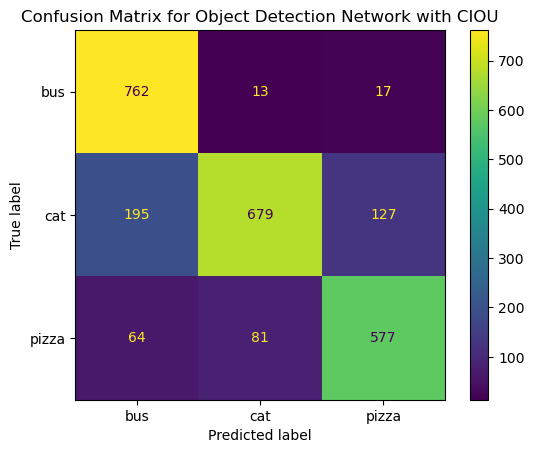

In [523]:
#CREATE CONFUSION MATRIX FOR OBJECT DETECTION MODEL USING COMPLETE IOU LOSS
from sklearn.metrics import confusion_matrix

y_true = y_true
y_pred = y_pred
confusion_matrix=confusion_matrix(y_true, y_pred, labels = [ "bus", "cat", "pizza"])
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels = [  "bus", "cat", "pizza"])
disp.plot()
disp.ax_.set_title("Confusion Matrix for Object Detection Network with CIOU")
plt.show()

In [540]:
#compute total num of model parameters
param_hold = []

for i in list(test_net.parameters()):
    shape = i.shape
    temp = 0
    if len(shape) == 1:
        param_hold.append(shape)
    else:
        shape_hold = []
        for s in shape:
            shape_hold.append(s)
        for num, val in enumerate(shape_hold):
            if num == 0:
                temp = val
            else:
                temp = temp * val
        param_hold.append(temp)

        
print(param_hold)
total = 0
for i in param_hold:
    i = np.array(i)
    total = total + i
print(total)
    

[588, torch.Size([4]), torch.Size([4]), torch.Size([4]), 288, torch.Size([8]), torch.Size([8]), torch.Size([8]), 1152, torch.Size([16]), torch.Size([16]), torch.Size([16]), 4608, torch.Size([32]), torch.Size([32]), torch.Size([32]), 18432, torch.Size([64]), torch.Size([64]), torch.Size([64]), 36864, torch.Size([64]), 36864, torch.Size([64]), 36864, torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), 36864, torch.Size([64]), 36864, torch.Size([64]), 36864, torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), 36864, torch.Size([64]), 36864, torch.Size([64]), 36864, torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), 36864, torch.Size([64]), 36864, torch.Size([64]), 36864, torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size([64]), torch.Size

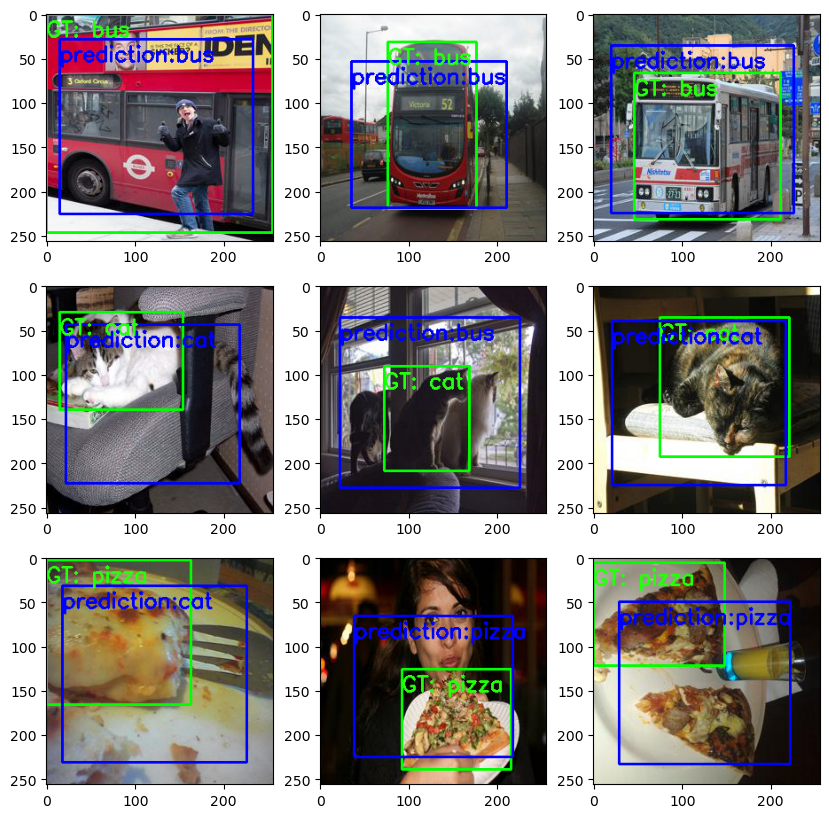

In [597]:
my_val_dataloader = torch.utils.data.DataLoader(my_val_dataset, batch_size=20, num_workers = 0, drop_last=False, 
                                               shuffle = True)

fig, ax = plt.subplots(3,3 ,figsize = (10,10))
count_bus = 0
count_cat = 0
count_pizza = 0

with torch.no_grad():
    for n, data in enumerate(my_val_dataloader):
        if n < 1:
            #print("STARTING EVAL CODE")
            images, class_labels, bbox_label = data
            bbox_label = ops.box_convert(bbox_label, in_fmt = 'xyxy', out_fmt = 'cxcywh')
            cls_prediction, bbox_prediction = test_net_ciou(images)
            bbox_prediction = ops.box_convert(bbox_prediction, in_fmt = 'cxcywh', out_fmt = 'xyxy')
            bbox_label = ops.box_convert(bbox_label, in_fmt = 'cxcywh', out_fmt = 'xyxy')
            _, predicted = torch.max(cls_prediction.data, 1) # this returns max (_) and max index (predicted)
#             print(class_labels)
#             print(bbox_label)
            #rescale bbox_labels:
            bbox_label = bbox_label * 256
            bbox_prediction = bbox_prediction * 256
#             print("bbox_label:", bbox_label)
#             print("bbox_pred:", bbox_prediction)
            

            for j, labels in enumerate(class_labels):
                if (labels == 0) and (count_bus < 3):
                    PIL_img = tvt.ToPILImage()(images[j])
                    np_img = np.uint8(PIL_img)
                    #reformat GT annotation
#                     bbox_label[j][2] = bbox_label[j][2] - bbox_label[j][0]
#                     bbox_label[j][3] = bbox_label[j][3] - bbox_label[j][1]
                    [x, y, x2, y2] = bbox_label[j]
                    [x_pred, y_pred, x2_pred, y2_pred] = bbox_prediction[j]

                    np_img = cv2.rectangle(np_img, (int(x), int(y)), 
                                        (int(x2), int(y2)), (0,255,0), 2)
                    np_img = cv2.rectangle(np_img, (int(x_pred), int(y_pred)), (int(x2_pred), 
                                        int(y2_pred)), (0, 0, 255), 2)
                    np_img = cv2.putText(np_img, "GT: bus", (int(x ), int(y + 25)), 
                                         cv2.FONT_HERSHEY_SIMPLEX, 0.8, (36,255, 12),2)
                    np_img = cv2.putText(np_img, "prediction:" + mapping[int(predicted[j])], (int(x_pred), int(y_pred + 25)), 
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
                    ax[0, count_bus].imshow(np_img)            
                    count_bus = count_bus + 1
                if (labels == 1) and (count_cat < 3):
                    PIL_img = tvt.ToPILImage()(images[j])
                    np_img = np.uint8(PIL_img)
                    #reformat GT annotation
#                     bbox_label[j][2] = bbox_label[j][2] - bbox_label[j][0]
#                     bbox_label[j][3] = bbox_label[j][3] - bbox_label[j][1]
                    [x, y, x2, y2] = bbox_label[j]
                    [x_pred, y_pred, x2_pred, y2_pred] = bbox_prediction[j]

                    np_img = cv2.rectangle(np_img, (int(x), int(y)), 
                                        (int(x2), int(y2)), (0,255,0), 2)
                    np_img = cv2.rectangle(np_img, (int(x_pred), int(y_pred)), (int(x2_pred), 
                                        int(y2_pred)), (0, 0, 255), 2)
                    np_img = cv2.putText(np_img, "GT: cat", (int(x ), int(y + 25)), 
                                         cv2.FONT_HERSHEY_SIMPLEX, 0.8, (36,255, 12),2)
                    np_img = cv2.putText(np_img, "prediction:" + mapping[int(predicted[j])], (int(x_pred), int(y_pred + 25)), 
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
                    ax[1, count_cat].imshow(np_img)            
                    count_cat = count_cat + 1
                if (labels == 2) and (count_pizza < 3):
                    PIL_img = tvt.ToPILImage()(images[j])
                    np_img = np.uint8(PIL_img)
                    #reformat GT annotation
#                     bbox_label[j][2] = bbox_label[j][2] - bbox_label[j][0]
#                     bbox_label[j][3] = bbox_label[j][3] - bbox_label[j][1]
                    [x, y, x2, y2] = bbox_label[j]
                    [x_pred, y_pred, x2_pred, y2_pred] = bbox_prediction[j]

                    np_img = cv2.rectangle(np_img, (int(x), int(y)), 
                                        (int(x2), int(y2)), (0,255,0), 2)
                    np_img = cv2.rectangle(np_img, (int(x_pred), int(y_pred)), (int( x2_pred), 
                                        int(y2_pred)), (0, 0, 255), 2)
                    np_img = cv2.putText(np_img, "GT: pizza", (int(x ), int(y + 25)), 
                                         cv2.FONT_HERSHEY_SIMPLEX, 0.8, (36,255, 12),2)
                    
                    np_img = cv2.putText(np_img, "prediction:" + mapping[int(predicted[j])], (int(x_pred), int(y_pred + 25)), 
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
                    ax[2, count_pizza].imshow(np_img)            
                    count_pizza = count_pizza + 1
                    
            
        if n > 1:
            break

Text(0, 0.5, 'Loss')

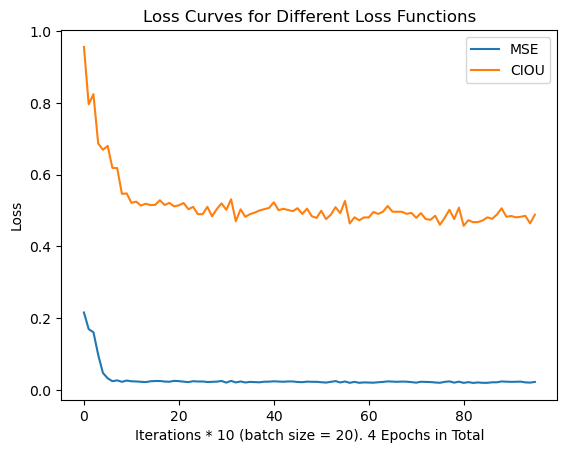

In [542]:
saved_loss_test_net_MSE = loss_test_net_MSE #these values were from one full epoch of training. 
saved_loss_test_net_CIOU = loss_test_net_ciou
plt.plot(saved_loss_test_net_MSE, label = "MSE")
plt.plot(saved_loss_test_net_CIOU, label = 'CIOU')
plt.title('Loss Curves for Different Loss Functions')
plt.legend()
plt.xlabel('Iterations * 10 (batch size = 20). 4 Epochs in Total')
plt.ylabel('Loss')